In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
traj = pd.read_csv('file_0.csv',sep='\t',header=None)

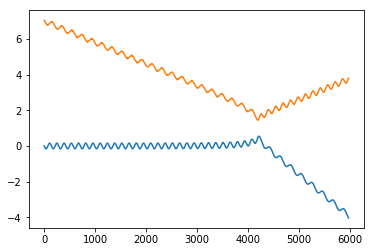

In [3]:
plt.plot(traj[0])
plt.plot(traj[12])

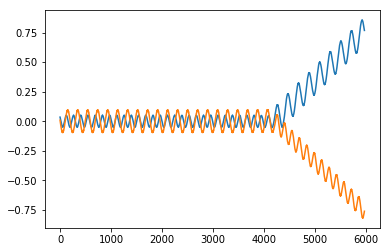

In [4]:
plt.plot(traj[2])
plt.plot(traj[14])

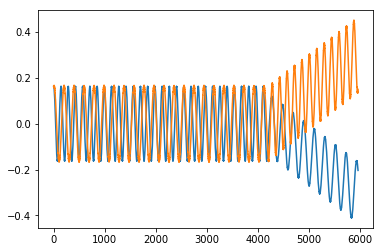

In [5]:
plt.plot(traj[4])
plt.plot(traj[16])

In [6]:
def process(aiming, num, PATH):
    init = pd.read_csv(PATH + 'aiming_{0}/init/file_{1}.csv'.format(aiming, num), sep='\t',header=None)
    end = pd.read_csv(PATH + 'aiming_{0}/LF/file_{1}.csv'.format(aiming, num), sep='\t',header=None)

    del init[24]
    del end[24]

    init = init[~init.isin([np.nan, np.inf, -np.inf]).any(1)]
    end = end[~end.isin([np.nan, np.inf, -np.inf]).any(1)]
    init, end = to_num(init), to_num(end)
    return plot(init, end, 100, aiming, num)
    #return init, end

In [8]:
def get_mean_velocity(fixed_df):
    v1 = []
    v2 = []
    for k in range(1,6,2):
        v1.append((fixed_df[k] + fixed_df[k + 6]) / 2)
        v2.append((fixed_df[k + 6 * 2] + fixed_df[k + 6 * 3]) / 2)
    v1 = np.array(v1)
    v2 = np.array(v2)
    return (v1 - v2).T

In [9]:
def to_num(init):
    for i in range(24):
        init[i] = pd.to_numeric(init[i])
    return init

In [10]:
def velocity_length(fixed_df):
    return np.sqrt(np.sum(get_mean_velocity(fixed_df)  * get_mean_velocity(fixed_df), axis = 1))

In [11]:
def angle(fixed_df, fixed_df1):
    return np.sum(get_mean_velocity(fixed_df1) * get_mean_velocity(fixed_df), axis = 1)/(velocity_length(fixed_df1) * velocity_length(fixed_df))

In [13]:
def get_mean_velocity_abs(init): 
    return np.sqrt(np.sum(get_mean_velocity(init) * get_mean_velocity(init), axis = 1))

In [82]:
def plot(init, end, bins = 100, b = 0.4, vel = 3.5):
    c_r_i = get_mean_velocity_abs(init)
    c_r_e = get_mean_velocity_abs(end)
    ang = np.abs(angle(init, end))
    length = len(c_r_i)
    w_i = np.ones_like(c_r_i)/length
    w_e = np.ones_like(c_r_e)/length
    w_a = np.ones_like(ang)/length

    plt.figure(1, figsize=(5,7))
    plt.subplot(311)
    plt.hist(np.abs(ang), bins=bins, range = (0,1), weights = w_a, facecolor='green')
    plt.xlabel('cos(angle)')
    plt.ylabel('Probability')
    plt.title('Histogram for b = %.02lf, c_r=%.02lf'%(float(b), np.mean(c_r_i)))
    plt.subplot(312)
    plt.hist(c_r_e, bins = bins,  range = (0,10), weights = w_e, facecolor='blue')
    plt.xlabel('c_r (end)')
    plt.ylabel('Probability')
    plt.subplot(313)
    plt.hist(c_r_i, bins = bins, range = (0,10),weights = w_i, facecolor='red')
    plt.xlabel('c_r (init)')
    plt.ylabel('Probability')
    plt.subplots_adjust(hspace=0.4)
    plt.show()
    
    c_r_mean = np.mean(c_r_e)
    c_r_median = np.median(c_r_e)
    a_mean = np.mean(ang)
    a_median = np.median(ang)
    p1 = stats.pearsonr(c_r_i, c_r_e)
    p2 = stats.pearsonr(ang, c_r_i)
    p3 = stats.pearsonr(ang, c_r_e)
    
    print("Init: \t b = {0}\t C_r = {1}".format(b,np.mean(c_r_i)));
    print("Angle:    MEAN = {0} \t MEDIAN = {1}".format(a_mean,a_median))
    print("Velocity: MEAN = {0} \t MEDIAN = {1}".format(c_r_mean,c_r_median))
    print("Pearson:")
    print("init - end : {0}".format(p1))
    print("init - ang : {0}".format(p2))
    print("ang  - end : {0}".format(p3))
    print("__________________________________________________________________")
    
    return np.mean(c_r_i),a_mean,a_median,c_r_mean,c_r_median

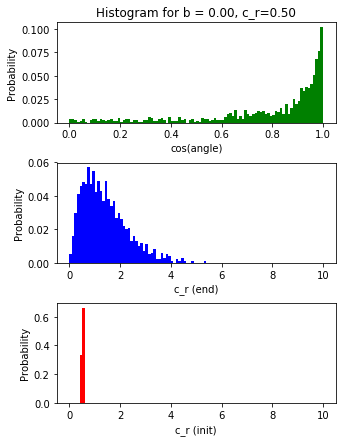

Init: 	 b = 0.00	 C_r = 0.4999999981058
Angle:    MEAN = 0.7879540430932329 	 MEDIAN = 0.903629898013514
Velocity: MEAN = 1.4078027013553314 	 MEDIAN = 1.2416729040848322
Pearson:
init - end : (-0.047420440661166817, 0.13399468888784766)
init - ang : (-0.049844469903032658, 0.11520375230322678)
ang  - end : (0.34644665870127594, 1.4129530234769029e-29)
__________________________________________________________________


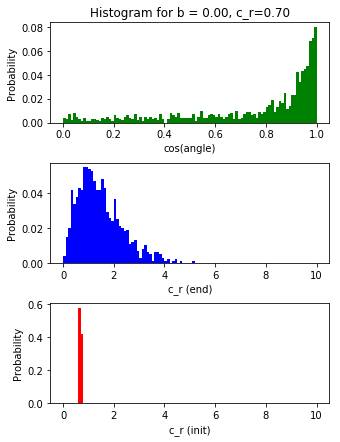

Init: 	 b = 0.00	 C_r = 0.7000000021495
Angle:    MEAN = 0.7575371837463922 	 MEDIAN = 0.8819300339415291
Velocity: MEAN = 1.4550038733836081 	 MEDIAN = 1.2983133571778156
Pearson:
init - end : (-0.025368138358112011, 0.42293681377585357)
init - ang : (0.04891248713060415, 0.12216753051406487)
ang  - end : (0.27206219919954294, 1.9816718326550687e-18)
__________________________________________________________________


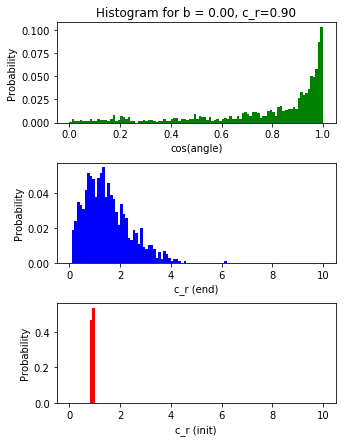

Init: 	 b = 0.00	 C_r = 0.90000000116333
Angle:    MEAN = 0.7809466527923548 	 MEDIAN = 0.9008431272065689
Velocity: MEAN = 1.5017456472721453 	 MEDIAN = 1.3556552580622299
Pearson:
init - end : (0.0051591323993368937, 0.87056321517149704)
init - ang : (0.032824386202699833, 0.29974544872680103)
ang  - end : (0.24674357006954273, 2.4594246821511688e-15)
__________________________________________________________________


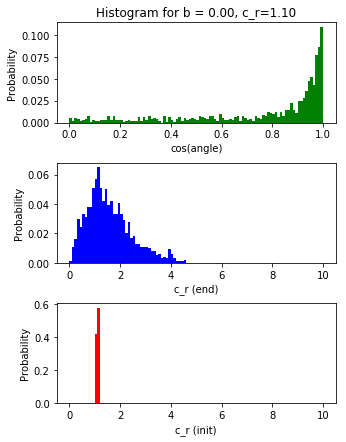

Init: 	 b = 0.00	 C_r = 1.09999999765325
Angle:    MEAN = 0.7716064021755503 	 MEDIAN = 0.9123611855830037
Velocity: MEAN = 1.5828949122786578 	 MEDIAN = 1.4344135032381415
Pearson:
init - end : (0.038424069452520665, 0.22474605624589003)
init - ang : (0.0072970369690763849, 0.81772887912234571)
ang  - end : (0.26821174415210652, 6.1571677698702181e-18)
__________________________________________________________________


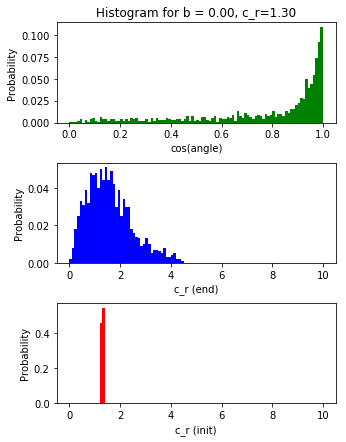

Init: 	 b = 0.00	 C_r = 1.3000000030864998
Angle:    MEAN = 0.7886901807321298 	 MEDIAN = 0.9149185401767688
Velocity: MEAN = 1.589916004284581 	 MEDIAN = 1.4751269911493083
Pearson:
init - end : (-0.016787333826757928, 0.59594865287760745)
init - ang : (-0.03965116534491437, 0.21027690791607451)
ang  - end : (0.3267904576135523, 2.5691279444060833e-26)
__________________________________________________________________


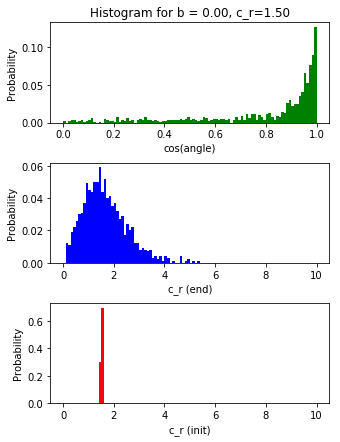

Init: 	 b = 0.00	 C_r = 1.5000000018180002
Angle:    MEAN = 0.8034443532607017 	 MEDIAN = 0.9246469685057968
Velocity: MEAN = 1.6565596908760758 	 MEDIAN = 1.5279489581902128
Pearson:
init - end : (0.021575935404583139, 0.49554443696180495)
init - ang : (-0.017813526112940879, 0.57367102185101815)
ang  - end : (0.30284688391178377, 1.1732689178664637e-22)
__________________________________________________________________


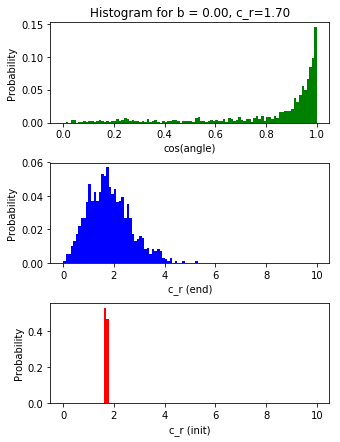

Init: 	 b = 0.00	 C_r = 1.7000000012954997
Angle:    MEAN = 0.8322916086823342 	 MEDIAN = 0.9395409483751658
Velocity: MEAN = 1.8256476665413353 	 MEDIAN = 1.75851926399751
Pearson:
init - end : (-0.02613775476257919, 0.40899945275723448)
init - ang : (-0.066745298608905171, 0.03482516661004089)
ang  - end : (0.3176196158432828, 7.0965420155908373e-25)
__________________________________________________________________


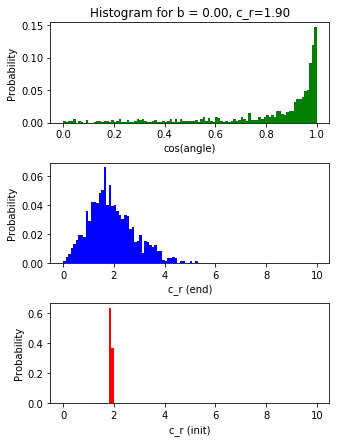

Init: 	 b = 0.00	 C_r = 1.9000000049067498
Angle:    MEAN = 0.8328574512758173 	 MEDIAN = 0.9384194908281512
Velocity: MEAN = 1.916218902294744 	 MEDIAN = 1.800251518115622
Pearson:
init - end : (0.028649232137392015, 0.36545430391578038)
init - ang : (0.0082566236759314265, 0.79426583088137492)
ang  - end : (0.36925874921712348, 1.1594969732493798e-33)
__________________________________________________________________


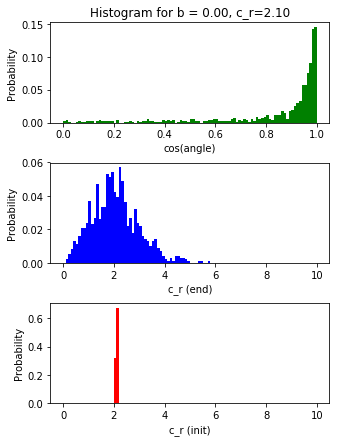

Init: 	 b = 0.00	 C_r = 2.1000000009162005
Angle:    MEAN = 0.8521116903164818 	 MEDIAN = 0.9518996801370117
Velocity: MEAN = 2.0607135103341174 	 MEDIAN = 1.9882704419905464
Pearson:
init - end : (0.0013908169138206312, 0.9649629875180219)
init - ang : (0.0062807486099762276, 0.84275695244025561)
ang  - end : (0.40860836522703275, 1.5880819664677722e-41)
__________________________________________________________________


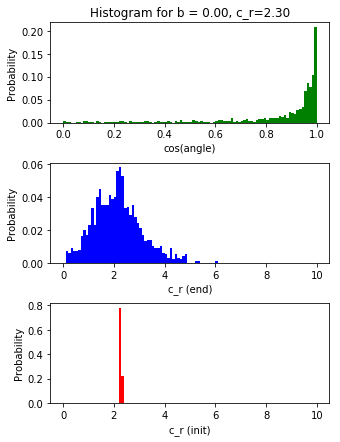

Init: 	 b = 0.00	 C_r = 2.3000000006210004
Angle:    MEAN = 0.8594919498538561 	 MEDIAN = 0.9566862452666782
Velocity: MEAN = 2.1510027997774426 	 MEDIAN = 2.118129236510962
Pearson:
init - end : (0.021570875627681087, 0.49564555900489848)
init - ang : (0.01331730984994247, 0.67403094345626302)
ang  - end : (0.40041950062741538, 8.4377042715140322e-40)
__________________________________________________________________


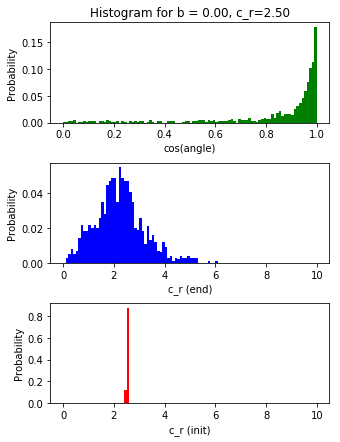

Init: 	 b = 0.00	 C_r = 2.4999999992250004
Angle:    MEAN = 0.8650200098563549 	 MEDIAN = 0.9547304828781722
Velocity: MEAN = 2.2382644099936466 	 MEDIAN = 2.2084696158033505
Pearson:
init - end : (0.038504964880112874, 0.22377085279122627)
init - ang : (-0.006883252501673676, 0.8278982751206585)
ang  - end : (0.41213919145049199, 2.7668129552617877e-42)
__________________________________________________________________


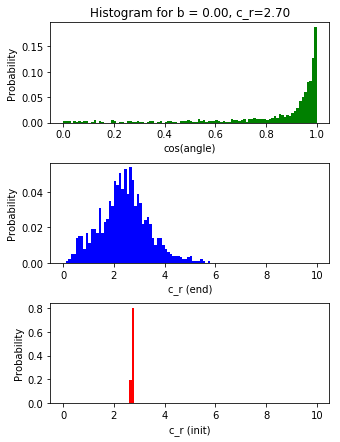

Init: 	 b = 0.00	 C_r = 2.7000000009950003
Angle:    MEAN = 0.8680986168048949 	 MEDIAN = 0.9574447862752729
Velocity: MEAN = 2.4113943402805686 	 MEDIAN = 2.412649610199259
Pearson:
init - end : (-0.024146934015900699, 0.44561293933753932)
init - ang : (-0.020574827081912848, 0.51576444516304121)
ang  - end : (0.41336458673932047, 1.5013042064869325e-42)
__________________________________________________________________


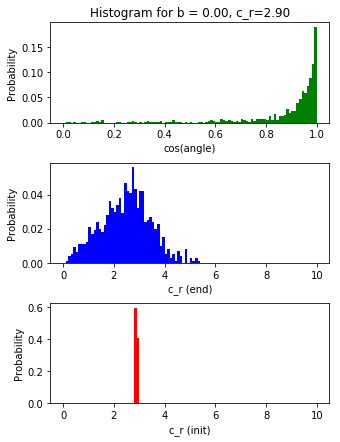

Init: 	 b = 0.00	 C_r = 2.9000000009345497
Angle:    MEAN = 0.8882256130530675 	 MEDIAN = 0.9540710439325768
Velocity: MEAN = 2.4863897748163537 	 MEDIAN = 2.529945090416994
Pearson:
init - end : (0.039058423156494243, 0.21717984327594644)
init - ang : (-0.013856209233591724, 0.66164379845839139)
ang  - end : (0.46432550669596329, 1.2842106535668108e-54)
__________________________________________________________________


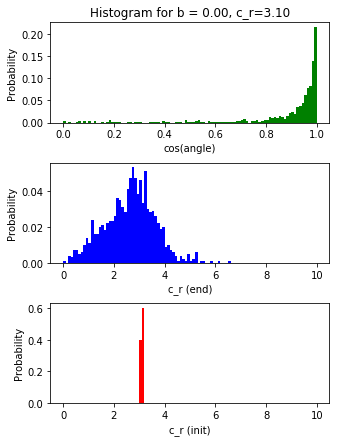

Init: 	 b = 0.00	 C_r = 3.100000000770001
Angle:    MEAN = 0.8905783910479967 	 MEDIAN = 0.9628142423434537
Velocity: MEAN = 2.6383679058023883 	 MEDIAN = 2.7206289997693895
Pearson:
init - end : (0.020670957385524272, 0.5138044586399837)
init - ang : (-0.0064045170851403429, 0.83969988183449806)
ang  - end : (0.47226655956073599, 1.0882006568086493e-56)
__________________________________________________________________


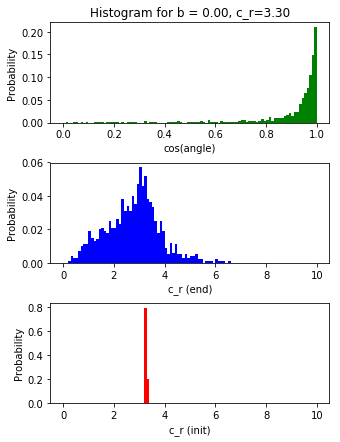

Init: 	 b = 0.00	 C_r = 3.2999999998434992
Angle:    MEAN = 0.9042478883885392 	 MEDIAN = 0.9656218335143162
Velocity: MEAN = 2.765916896440011 	 MEDIAN = 2.8515261176292306
Pearson:
init - end : (-0.10967625678647885, 0.00051196655218820725)
init - ang : (-0.029286283568593665, 0.35488594585723188)
ang  - end : (0.45763246988407347, 6.5019114265076869e-53)
__________________________________________________________________


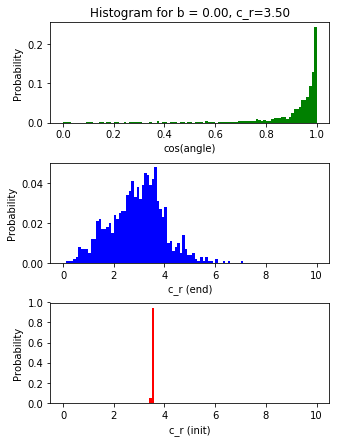

Init: 	 b = 0.00	 C_r = 3.50000000059
Angle:    MEAN = 0.9115804262358176 	 MEDIAN = 0.9647642672939595
Velocity: MEAN = 2.931734395547318 	 MEDIAN = 2.996347113316652
Pearson:
init - end : (0.074673425373157659, 0.018190101214320752)
init - ang : (0.012264697092160447, 0.69847989562655566)
ang  - end : (0.44902004938621581, 8.9368033485742552e-51)
__________________________________________________________________


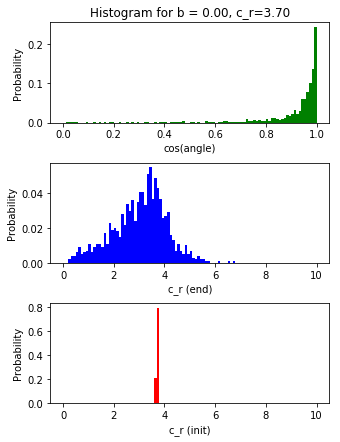

Init: 	 b = 0.00	 C_r = 3.7000000002000015
Angle:    MEAN = 0.9127369457384773 	 MEDIAN = 0.9674489907175834
Velocity: MEAN = 3.0384796331582127 	 MEDIAN = 3.169292523224203
Pearson:
init - end : (0.0098250164555579896, 0.75632279519202184)
init - ang : (-0.018385887966769165, 0.56141925068851783)
ang  - end : (0.51371648056388763, 1.9518688625126547e-68)
__________________________________________________________________


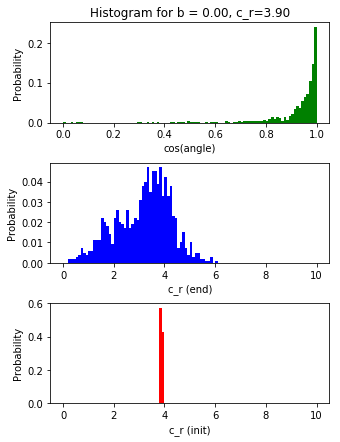

Init: 	 b = 0.00	 C_r = 3.9000000000399986
Angle:    MEAN = 0.9274530457168546 	 MEDIAN = 0.9684915815798997
Velocity: MEAN = 3.190930182079579 	 MEDIAN = 3.358803291876021
Pearson:
init - end : (0.076479801159885286, 0.015562279336658184)
init - ang : (0.0087951201974354881, 0.78117845363960992)
ang  - end : (0.51794448640454505, 9.9752773986093495e-70)
__________________________________________________________________


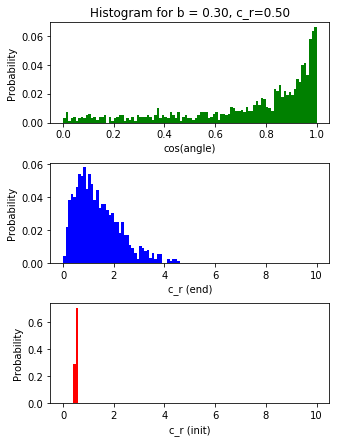

Init: 	 b = 0.30	 C_r = 0.50000000876635
Angle:    MEAN = 0.7473976800493569 	 MEDIAN = 0.8535298823525885
Velocity: MEAN = 1.3737966274202371 	 MEDIAN = 1.188874668602588
Pearson:
init - end : (0.038916155897944074, 0.21886060499303314)
init - ang : (0.035485902018055404, 0.26224004649803834)
ang  - end : (0.32417051772799776, 6.7082969149572315e-26)
__________________________________________________________________


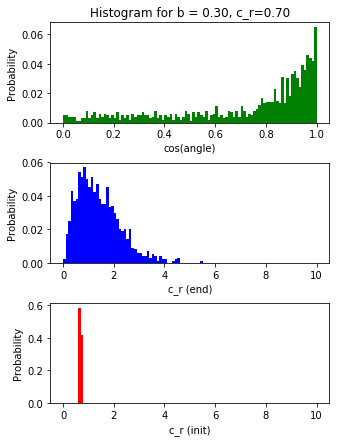

Init: 	 b = 0.30	 C_r = 0.700000002119
Angle:    MEAN = 0.7268999350892418 	 MEDIAN = 0.8493957693630143
Velocity: MEAN = 1.413480289359718 	 MEDIAN = 1.26865200589936
Pearson:
init - end : (-0.030676394909624517, 0.33250150209282148)
init - ang : (-0.00051980908696976731, 0.98690151916398039)
ang  - end : (0.30747631236113021, 2.4420393870307969e-23)
__________________________________________________________________


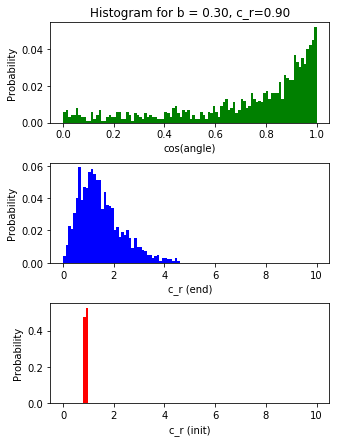

Init: 	 b = 0.30	 C_r = 0.8999999949859999
Angle:    MEAN = 0.7311247288430168 	 MEDIAN = 0.8364221068563558
Velocity: MEAN = 1.480148368752523 	 MEDIAN = 1.3146484157973282
Pearson:
init - end : (0.030887424581345399, 0.32918474833515299)
init - ang : (-0.044337894861805935, 0.16120727650443534)
ang  - end : (0.29040448226227222, 6.9389729188646723e-21)
__________________________________________________________________


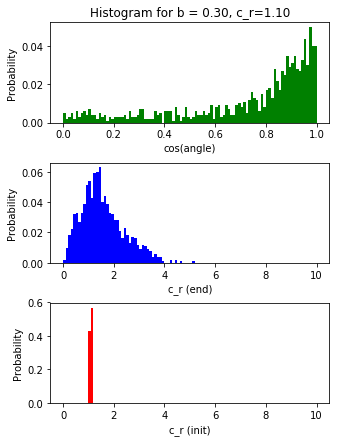

Init: 	 b = 0.30	 C_r = 1.0999999951775
Angle:    MEAN = 0.7361324843984929 	 MEDIAN = 0.8448223046420275
Velocity: MEAN = 1.5734462196229038 	 MEDIAN = 1.4240398540397428
Pearson:
init - end : (0.028711460879966479, 0.36441339749997581)
init - ang : (-0.0039896698891229892, 0.89972626895160723)
ang  - end : (0.25739029645002637, 1.3517168119523043e-16)
__________________________________________________________________


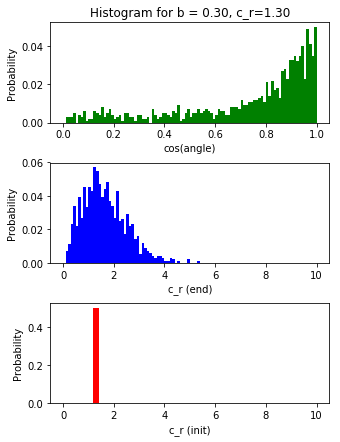

Init: 	 b = 0.30	 C_r = 1.2999999935989999
Angle:    MEAN = 0.7435154139121937 	 MEDIAN = 0.8476694321181621
Velocity: MEAN = 1.6489076088098393 	 MEDIAN = 1.5411605007285103
Pearson:
init - end : (0.012011276023366109, 0.70441422209188165)
init - ang : (0.0011418790963673348, 0.97123113881531054)
ang  - end : (0.33378019628042083, 1.8949928233511222e-27)
__________________________________________________________________


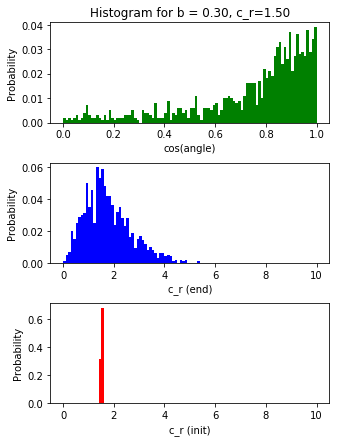

Init: 	 b = 0.30	 C_r = 1.499999999931
Angle:    MEAN = 0.7522008239295002 	 MEDIAN = 0.8374013234250983
Velocity: MEAN = 1.7715403974405877 	 MEDIAN = 1.6177436535083172
Pearson:
init - end : (-0.015528848668047877, 0.62379378286980125)
init - ang : (-0.011458964383578298, 0.71740961898847566)
ang  - end : (0.37357521516369019, 1.7915051596311626e-34)
__________________________________________________________________


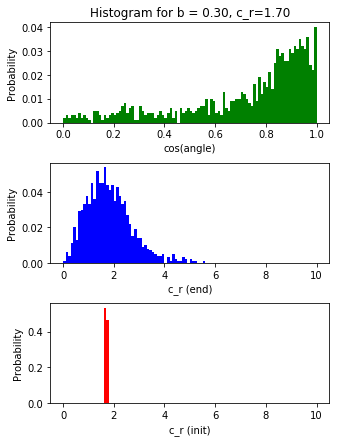

Init: 	 b = 0.30	 C_r = 1.69999999589165
Angle:    MEAN = 0.7337183372624737 	 MEDIAN = 0.8328432006111148
Velocity: MEAN = 1.8181565934097197 	 MEDIAN = 1.711199129241325
Pearson:
init - end : (-0.005908292771868523, 0.8519706826711837)
init - ang : (-0.030857044141886385, 0.32966091416453103)
ang  - end : (0.36003494409783304, 5.7083441920564266e-32)
__________________________________________________________________


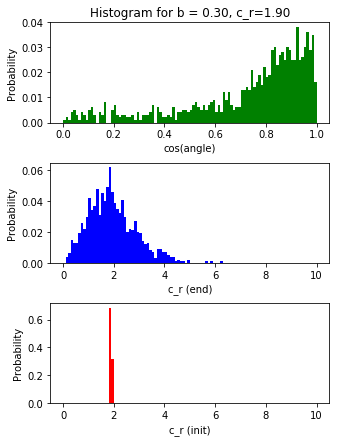

Init: 	 b = 0.30	 C_r = 1.9000000012239997
Angle:    MEAN = 0.7368644273733005 	 MEDIAN = 0.8215256508932869
Velocity: MEAN = 1.9434438594420256 	 MEDIAN = 1.8315735605075667
Pearson:
init - end : (0.020984089106054614, 0.50744699838649521)
init - ang : (0.020918005509530015, 0.50878524019498372)
ang  - end : (0.38130251061355674, 5.8923729744942493e-36)
__________________________________________________________________


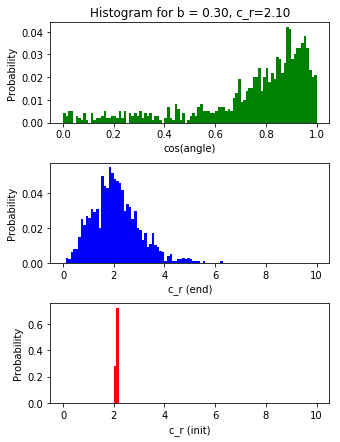

Init: 	 b = 0.30	 C_r = 2.1000000045524003
Angle:    MEAN = 0.7504908362961157 	 MEDIAN = 0.8303518856837808
Velocity: MEAN = 2.0925366023251106 	 MEDIAN = 2.0121542256833695
Pearson:
init - end : (0.0054902457971249376, 0.86233625703624817)
init - ang : (0.028582057615018957, 0.36658001691043063)
ang  - end : (0.33041685326616121, 6.6998203448808683e-27)
__________________________________________________________________


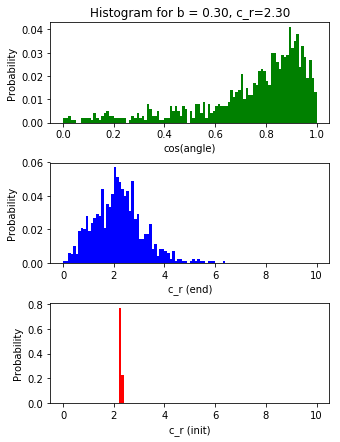

Init: 	 b = 0.30	 C_r = 2.299999999548
Angle:    MEAN = 0.7474177133310604 	 MEDIAN = 0.8224515958575571
Velocity: MEAN = 2.185382726965496 	 MEDIAN = 2.141989960310977
Pearson:
init - end : (0.075259257479289465, 0.01729824589265079)
init - ang : (0.056077825617101722, 0.076309353393684137)
ang  - end : (0.40635999369747972, 4.779682059843668e-41)
__________________________________________________________________


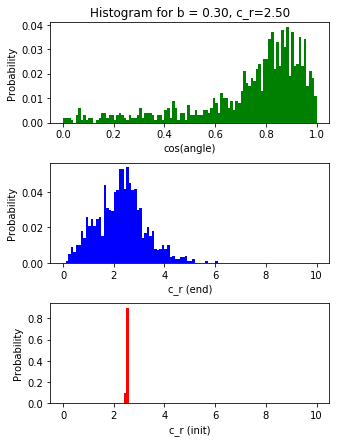

Init: 	 b = 0.30	 C_r = 2.50000000205
Angle:    MEAN = 0.7437319739726601 	 MEDIAN = 0.8158537457941828
Velocity: MEAN = 2.278959742716896 	 MEDIAN = 2.2999157566930615
Pearson:
init - end : (0.017824500700999595, 0.57343491876581543)
init - ang : (0.03268950716062409, 0.30173678978532587)
ang  - end : (0.39605571336291112, 6.7006965446281844e-39)
__________________________________________________________________


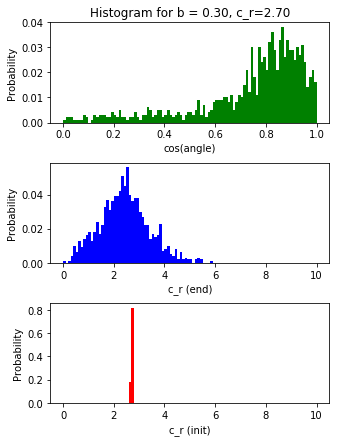

Init: 	 b = 0.30	 C_r = 2.6999999995900006
Angle:    MEAN = 0.7475999435361379 	 MEDIAN = 0.8127169397271448
Velocity: MEAN = 2.4374711303138263 	 MEDIAN = 2.412420943722505
Pearson:
init - end : (0.032392003861180525, 0.30616012082710853)
init - ang : (0.030145663251395775, 0.34093790755909792)
ang  - end : (0.40780692312423916, 2.3543210251323855e-41)
__________________________________________________________________


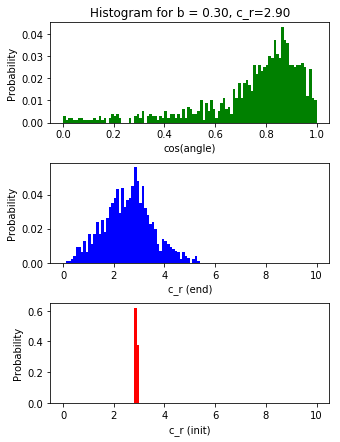

Init: 	 b = 0.30	 C_r = 2.8999999994099994
Angle:    MEAN = 0.7533592309578894 	 MEDIAN = 0.8137906799127779
Velocity: MEAN = 2.57329647028956 	 MEDIAN = 2.6087257471061474
Pearson:
init - end : (-0.00068421596562242583, 0.98275925630977146)
init - ang : (0.017009418088514371, 0.59109414295295493)
ang  - end : (0.36865914124556187, 1.4995557771177975e-33)
__________________________________________________________________


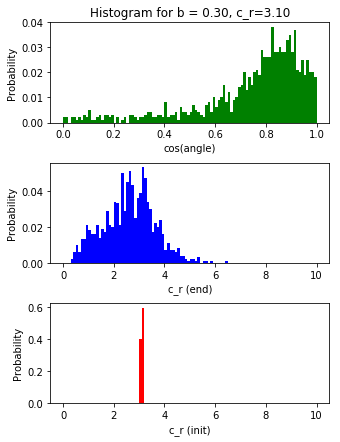

Init: 	 b = 0.30	 C_r = 3.100000001165001
Angle:    MEAN = 0.7515924715368287 	 MEDIAN = 0.8139008748973171
Velocity: MEAN = 2.6104059212211697 	 MEDIAN = 2.6554468078302644
Pearson:
init - end : (0.046772081790945212, 0.13940185631456459)
init - ang : (0.028663391606479505, 0.36521729431814776)
ang  - end : (0.44132688000624865, 6.455637808890572e-49)
__________________________________________________________________


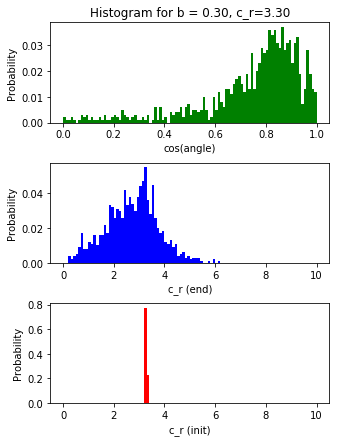

Init: 	 b = 0.30	 C_r = 3.300000000764999
Angle:    MEAN = 0.7499055202336096 	 MEDIAN = 0.8069484738250925
Velocity: MEAN = 2.736610829773729 	 MEDIAN = 2.789889583027617
Pearson:
init - end : (0.036193761871059951, 0.25283503715903921)
init - ang : (-0.01152322386857052, 0.71589336043516427)
ang  - end : (0.36075094323056672, 4.2376375339454631e-32)
__________________________________________________________________


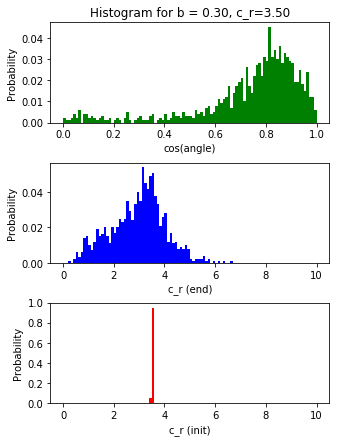

Init: 	 b = 0.30	 C_r = 3.4999999989611497
Angle:    MEAN = 0.7445955402135835 	 MEDIAN = 0.8020278678693836
Velocity: MEAN = 2.968730079565834 	 MEDIAN = 3.104988269305338
Pearson:
init - end : (-0.0084674056407003494, 0.78913596748087245)
init - ang : (-0.022915748166686421, 0.46915887876458306)
ang  - end : (0.39929257374310739, 1.4451337104607933e-39)
__________________________________________________________________


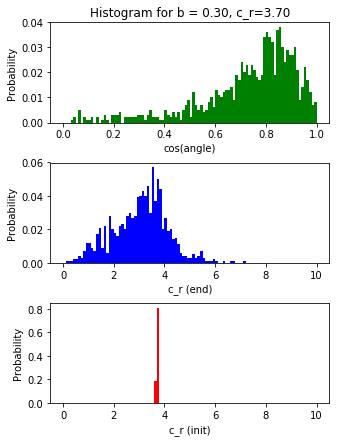

Init: 	 b = 0.30	 C_r = 3.6999999984000014
Angle:    MEAN = 0.7377941028774514 	 MEDIAN = 0.7920253667015564
Velocity: MEAN = 3.0521045271935145 	 MEDIAN = 3.153993678124591
Pearson:
init - end : (-0.08044926883825268, 0.010928607704049215)
init - ang : (-0.035214182861688058, 0.2659135528667611)
ang  - end : (0.43484409226222737, 2.185794486486767e-47)
__________________________________________________________________


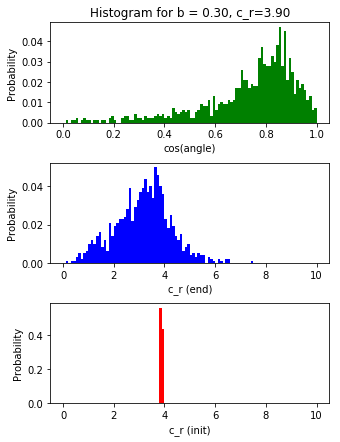

Init: 	 b = 0.30	 C_r = 3.899999999749999
Angle:    MEAN = 0.7461345911178267 	 MEDIAN = 0.793895066582267
Velocity: MEAN = 3.161719408460097 	 MEDIAN = 3.2410599693830706
Pearson:
init - end : (-0.019559612514961675, 0.53669745765806887)
init - ang : (0.014882291489932548, 0.63831443910835084)
ang  - end : (0.40986191188807636, 8.5602184652930434e-42)
__________________________________________________________________


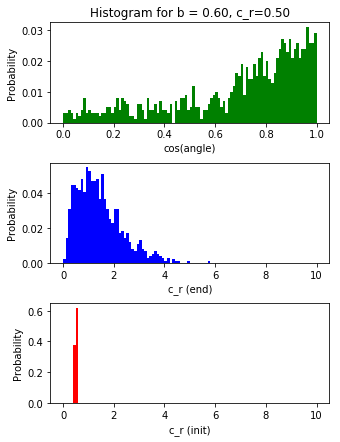

Init: 	 b = 0.60	 C_r = 0.49999999206350004
Angle:    MEAN = 0.7001086349757523 	 MEDIAN = 0.7806761117427493
Velocity: MEAN = 1.4311976156369037 	 MEDIAN = 1.2668021250665498
Pearson:
init - end : (0.050485577383859004, 0.11059714741034014)
init - ang : (0.012003506320619658, 0.70459645054670184)
ang  - end : (0.29965245867776863, 3.4090358262811964e-22)
__________________________________________________________________


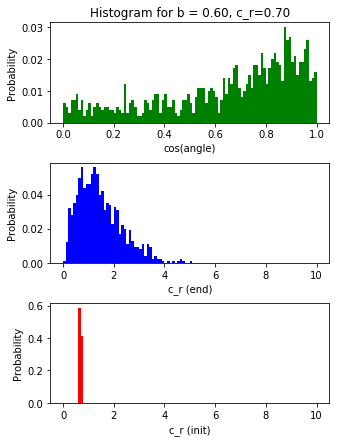

Init: 	 b = 0.60	 C_r = 0.700000001908805
Angle:    MEAN = 0.6514425988052269 	 MEDIAN = 0.7326054318250251
Velocity: MEAN = 1.4580763119020907 	 MEDIAN = 1.3056090352698722
Pearson:
init - end : (0.037418302426518141, 0.23712449121566351)
init - ang : (0.022896861534994987, 0.46952535018998454)
ang  - end : (0.29960053639878498, 3.4682725565449367e-22)
__________________________________________________________________


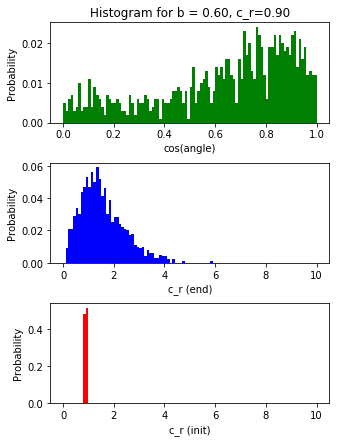

Init: 	 b = 0.60	 C_r = 0.899999999083
Angle:    MEAN = 0.6367328583025483 	 MEDIAN = 0.7107110727942991
Velocity: MEAN = 1.5576120364166797 	 MEDIAN = 1.40619622505807
Pearson:
init - end : (-0.017210356122117722, 0.58671757466410557)
init - ang : (-0.028018851803489123, 0.37610298052179769)
ang  - end : (0.29254020529478914, 3.4940100551237886e-21)
__________________________________________________________________


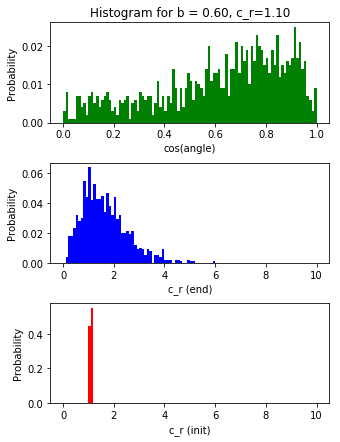

Init: 	 b = 0.60	 C_r = 1.0999999987015
Angle:    MEAN = 0.621834069817756 	 MEDIAN = 0.6823416940162801
Velocity: MEAN = 1.6487595223390485 	 MEDIAN = 1.5041899725688097
Pearson:
init - end : (-0.013878117733402841, 0.66114213187355997)
init - ang : (-0.0021706483159343063, 0.94534291936191228)
ang  - end : (0.2597864810071952, 6.9050498867265546e-17)
__________________________________________________________________


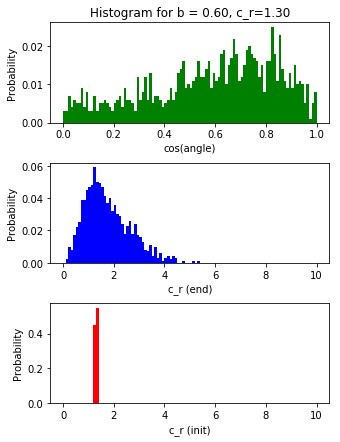

Init: 	 b = 0.60	 C_r = 1.3000000037806498
Angle:    MEAN = 0.587794462951551 	 MEDIAN = 0.6345048744504614
Velocity: MEAN = 1.7551955418740122 	 MEDIAN = 1.5843900542484306
Pearson:
init - end : (0.043261369115373913, 0.17163359235938258)
init - ang : (0.073927473008490563, 0.019383722979909236)
ang  - end : (0.28222878666494661, 9.0910039698385151e-20)
__________________________________________________________________


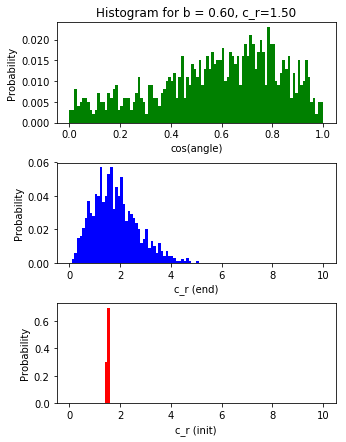

Init: 	 b = 0.60	 C_r = 1.5000000017294
Angle:    MEAN = 0.5805575011098995 	 MEDIAN = 0.6122531311801575
Velocity: MEAN = 1.8119976781610205 	 MEDIAN = 1.6839958495315779
Pearson:
init - end : (0.0093450882177827377, 0.76787587946123503)
init - ang : (-0.0026243743649702789, 0.93394190799133892)
ang  - end : (0.21148922878662946, 1.4178089206883742e-11)
__________________________________________________________________


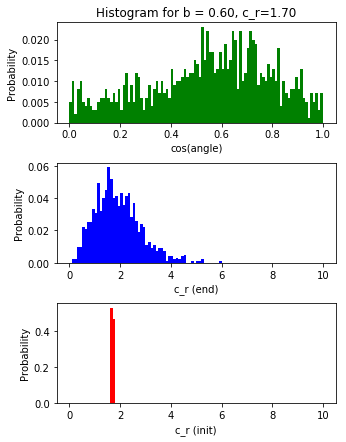

Init: 	 b = 0.60	 C_r = 1.6999999985679501
Angle:    MEAN = 0.5449350991417029 	 MEDIAN = 0.5689313700317229
Velocity: MEAN = 1.9147800063098808 	 MEDIAN = 1.8078599795492658
Pearson:
init - end : (-0.041601891075462846, 0.18868102818994428)
init - ang : (0.0093480431037046303, 0.76780458714869093)
ang  - end : (0.24920537892844727, 1.2726948746205529e-15)
__________________________________________________________________


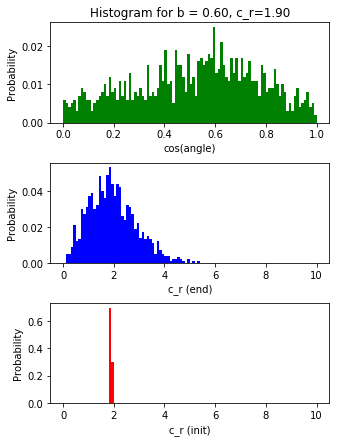

Init: 	 b = 0.60	 C_r = 1.8999999992689998
Angle:    MEAN = 0.5212705533916746 	 MEDIAN = 0.5482755893894686
Velocity: MEAN = 1.9575046630168702 	 MEDIAN = 1.8747579465114492
Pearson:
init - end : (0.027139323288096182, 0.39127619585232443)
init - ang : (0.006162546414463203, 0.84567874764404594)
ang  - end : (0.20555538369880139, 5.2983623627834665e-11)
__________________________________________________________________


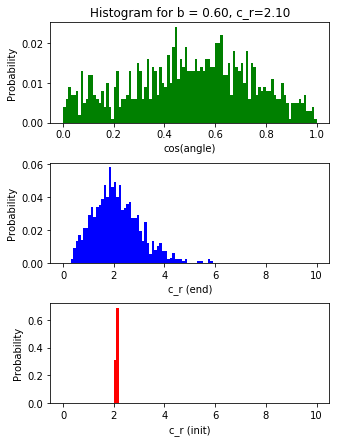

Init: 	 b = 0.60	 C_r = 2.0999999984125006
Angle:    MEAN = 0.5004620087673988 	 MEDIAN = 0.5132350032287558
Velocity: MEAN = 2.1212155735718037 	 MEDIAN = 2.027041665170322
Pearson:
init - end : (0.033579564766849819, 0.28875801343070884)
init - ang : (0.010109032632710154, 0.74951115376389865)
ang  - end : (0.19546770369141234, 4.554664961405269e-10)
__________________________________________________________________


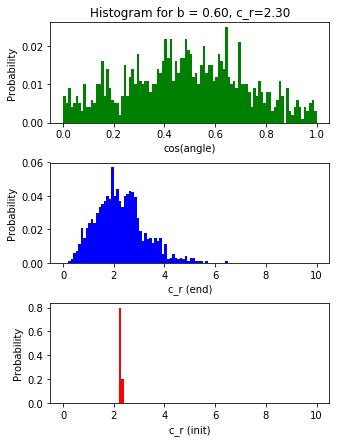

Init: 	 b = 0.60	 C_r = 2.2999999976030003
Angle:    MEAN = 0.4821367729620264 	 MEDIAN = 0.4831190601224711
Velocity: MEAN = 2.260211678226211 	 MEDIAN = 2.176433822409375
Pearson:
init - end : (0.012835170318206678, 0.68518882063728836)
init - ang : (0.033462876195411481, 0.29043783029155112)
ang  - end : (0.22456673904392566, 6.745452451384617e-13)
__________________________________________________________________


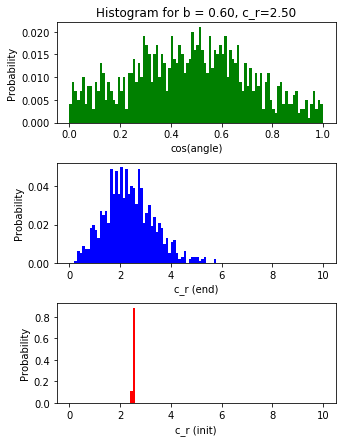

Init: 	 b = 0.60	 C_r = 2.4999999993514996
Angle:    MEAN = 0.4729816112081695 	 MEDIAN = 0.48139368825395484
Velocity: MEAN = 2.3681169823021393 	 MEDIAN = 2.2911988119744837
Pearson:
init - end : (-0.0082570121385511022, 0.79425636849955561)
init - ang : (-0.041074890912629461, 0.19434738821299322)
ang  - end : (0.16206018565350752, 2.5706456970736405e-07)
__________________________________________________________________


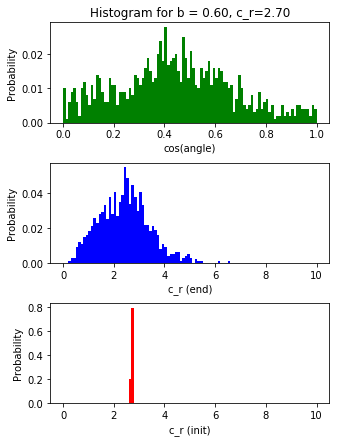

Init: 	 b = 0.60	 C_r = 2.6999999985105005
Angle:    MEAN = 0.44358493215823347 	 MEDIAN = 0.43628304981283306
Velocity: MEAN = 2.426489967591535 	 MEDIAN = 2.4426601874464327
Pearson:
init - end : (-0.0067704732864021754, 0.8306750793401696)
init - ang : (-0.036148524618363029, 0.25342897224316258)
ang  - end : (0.11535152776785092, 0.00025679985646083633)
__________________________________________________________________


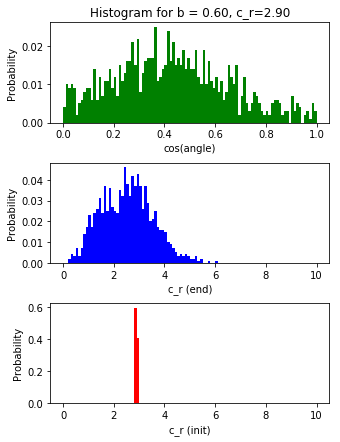

Init: 	 b = 0.60	 C_r = 2.900000004099149
Angle:    MEAN = 0.42731892763199175 	 MEDIAN = 0.4168556744413265
Velocity: MEAN = 2.5288611778888255 	 MEDIAN = 2.5227591359375072
Pearson:
init - end : (0.0058349527399187999, 0.85378737340387234)
init - ang : (0.0071448442614659487, 0.82146578790291525)
ang  - end : (0.055955301886900961, 0.076954857787351366)
__________________________________________________________________


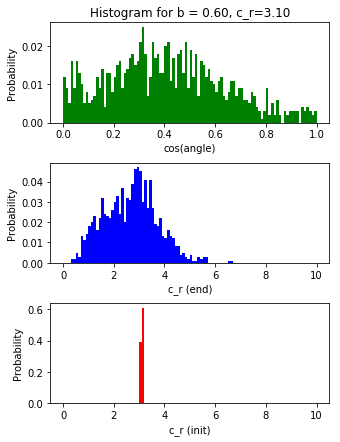

Init: 	 b = 0.60	 C_r = 3.1000000004500006
Angle:    MEAN = 0.4088314047966146 	 MEDIAN = 0.39465116353645247
Velocity: MEAN = 2.678312791977713 	 MEDIAN = 2.7458401606374423
Pearson:
init - end : (0.065606308718350617, 0.038052027030997033)
init - ang : (-0.0077384664188358543, 0.80691377133393916)
ang  - end : (0.10459969640076548, 0.00092404416108086138)
__________________________________________________________________


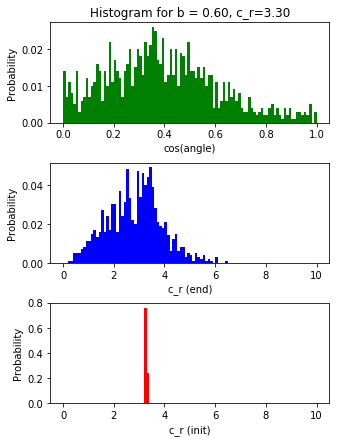

Init: 	 b = 0.60	 C_r = 3.3000000022149987
Angle:    MEAN = 0.39281948395760596 	 MEDIAN = 0.37080460729362197
Velocity: MEAN = 2.8364132440353615 	 MEDIAN = 2.928159566742216
Pearson:
init - end : (0.021160448839866113, 0.50388463803081485)
init - ang : (0.019886139581179262, 0.52991842774264319)
ang  - end : (0.030455690759238558, 0.33599328363524483)
__________________________________________________________________


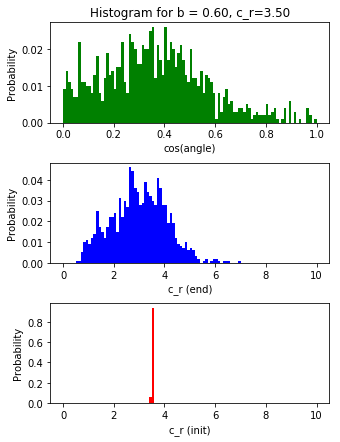

Init: 	 b = 0.60	 C_r = 3.49999999989
Angle:    MEAN = 0.36304575740256995 	 MEDIAN = 0.3520138966107951
Velocity: MEAN = 3.0019718968013014 	 MEDIAN = 2.998396863429444
Pearson:
init - end : (-0.13051014605324621, 3.4783796638539494e-05)
init - ang : (-0.038602749450011638, 0.22259608717174975)
ang  - end : (0.045751054421412474, 0.14825493286043226)
__________________________________________________________________


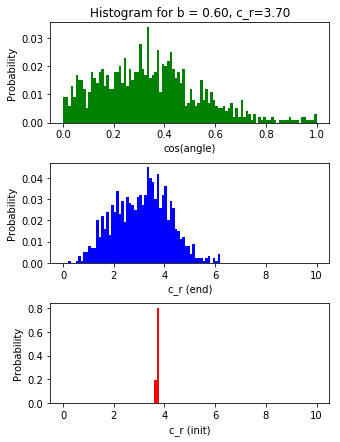

Init: 	 b = 0.60	 C_r = 3.699999998265001
Angle:    MEAN = 0.3401426209856967 	 MEDIAN = 0.32934271304249446
Velocity: MEAN = 3.110405180010389 	 MEDIAN = 3.1927791718731537
Pearson:
init - end : (-0.029664796445678151, 0.34869879550978122)
init - ang : (-0.077676716920103223, 0.014010491539011736)
ang  - end : (0.11625955038179529, 0.00022928542836185927)
__________________________________________________________________


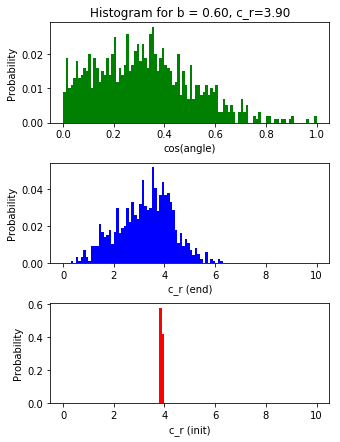

Init: 	 b = 0.60	 C_r = 3.899999998729999
Angle:    MEAN = 0.31901650117186076 	 MEDIAN = 0.30904797284314617
Velocity: MEAN = 3.2478348764946774 	 MEDIAN = 3.362348129159951
Pearson:
init - end : (-0.06231721140702734, 0.048827650443962735)
init - ang : (-0.03799784087679163, 0.22993437113055176)
ang  - end : (0.094922870104150348, 0.0026579282527158525)
__________________________________________________________________


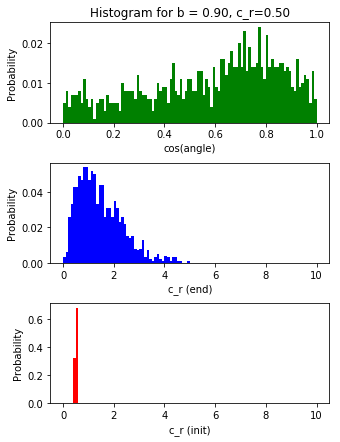

Init: 	 b = 0.90	 C_r = 0.4999999999607
Angle:    MEAN = 0.5833251509611606 	 MEDIAN = 0.641579922393025
Velocity: MEAN = 1.4684746593138236 	 MEDIAN = 1.2856170626112287
Pearson:
init - end : (0.014670878213304374, 0.64309302192112239)
init - ang : (-0.012241669471010685, 0.69901837737253891)
ang  - end : (0.22193105935614008, 1.2657889233053426e-12)
__________________________________________________________________


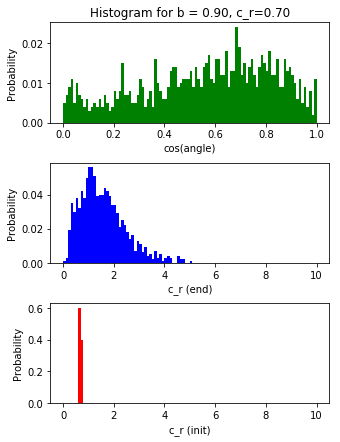

Init: 	 b = 0.90	 C_r = 0.6999999999720499
Angle:    MEAN = 0.5599507993924463 	 MEDIAN = 0.5938180270463578
Velocity: MEAN = 1.568747006163397 	 MEDIAN = 1.4248757692320786
Pearson:
init - end : (-0.010563425972010909, 0.73865396879347966)
init - ang : (-0.051199913125374308, 0.10563679437183514)
ang  - end : (0.14335681534282257, 5.3341469521606791e-06)
__________________________________________________________________


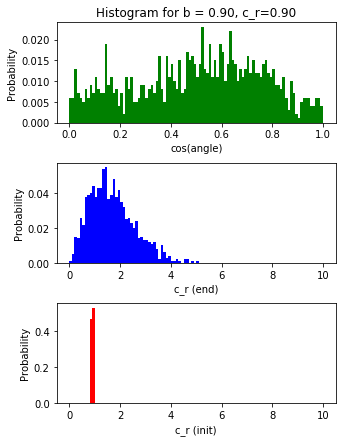

Init: 	 b = 0.90	 C_r = 0.90000000065205
Angle:    MEAN = 0.5057790430459369 	 MEDIAN = 0.5288185893827071
Velocity: MEAN = 1.68794044476095 	 MEDIAN = 1.5560013990044617
Pearson:
init - end : (0.031732075316152977, 0.31612450281905496)
init - ang : (0.027907563705896494, 0.3780025794359988)
ang  - end : (0.16780200933609224, 9.4175259206733354e-08)
__________________________________________________________________


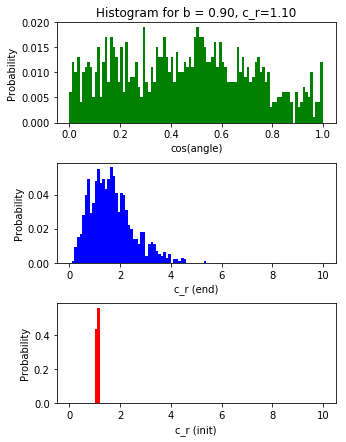

Init: 	 b = 0.90	 C_r = 1.09999999895345
Angle:    MEAN = 0.45425114615978257 	 MEDIAN = 0.4589702842311169
Velocity: MEAN = 1.6749808276019835 	 MEDIAN = 1.5700153015794247
Pearson:
init - end : (-0.020601296413429195, 0.5152243796927467)
init - ang : (-0.00089601584542536188, 0.97742361749689288)
ang  - end : (0.059594118346862006, 0.059585410191088893)
__________________________________________________________________


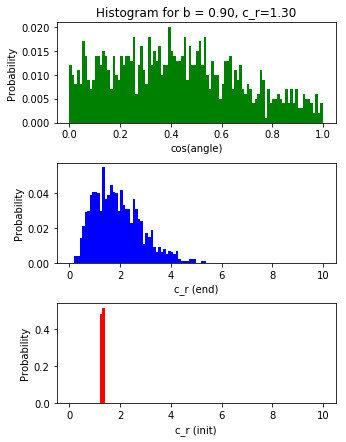

Init: 	 b = 0.90	 C_r = 1.299999998519
Angle:    MEAN = 0.4223604709691709 	 MEDIAN = 0.4056208415557174
Velocity: MEAN = 1.908683919018638 	 MEDIAN = 1.7684968253985969
Pearson:
init - end : (0.0026781795532756364, 0.93259076796909302)
init - ang : (-0.0096836424841417364, 0.75972050623146525)
ang  - end : (0.071292858338109819, 0.02416299216379493)
__________________________________________________________________


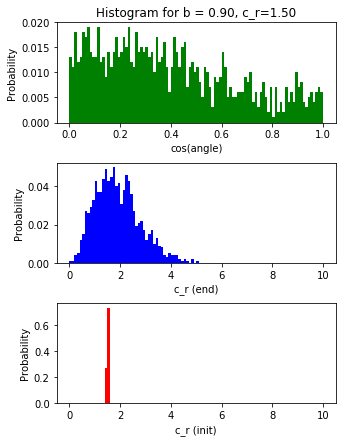

Init: 	 b = 0.90	 C_r = 1.5000000085145
Angle:    MEAN = 0.3942933586668508 	 MEDIAN = 0.3496972923962508
Velocity: MEAN = 1.9022228681180473 	 MEDIAN = 1.798615044282839
Pearson:
init - end : (0.0075510919996439703, 0.81150010848875442)
init - ang : (0.0092464128649823105, 0.77025773496313199)
ang  - end : (-0.10754141899134061, 0.00065828558081880504)
__________________________________________________________________


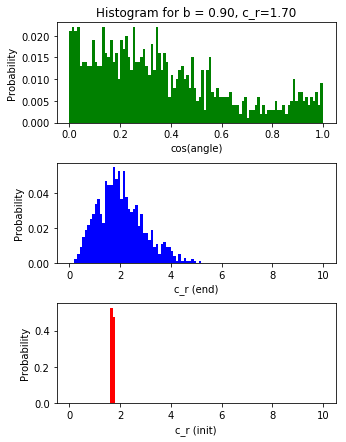

Init: 	 b = 0.90	 C_r = 1.699999996261
Angle:    MEAN = 0.3622429855939643 	 MEDIAN = 0.30616132762837156
Velocity: MEAN = 2.0222152226734207 	 MEDIAN = 1.9226586147193825
Pearson:
init - end : (0.00380910385940643, 0.90424215965201027)
init - ang : (0.034968796569191253, 0.26926131584364543)
ang  - end : (-0.19442383229516377, 5.6540358104653615e-10)
__________________________________________________________________


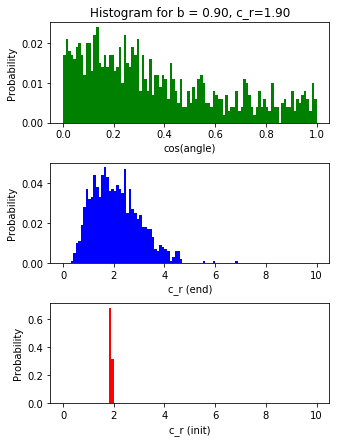

Init: 	 b = 0.90	 C_r = 1.899999997638
Angle:    MEAN = 0.36635254381797094 	 MEDIAN = 0.2942068140168841
Velocity: MEAN = 2.1020006086874505 	 MEDIAN = 2.0029963936147817
Pearson:
init - end : (0.022332041870505814, 0.48055768474739813)
init - ang : (-0.055741496390509356, 0.07809190989497454)
ang  - end : (-0.19875230949896502, 2.2887393393956879e-10)
__________________________________________________________________


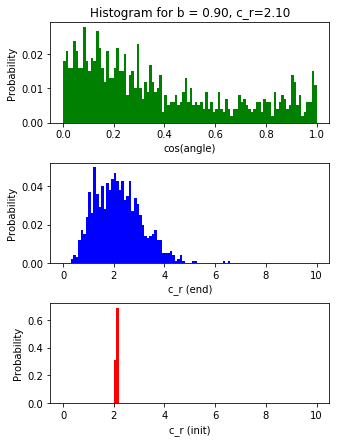

Init: 	 b = 0.90	 C_r = 2.0999999975240002
Angle:    MEAN = 0.37182180733019626 	 MEDIAN = 0.2836845947228673
Velocity: MEAN = 2.1882726545478546 	 MEDIAN = 2.1101929140821802
Pearson:
init - end : (0.014356210792532822, 0.65023279703655401)
init - ang : (0.0061211857288028179, 0.84670162958580231)
ang  - end : (-0.34191980496760638, 8.3523212217901471e-29)
__________________________________________________________________


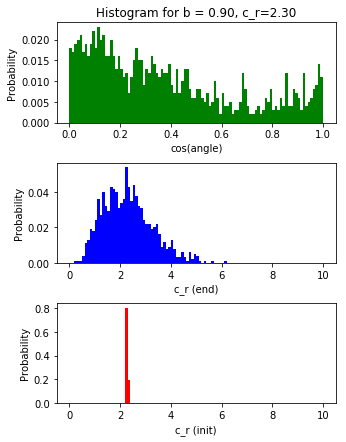

Init: 	 b = 0.90	 C_r = 2.2999999977549996
Angle:    MEAN = 0.3732963371391542 	 MEDIAN = 0.30592195461208627
Velocity: MEAN = 2.2976726927240443 	 MEDIAN = 2.2346823902882713
Pearson:
init - end : (0.0064375813044369352, 0.8388836050038565)
init - ang : (-0.034050474902836046, 0.28204544689438876)
ang  - end : (-0.38596101107282632, 7.1913336655425379e-37)
__________________________________________________________________


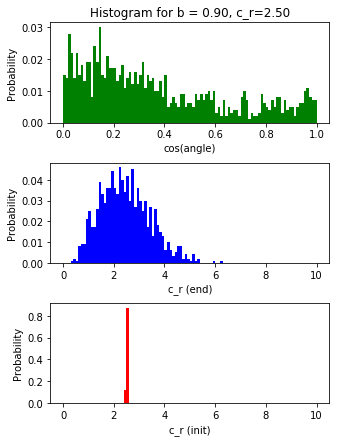

Init: 	 b = 0.90	 C_r = 2.5000000001125
Angle:    MEAN = 0.366800091494817 	 MEDIAN = 0.29360780389418567
Velocity: MEAN = 2.4618187354088765 	 MEDIAN = 2.374943979602718
Pearson:
init - end : (0.0010104308582250289, 0.9745416916591878)
init - ang : (-0.044393495035635964, 0.16068204744982778)
ang  - end : (-0.46959151379092234, 5.5051162029169428e-56)
__________________________________________________________________


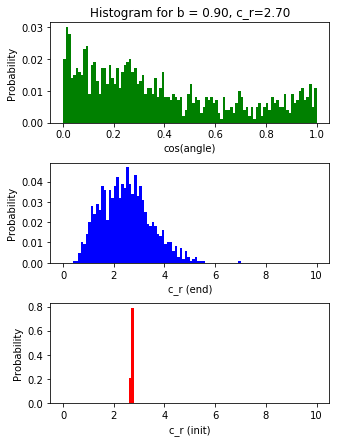

Init: 	 b = 0.90	 C_r = 2.7000000002500006
Angle:    MEAN = 0.3777508206595867 	 MEDIAN = 0.2956837072484064
Velocity: MEAN = 2.4942416108752474 	 MEDIAN = 2.4513633735582765
Pearson:
init - end : (-0.055745928208665411, 0.078068202916925733)
init - ang : (0.058856649130663526, 0.062815409510139683)
ang  - end : (-0.56003472657925402, 1.2384700085320053e-83)
__________________________________________________________________


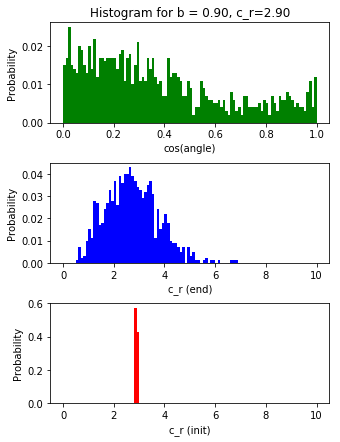

Init: 	 b = 0.90	 C_r = 2.9000000017664997
Angle:    MEAN = 0.37072209808082013 	 MEDIAN = 0.30632143974756243
Velocity: MEAN = 2.7310754767993077 	 MEDIAN = 2.67204776917195
Pearson:
init - end : (0.014294966305571271, 0.6516261902473971)
init - ang : (0.012422740176848031, 0.69478828972073281)
ang  - end : (-0.53706882963528213, 8.3913381207422459e-76)
__________________________________________________________________


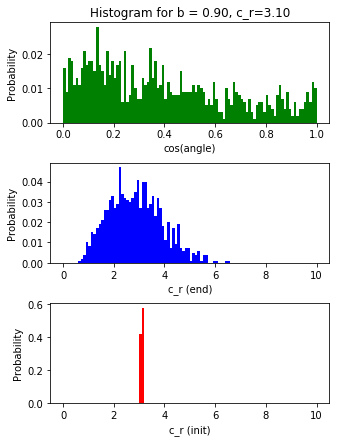

Init: 	 b = 0.90	 C_r = 3.1000000002350006
Angle:    MEAN = 0.39116494680186015 	 MEDIAN = 0.34378024340264024
Velocity: MEAN = 2.8716561279831034 	 MEDIAN = 2.8119569133058366
Pearson:
init - end : (0.054226981119702582, 0.086542660679518379)
init - ang : (-0.03565876116104811, 0.25992137766198986)
ang  - end : (-0.61017261721807103, 4.9060141966364645e-103)
__________________________________________________________________


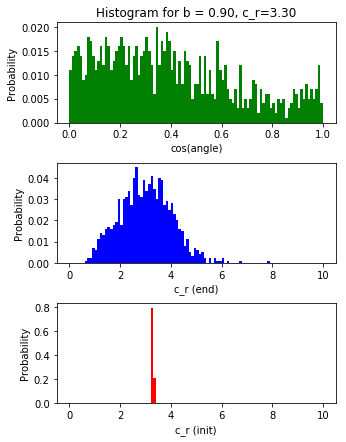

Init: 	 b = 0.90	 C_r = 3.300000001536499
Angle:    MEAN = 0.39675742790387747 	 MEDIAN = 0.35922614624573523
Velocity: MEAN = 3.0123958796218693 	 MEDIAN = 3.001856452717915
Pearson:
init - end : (0.02341487774133278, 0.45953135473320883)
init - ang : (-0.024848658099194752, 0.43249932299362348)
ang  - end : (-0.6274653157674619, 1.4473017263354797e-110)
__________________________________________________________________


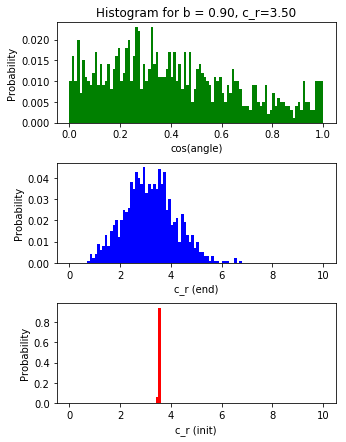

Init: 	 b = 0.90	 C_r = 3.49999999961
Angle:    MEAN = 0.40932612677025704 	 MEDIAN = 0.36929077510649194
Velocity: MEAN = 3.1700005668403866 	 MEDIAN = 3.144523870543417
Pearson:
init - end : (-0.047864301779074914, 0.13038739240441993)
init - ang : (0.0042182586022262037, 0.89401401260538205)
ang  - end : (-0.62591514243269608, 7.1616518712725246e-110)
__________________________________________________________________


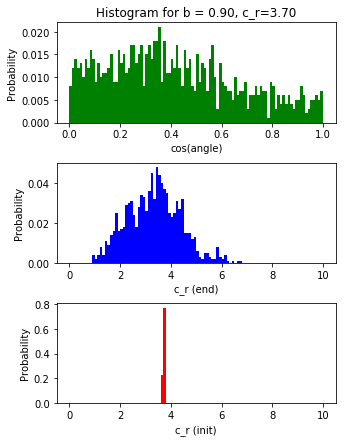

Init: 	 b = 0.90	 C_r = 3.699999998630001
Angle:    MEAN = 0.4124528400520145 	 MEDIAN = 0.375627334969036
Velocity: MEAN = 3.332988635441121 	 MEDIAN = 3.3610807017480058
Pearson:
init - end : (-0.059453512525355433, 0.06019039775965624)
init - ang : (0.06586439575133328, 0.037299413365407305)
ang  - end : (-0.66117678260761625, 1.0604967769161371e-126)
__________________________________________________________________


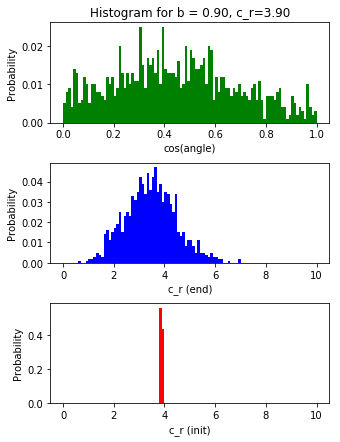

Init: 	 b = 0.90	 C_r = 3.9000000013649987
Angle:    MEAN = 0.44672634572223746 	 MEDIAN = 0.4335166556911101
Velocity: MEAN = 3.45752010573153 	 MEDIAN = 3.449615859539407
Pearson:
init - end : (-0.086627588861530075, 0.0061227719349621103)
init - ang : (0.048172065396027045, 0.12793066705692746)
ang  - end : (-0.65722174293306923, 1.0630050129031725e-124)
__________________________________________________________________


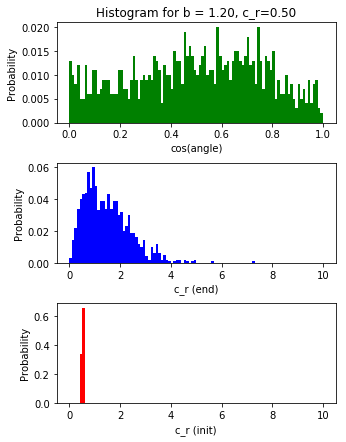

Init: 	 b = 1.20	 C_r = 0.49999999842160003
Angle:    MEAN = 0.4981038248266141 	 MEDIAN = 0.514503584162894
Velocity: MEAN = 1.4946420757281436 	 MEDIAN = 1.3510677229669086
Pearson:
init - end : (-0.01732637629917496, 0.5841974226066512)
init - ang : (-0.016249332679416199, 0.60778329430952871)
ang  - end : (0.10375698886707903, 0.0010167423409067758)
__________________________________________________________________


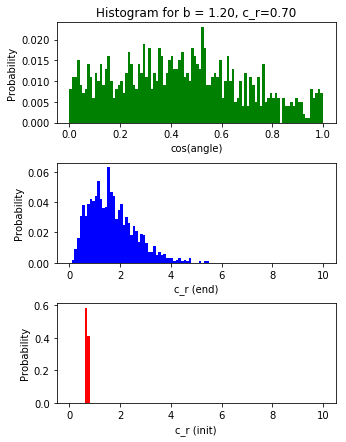

Init: 	 b = 1.20	 C_r = 0.69999999944245
Angle:    MEAN = 0.43910774261465635 	 MEDIAN = 0.42998045294728887
Velocity: MEAN = 1.6869936238592038 	 MEDIAN = 1.5596779370656608
Pearson:
init - end : (-0.025720551131412181, 0.4165206331380471)
init - ang : (0.0056540745602441725, 0.85827116024171202)
ang  - end : (0.0056971492898145407, 0.85720296149381003)
__________________________________________________________________


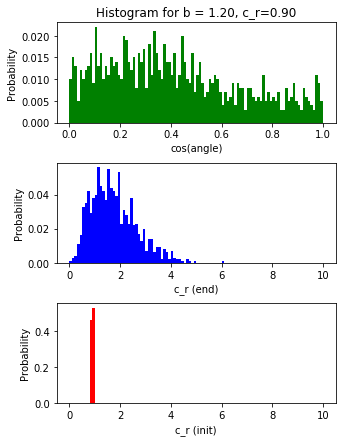

Init: 	 b = 1.20	 C_r = 0.9000000096202
Angle:    MEAN = 0.41254844817612546 	 MEDIAN = 0.3734736188876825
Velocity: MEAN = 1.7575089634082393 	 MEDIAN = 1.6474811260887954
Pearson:
init - end : (0.039010904137609659, 0.21774020421100315)
init - ang : (0.018224504943592727, 0.56486093658751002)
ang  - end : (-0.1738337080994998, 3.1587512043404372e-08)
__________________________________________________________________


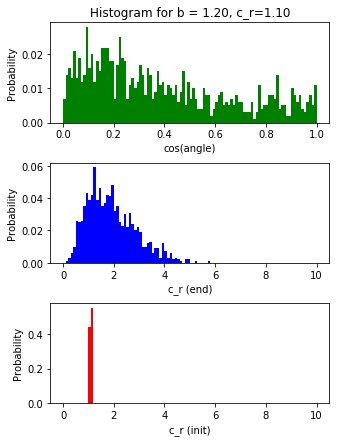

Init: 	 b = 1.20	 C_r = 1.1000000000393002
Angle:    MEAN = 0.3833161932680031 	 MEDIAN = 0.3128751076295271
Velocity: MEAN = 1.907089432437999 	 MEDIAN = 1.7537184860891848
Pearson:
init - end : (0.015726030377544546, 0.61939393872867599)
init - ang : (0.04608854593473851, 0.14528238448550942)
ang  - end : (-0.27543224065376637, 7.237266156080565e-19)
__________________________________________________________________


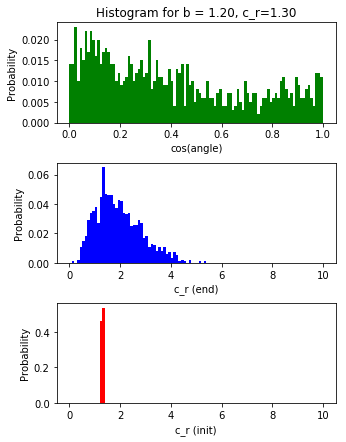

Init: 	 b = 1.20	 C_r = 1.2999999979216
Angle:    MEAN = 0.40514142099826295 	 MEDIAN = 0.3414509174863506
Velocity: MEAN = 1.9392047657403342 	 MEDIAN = 1.8010900784588781
Pearson:
init - end : (0.023333901129900862, 0.46108573523235596)
init - ang : (0.0070216930382642874, 0.82449258602635023)
ang  - end : (-0.36763319374775993, 2.3255498566688853e-33)
__________________________________________________________________


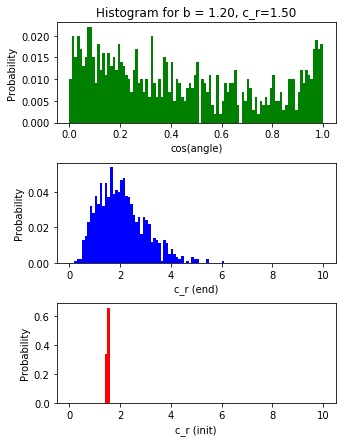

Init: 	 b = 1.20	 C_r = 1.4999999938544502
Angle:    MEAN = 0.43877788756094527 	 MEDIAN = 0.37890473505749556
Velocity: MEAN = 2.053080131593565 	 MEDIAN = 1.9524708278498597
Pearson:
init - end : (-0.0093613264231338748, 0.76748412572775826)
init - ang : (0.0071477673141415515, 0.82139397745807285)
ang  - end : (-0.47051010124625275, 3.16011431525836e-56)
__________________________________________________________________


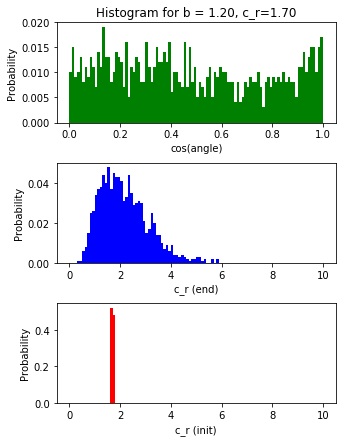

Init: 	 b = 1.20	 C_r = 1.699999998536
Angle:    MEAN = 0.4809147278073268 	 MEDIAN = 0.4472555873674483
Velocity: MEAN = 2.172365291922555 	 MEDIAN = 2.0154862272774783
Pearson:
init - end : (-0.058016919849963447, 0.066667901662307238)
init - ang : (-0.0034132150322851427, 0.91415382439276394)
ang  - end : (-0.48436479125069543, 5.9348412438908469e-60)
__________________________________________________________________


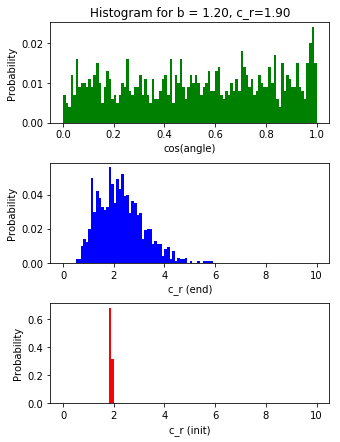

Init: 	 b = 1.20	 C_r = 1.8999999992839998
Angle:    MEAN = 0.5270115432535497 	 MEDIAN = 0.5342445974902112
Velocity: MEAN = 2.2754102648881753 	 MEDIAN = 2.1952775519889807
Pearson:
init - end : (0.014689469008402251, 0.64267221797274754)
init - ang : (-0.010007602753506119, 0.7519415680947884)
ang  - end : (-0.5208269663452455, 1.2821189111128995e-70)
__________________________________________________________________


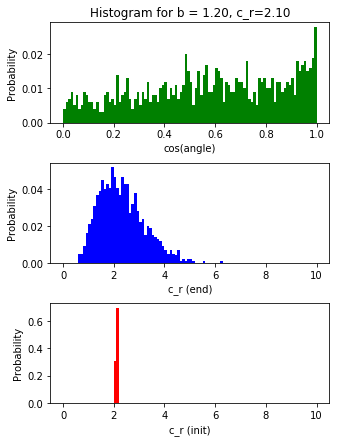

Init: 	 b = 1.20	 C_r = 2.1000000014045
Angle:    MEAN = 0.575209174702952 	 MEDIAN = 0.5933536947621321
Velocity: MEAN = 2.318608816411315 	 MEDIAN = 2.215304908208803
Pearson:
init - end : (-0.022759173327693734, 0.47220178681353142)
init - ang : (0.021572334859321723, 0.49561639443929906)
ang  - end : (-0.5295648024687547, 2.2595213945698136e-73)
__________________________________________________________________


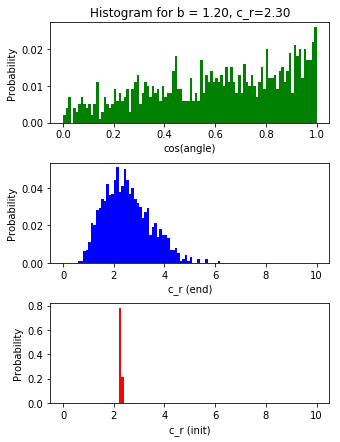

Init: 	 b = 1.20	 C_r = 2.30000000021588
Angle:    MEAN = 0.6095760662918188 	 MEDIAN = 0.6414271253965793
Velocity: MEAN = 2.5311329372359124 	 MEDIAN = 2.4366433359982036
Pearson:
init - end : (0.057759016938631044, 0.067889378224217894)
init - ang : (-0.043267840105119429, 0.17156944897337364)
ang  - end : (-0.53143702377250923, 5.6676954085938643e-74)
__________________________________________________________________


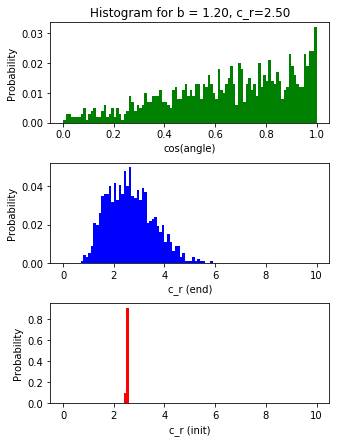

Init: 	 b = 1.20	 C_r = 2.500000001852
Angle:    MEAN = 0.6503707608328391 	 MEDIAN = 0.6825565140019355
Velocity: MEAN = 2.650188262406479 	 MEDIAN = 2.583220018504686
Pearson:
init - end : (-0.020106827099614061, 0.52536146531218486)
init - ang : (0.041925646420655528, 0.1852608431153672)
ang  - end : (-0.56558677637744548, 1.2774934327553411e-85)
__________________________________________________________________


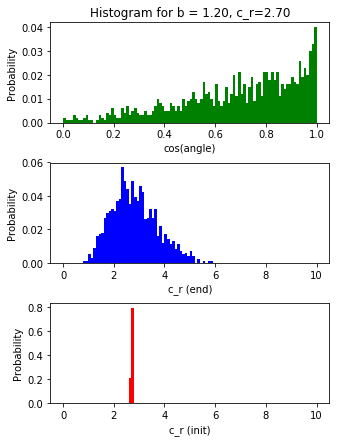

Init: 	 b = 1.20	 C_r = 2.7000000007594998
Angle:    MEAN = 0.6967046493995861 	 MEDIAN = 0.7452494552124405
Velocity: MEAN = 2.823482893871456 	 MEDIAN = 2.743068737407314
Pearson:
init - end : (0.065540157888578365, 0.038246994189858066)
init - ang : (-0.0086369583126240917, 0.78501611620014888)
ang  - end : (-0.47242811379486077, 9.8625349787075817e-57)
__________________________________________________________________


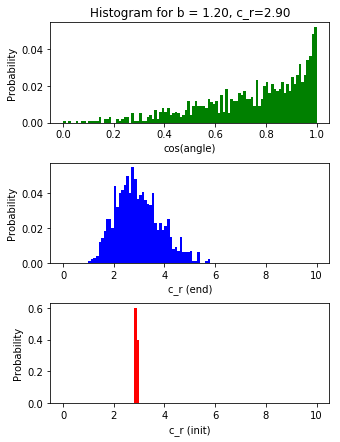

Init: 	 b = 1.20	 C_r = 2.899999994834999
Angle:    MEAN = 0.7524903454695441 	 MEDIAN = 0.8040149831838114
Velocity: MEAN = 2.9646679137733756 	 MEDIAN = 2.857031929248331
Pearson:
init - end : (-0.057631628465925865, 0.068499461080244489)
init - ang : (0.027868621020867609, 0.37866869133243353)
ang  - end : (-0.48808510201123367, 5.5377819550769042e-61)
__________________________________________________________________


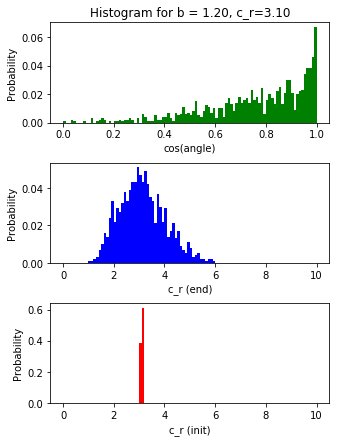

Init: 	 b = 1.20	 C_r = 3.1000000007750006
Angle:    MEAN = 0.7661415814294569 	 MEDIAN = 0.8154390352967649
Velocity: MEAN = 3.131027291308248 	 MEDIAN = 3.071388508740948
Pearson:
init - end : (0.025850072988349005, 0.41417698816621107)
init - ang : (-0.029399039753804226, 0.35303564424410161)
ang  - end : (-0.43376274031815493, 3.9043668187959938e-47)
__________________________________________________________________


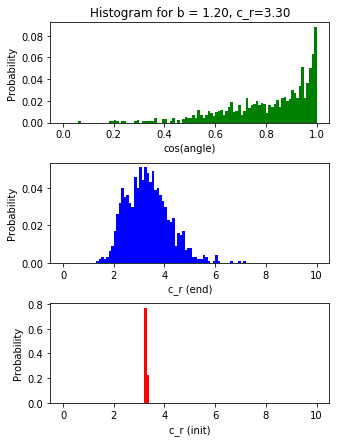

Init: 	 b = 1.20	 C_r = 3.3000000006494994
Angle:    MEAN = 0.8166608156396019 	 MEDIAN = 0.8664466027706398
Velocity: MEAN = 3.349289897604345 	 MEDIAN = 3.295973079768303
Pearson:
init - end : (0.051523619111784644, 0.1034477897727578)
init - ang : (0.0059590128524510313, 0.85071476402791024)
ang  - end : (-0.57854008658284595, 2.0989690489884741e-90)
__________________________________________________________________


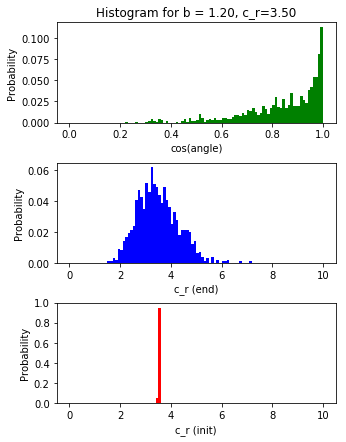

Init: 	 b = 1.20	 C_r = 3.50000000147
Angle:    MEAN = 0.8484505237035387 	 MEDIAN = 0.8922533381361213
Velocity: MEAN = 3.4909576996403886 	 MEDIAN = 3.409697492650223
Pearson:
init - end : (0.011567421500960276, 0.71485112737608825)
init - ang : (-0.015936773550653999, 0.6147064953928576)
ang  - end : (-0.57941742873586655, 9.7761999867936951e-91)
__________________________________________________________________


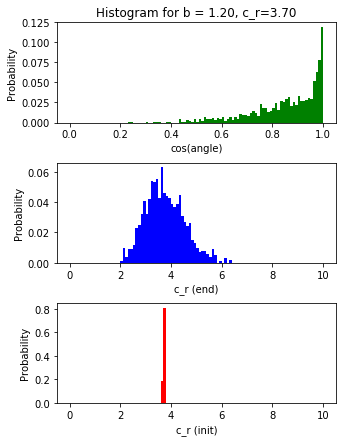

Init: 	 b = 1.20	 C_r = 3.699999999855001
Angle:    MEAN = 0.8564853758382339 	 MEDIAN = 0.8942763793789343
Velocity: MEAN = 3.7651375478056597 	 MEDIAN = 3.685466319641421
Pearson:
init - end : (-0.024494488281406736, 0.43908986623292567)
init - ang : (-0.0098740987750282078, 0.75514427086657965)
ang  - end : (-0.57538494217172786, 3.2143483078553717e-89)
__________________________________________________________________


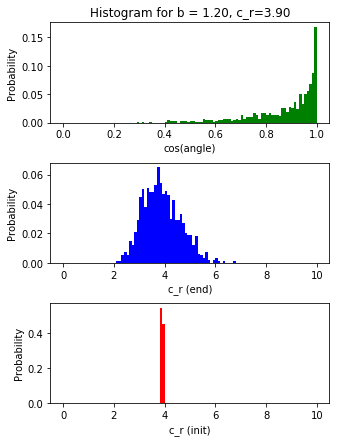

Init: 	 b = 1.20	 C_r = 3.8999999997199994
Angle:    MEAN = 0.8817155103503467 	 MEDIAN = 0.9328485430027365
Velocity: MEAN = 3.885376319359913 	 MEDIAN = 3.8139000714629874
Pearson:
init - end : (0.0046065707014237983, 0.88432311641717498)
init - ang : (0.027536122043756522, 0.3843853965666284)
ang  - end : (-0.61024778092344323, 4.5603961686130877e-103)
__________________________________________________________________


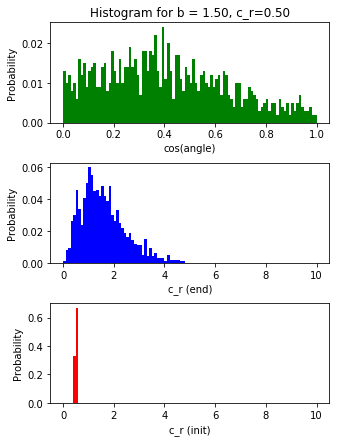

Init: 	 b = 1.50	 C_r = 0.50000000186045
Angle:    MEAN = 0.4062826649096572 	 MEDIAN = 0.3797214115280525
Velocity: MEAN = 1.5952334705741513 	 MEDIAN = 1.455712467819733
Pearson:
init - end : (-0.027147564092491774, 0.39113232906561268)
init - ang : (0.03735362091898841, 0.23793670505231151)
ang  - end : (-0.10842850876475964, 0.00059331348681402978)
__________________________________________________________________


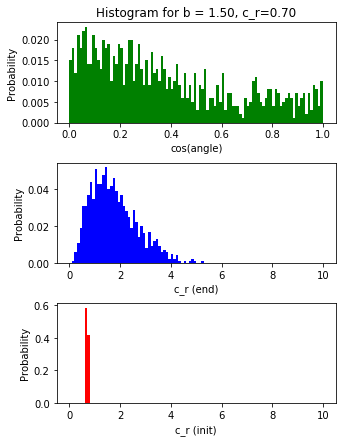

Init: 	 b = 1.50	 C_r = 0.70000000245675
Angle:    MEAN = 0.37673718218934404 	 MEDIAN = 0.30931871053527893
Velocity: MEAN = 1.7632890234483876 	 MEDIAN = 1.6181787648587131
Pearson:
init - end : (0.0058992682517742239, 0.85219418508250266)
init - ang : (0.017091188097742408, 0.58931132753702231)
ang  - end : (-0.31846289119456678, 5.2552406889416734e-25)
__________________________________________________________________


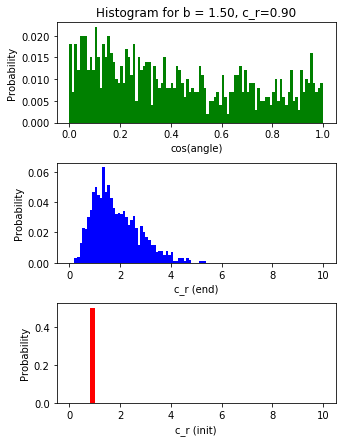

Init: 	 b = 1.50	 C_r = 0.8999999945798051
Angle:    MEAN = 0.423406331364769 	 MEDIAN = 0.36986568376506884
Velocity: MEAN = 1.8497927412392228 	 MEDIAN = 1.6648864320269374
Pearson:
init - end : (-0.016646386352850158, 0.59903898620367257)
init - ang : (0.034115485129150663, 0.28112713079647028)
ang  - end : (-0.43801396323004621, 3.9426934425397517e-48)
__________________________________________________________________


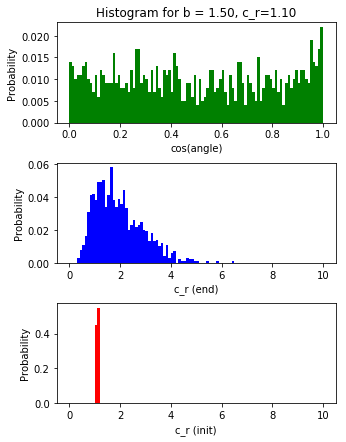

Init: 	 b = 1.50	 C_r = 1.099999996581
Angle:    MEAN = 0.5033870630260583 	 MEDIAN = 0.491359981834145
Velocity: MEAN = 1.9526147577271267 	 MEDIAN = 1.7844229340465652
Pearson:
init - end : (-0.032447524920033104, 0.30533138334349691)
init - ang : (0.032196578765078296, 0.3090889739657835)
ang  - end : (-0.50629694058734154, 3.261666721476142e-66)
__________________________________________________________________


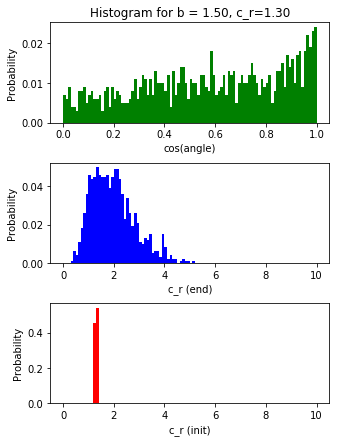

Init: 	 b = 1.50	 C_r = 1.3000000010725001
Angle:    MEAN = 0.5804627261286954 	 MEDIAN = 0.5961901355120249
Velocity: MEAN = 1.9832133572272346 	 MEDIAN = 1.8694478150028921
Pearson:
init - end : (-0.0063738970697233719, 0.84045597067744293)
init - ang : (-0.014576153812624396, 0.64523888864510548)
ang  - end : (-0.45360986964868499, 6.5967003380400179e-52)
__________________________________________________________________


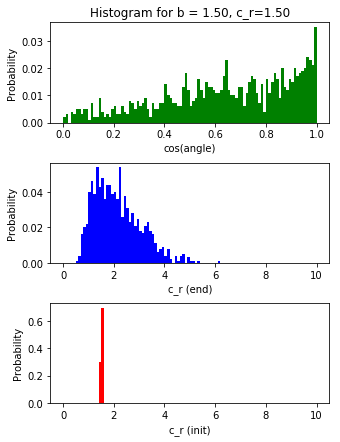

Init: 	 b = 1.50	 C_r = 1.5000000017080002
Angle:    MEAN = 0.6458167975956801 	 MEDIAN = 0.6751952456365014
Velocity: MEAN = 2.1458365294317265 	 MEDIAN = 2.0091922810523
Pearson:
init - end : (0.015353740605021196, 0.62771235658696756)
init - ang : (0.0037876645102271874, 0.90477855833111687)
ang  - end : (-0.39672320548056472, 4.8903624019398854e-39)
__________________________________________________________________


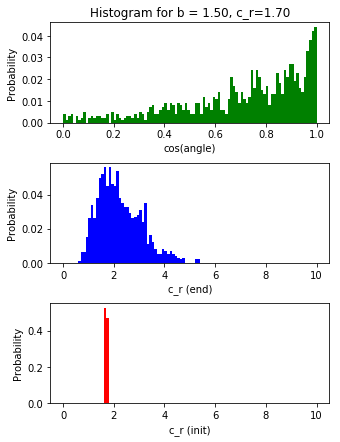

Init: 	 b = 1.50	 C_r = 1.7000000019489998
Angle:    MEAN = 0.7154363435915996 	 MEDIAN = 0.7734073624300823
Velocity: MEAN = 2.2367504959648 	 MEDIAN = 2.0944993314720177
Pearson:
init - end : (0.047468705590395538, 0.1335987401517266)
init - ang : (-0.073427086179191109, 0.020222197737526679)
ang  - end : (-0.22094641168182119, 1.598074931013691e-12)
__________________________________________________________________


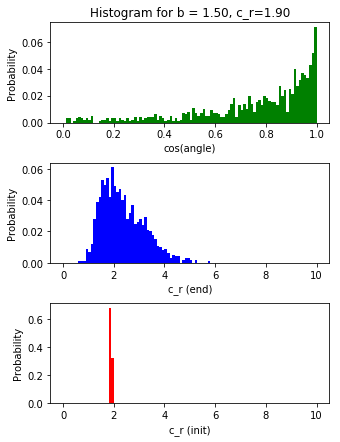

Init: 	 b = 1.50	 C_r = 1.9000000015514997
Angle:    MEAN = 0.7669829208761493 	 MEDIAN = 0.8469905982906104
Velocity: MEAN = 2.365153228007466 	 MEDIAN = 2.216489439737334
Pearson:
init - end : (0.00833674023413177, 0.79231495033375454)
init - ang : (-0.00015802342986998978, 0.9960178627498516)
ang  - end : (-0.13346057776653197, 2.2949944944986425e-05)
__________________________________________________________________


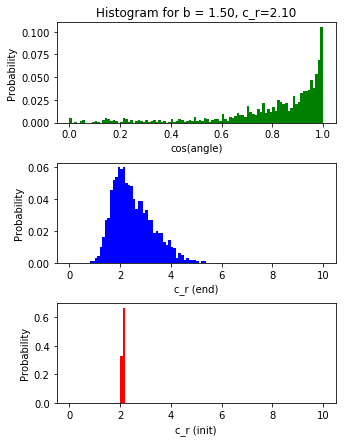

Init: 	 b = 1.50	 C_r = 2.0999999971084997
Angle:    MEAN = 0.8099036666147476 	 MEDIAN = 0.888450590383533
Velocity: MEAN = 2.5021365460516183 	 MEDIAN = 2.3615424423476448
Pearson:
init - end : (-0.039533744817201115, 0.21163161187650209)
init - ang : (0.036408053218923826, 0.25003469549825158)
ang  - end : (0.05857674953578268, 0.064078576200880061)
__________________________________________________________________


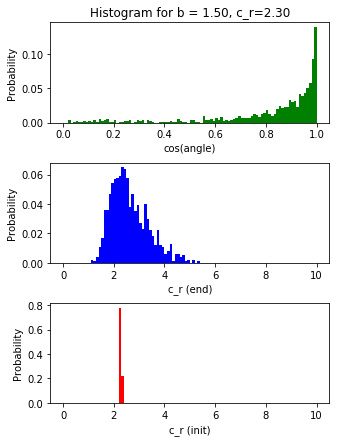

Init: 	 b = 1.50	 C_r = 2.3000000050816496
Angle:    MEAN = 0.836182448151743 	 MEDIAN = 0.9143255246080367
Velocity: MEAN = 2.627597803805844 	 MEDIAN = 2.4859541357141106
Pearson:
init - end : (0.012995931493071006, 0.68146064333869294)
init - ang : (0.020050067708143948, 0.52653157130860029)
ang  - end : (0.17910801228141671, 1.1772698804150172e-08)
__________________________________________________________________


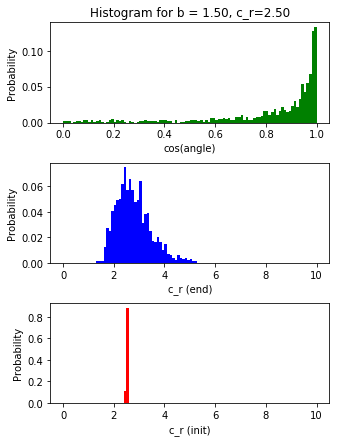

Init: 	 b = 1.50	 C_r = 2.5000000003425
Angle:    MEAN = 0.8354291848045847 	 MEDIAN = 0.935852893277819
Velocity: MEAN = 2.7817666226705686 	 MEDIAN = 2.6842552588975073
Pearson:
init - end : (0.0016866476114423539, 0.95751693453726106)
init - ang : (0.01035970172251508, 0.74351543012650168)
ang  - end : (0.42600117084506239, 2.3622800170569205e-45)
__________________________________________________________________


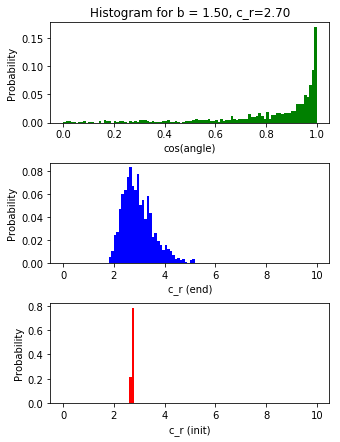

Init: 	 b = 1.50	 C_r = 2.6999999965429007
Angle:    MEAN = 0.8365262022964408 	 MEDIAN = 0.9279244122112277
Velocity: MEAN = 2.9454951370714997 	 MEDIAN = 2.865264377407547
Pearson:
init - end : (-0.028583757099645508, 0.36655151029420352)
init - ang : (-0.036040695043465389, 0.25484861296405348)
ang  - end : (0.51100410660875673, 1.2867042231091117e-67)
__________________________________________________________________


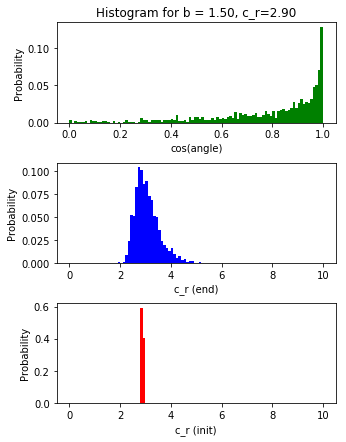

Init: 	 b = 1.50	 C_r = 2.8999999998899995
Angle:    MEAN = 0.7969684788283122 	 MEDIAN = 0.884660647580388
Velocity: MEAN = 3.0646446734823103 	 MEDIAN = 2.9829844450131575
Pearson:
init - end : (-0.057760049534921039, 0.067884451255038322)
init - ang : (-0.019959631591815834, 0.52839867144795516)
ang  - end : (0.57308953342816915, 2.2971626194233289e-88)
__________________________________________________________________


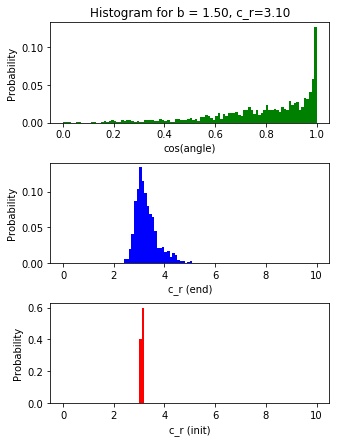

Init: 	 b = 1.50	 C_r = 3.1000000019850003
Angle:    MEAN = 0.7917721429204457 	 MEDIAN = 0.8495013389617798
Velocity: MEAN = 3.2859370366267893 	 MEDIAN = 3.193123199193793
Pearson:
init - end : (-0.010414314685323341, 0.74221119263115742)
init - ang : (0.010771660560717241, 0.73369563719680309)
ang  - end : (0.57280309495023318, 2.9329165563122494e-88)
__________________________________________________________________


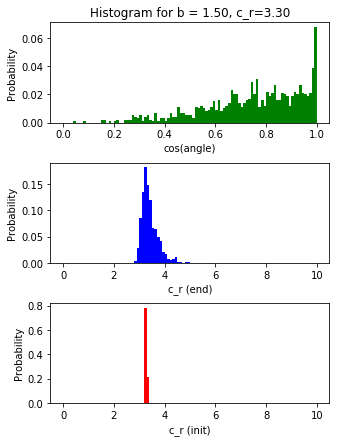

Init: 	 b = 1.50	 C_r = 3.300000000191499
Angle:    MEAN = 0.7514412289566949 	 MEDIAN = 0.77781126138843
Velocity: MEAN = 3.415421884253918 	 MEDIAN = 3.3412466315722864
Pearson:
init - end : (-0.076988884830741275, 0.014884697935074197)
init - ang : (-0.02663345498531804, 0.40016888505403903)
ang  - end : (0.53694315425396255, 9.2265009620965999e-76)
__________________________________________________________________


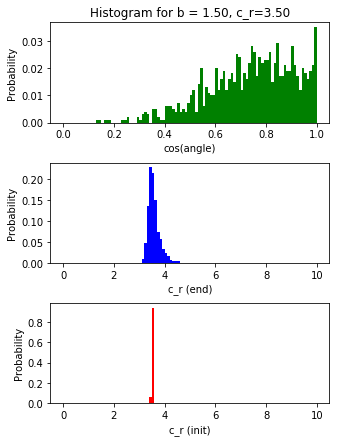

Init: 	 b = 1.50	 C_r = 3.49999999981135
Angle:    MEAN = 0.7416154770469241 	 MEDIAN = 0.7600898449750636
Velocity: MEAN = 3.575509350039325 	 MEDIAN = 3.53222538041754
Pearson:
init - end : (0.032662526339351301, 0.30213618499053102)
init - ang : (-0.011985233960826736, 0.70502507211964049)
ang  - end : (0.4617486797583733, 5.8792427847140385e-54)
__________________________________________________________________


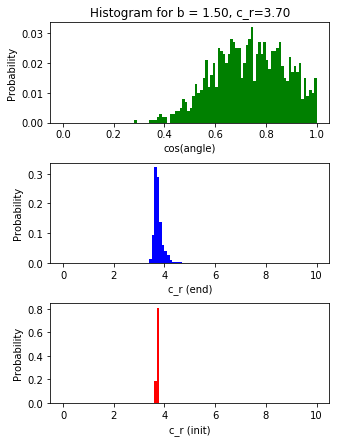

Init: 	 b = 1.50	 C_r = 3.700000001632001
Angle:    MEAN = 0.735009710345521 	 MEDIAN = 0.7380623110281216
Velocity: MEAN = 3.754229358830872 	 MEDIAN = 3.716796273465148
Pearson:
init - end : (-0.0083578133976233079, 0.79180202270734823)
init - ang : (-0.011845049601749136, 0.70831653079235224)
ang  - end : (0.44868494715147716, 1.0793031247552699e-50)
__________________________________________________________________


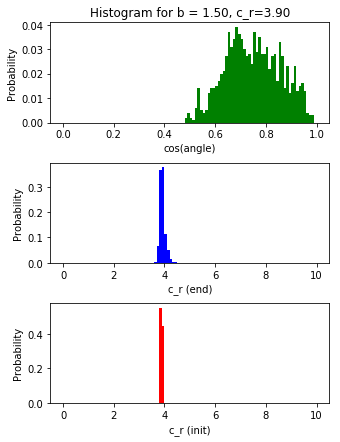

Init: 	 b = 1.50	 C_r = 3.900000000109999
Angle:    MEAN = 0.7503509990454968 	 MEDIAN = 0.7478993417211979
Velocity: MEAN = 3.9259974882394935 	 MEDIAN = 3.909475738775015
Pearson:
init - end : (-0.01084785158437594, 0.73188418682098733)
init - ang : (0.021211841668139109, 0.50284901912019853)
ang  - end : (0.35541366021218695, 3.834451182709029e-31)
__________________________________________________________________


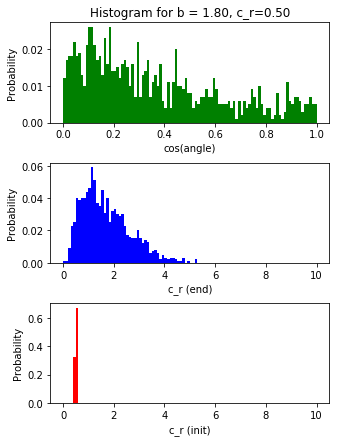

Init: 	 b = 1.80	 C_r = 0.50000000029505
Angle:    MEAN = 0.36090563324707675 	 MEDIAN = 0.29468463921277344
Velocity: MEAN = 1.6982154717552393 	 MEDIAN = 1.5224939179052384
Pearson:
init - end : (0.0074520955138765756, 0.81392585248187532)
init - ang : (0.00238813594085168, 0.93987645480040471)
ang  - end : (-0.3901817041146507, 1.0383665655582427e-37)
__________________________________________________________________


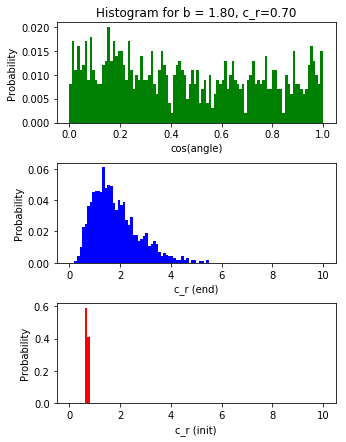

Init: 	 b = 1.80	 C_r = 0.7000000002663999
Angle:    MEAN = 0.46450510310593135 	 MEDIAN = 0.4334762194433899
Velocity: MEAN = 1.8309681405019131 	 MEDIAN = 1.643207105760721
Pearson:
init - end : (-0.012577856877635029, 0.69117205227050116)
init - ang : (0.011573189759409597, 0.71471514404878722)
ang  - end : (-0.44908976259776806, 8.5925060454798216e-51)
__________________________________________________________________


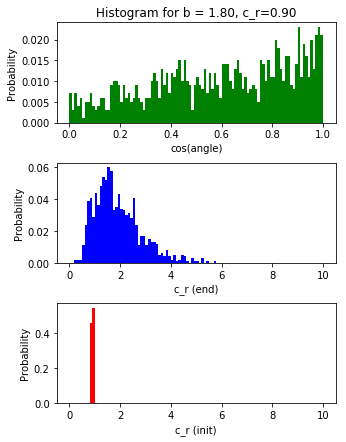

Init: 	 b = 1.80	 C_r = 0.9000000059841
Angle:    MEAN = 0.5971310156712145 	 MEDIAN = 0.6245119236646774
Velocity: MEAN = 1.8984165457616824 	 MEDIAN = 1.6941061983199748
Pearson:
init - end : (-0.019245628993125607, 0.54325689107922148)
init - ang : (-0.0077256482445567541, 0.80722731076562715)
ang  - end : (-0.38742425144891862, 3.6882914025439203e-37)
__________________________________________________________________


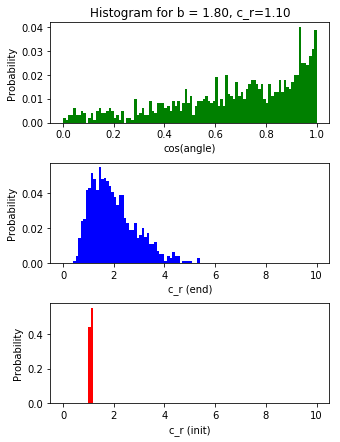

Init: 	 b = 1.80	 C_r = 1.0999999989415001
Angle:    MEAN = 0.6840088548570258 	 MEDIAN = 0.7399191460282735
Velocity: MEAN = 1.9872171186792869 	 MEDIAN = 1.8064845070785056
Pearson:
init - end : (-0.028105032949125995, 0.37463598709950152)
init - ang : (-0.061650967823962191, 0.051296550294645589)
ang  - end : (-0.18842525639228452, 1.9139733350242093e-09)
__________________________________________________________________


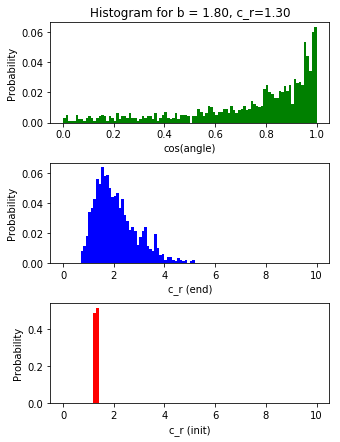

Init: 	 b = 1.80	 C_r = 1.2999999950174999
Angle:    MEAN = 0.7521161870509415 	 MEDIAN = 0.839515487000668
Velocity: MEAN = 2.0904519964715558 	 MEDIAN = 1.9255282137198118
Pearson:
init - end : (-0.023537695510473765, 0.45717941708149423)
init - ang : (0.022042311287457865, 0.48627110577192978)
ang  - end : (0.05714550655257699, 0.070869052832768328)
__________________________________________________________________


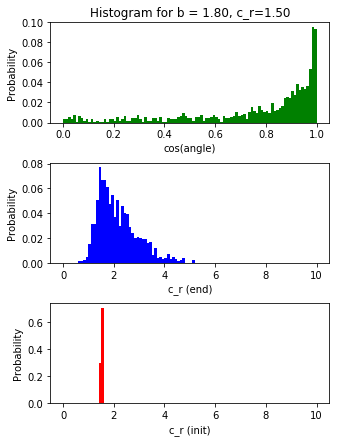

Init: 	 b = 1.80	 C_r = 1.50000000080425
Angle:    MEAN = 0.7752339073167661 	 MEDIAN = 0.8889793572668787
Velocity: MEAN = 2.155374766447799 	 MEDIAN = 1.978103683228051
Pearson:
init - end : (-0.038442428685074366, 0.2245244680984439)
init - ang : (-0.0092339457537934932, 0.77055882439619061)
ang  - end : (0.27561136747587794, 6.8572654700645344e-19)
__________________________________________________________________


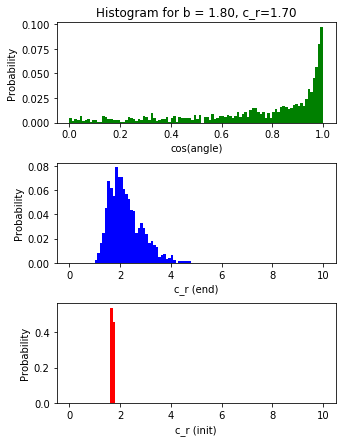

Init: 	 b = 1.80	 C_r = 1.6999999943811
Angle:    MEAN = 0.7433574840848591 	 MEDIAN = 0.8513949762930941
Velocity: MEAN = 2.215924813455106 	 MEDIAN = 2.098541216572717
Pearson:
init - end : (-0.020063205764385653, 0.52626060953601128)
init - ang : (-0.0035815397873616181, 0.90993784414961376)
ang  - end : (0.47220250793548857, 1.1314622729851305e-56)
__________________________________________________________________


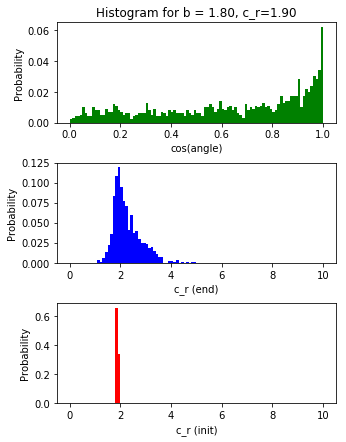

Init: 	 b = 1.80	 C_r = 1.9000000017403496
Angle:    MEAN = 0.6400046765431314 	 MEDIAN = 0.7140134856226714
Velocity: MEAN = 2.2613920185910747 	 MEDIAN = 2.121011053818775
Pearson:
init - end : (0.022816759781396734, 0.47108137926274118)
init - ang : (0.0052640648894030015, 0.86795446822177846)
ang  - end : (0.43484814752527179, 2.1810357439407525e-47)
__________________________________________________________________


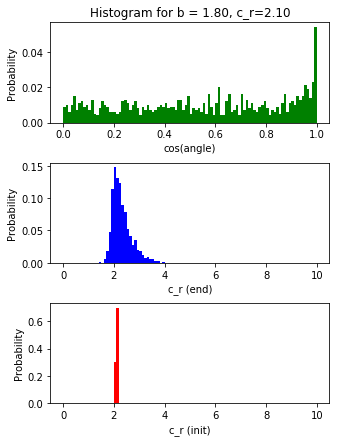

Init: 	 b = 1.80	 C_r = 2.1000000048090004
Angle:    MEAN = 0.5516530459907517 	 MEDIAN = 0.5710035885601965
Velocity: MEAN = 2.3149859744268455 	 MEDIAN = 2.2280355097719435
Pearson:
init - end : (-0.013671665379472096, 0.66587553506580854)
init - ang : (-0.017748018131342642, 0.57508129141217879)
ang  - end : (0.057522327471850113, 0.06902650025631471)
__________________________________________________________________


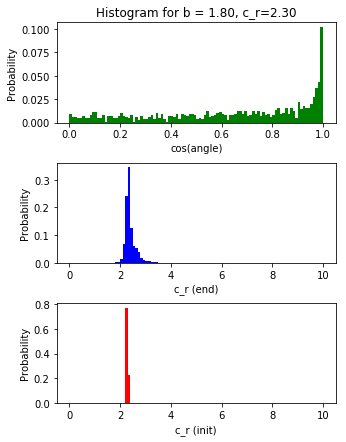

Init: 	 b = 1.80	 C_r = 2.3000000045379996
Angle:    MEAN = 0.6479490366635723 	 MEDIAN = 0.7205750870278651
Velocity: MEAN = 2.393669703598712 	 MEDIAN = 2.3414232224817733
Pearson:
init - end : (0.01033674294678778, 0.7440639390103484)
init - ang : (-0.015346770005230354, 0.62786856300449623)
ang  - end : (-0.49009805046309396, 1.5159255231812731e-61)
__________________________________________________________________


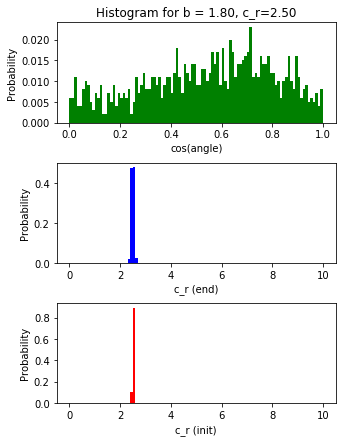

Init: 	 b = 1.80	 C_r = 2.5000000007030003
Angle:    MEAN = 0.5453939992716468 	 MEDIAN = 0.5766016914505423
Velocity: MEAN = 2.5009573617053675 	 MEDIAN = 2.5000183890544245
Pearson:
init - end : (0.013440851804846124, 0.67118324839232957)
init - ang : (-0.022604251608045356, 0.47522322194741518)
ang  - end : (0.016901348243082228, 0.59345415983413297)
__________________________________________________________________


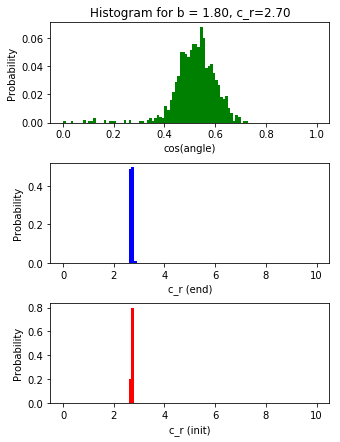

Init: 	 b = 1.80	 C_r = 2.6999999997700006
Angle:    MEAN = 0.5207917816047721 	 MEDIAN = 0.5253720319697153
Velocity: MEAN = 2.702672900650204 	 MEDIAN = 2.7000227382263606
Pearson:
init - end : (-0.0055950447882080513, 0.85973544437859117)
init - ang : (-0.057986037425228079, 0.066813207430915802)
ang  - end : (-0.11590938871290696, 0.00023955121873055487)
__________________________________________________________________


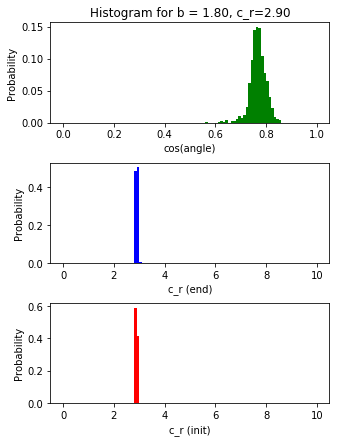

Init: 	 b = 1.80	 C_r = 2.8999999982799993
Angle:    MEAN = 0.7681658895995226 	 MEDIAN = 0.7680152517644664
Velocity: MEAN = 2.9006622376402174 	 MEDIAN = 2.900011940805887
Pearson:
init - end : (0.013321385704225659, 0.67393691855935012)
init - ang : (0.0021562862784595032, 0.94570399673817385)
ang  - end : (-0.071276735135375094, 0.024195130340804751)
__________________________________________________________________


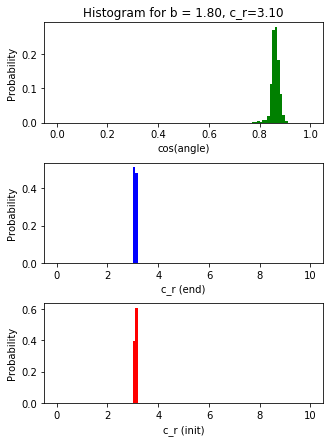

Init: 	 b = 1.80	 C_r = 3.1000000007550006
Angle:    MEAN = 0.8624396101214794 	 MEDIAN = 0.8625191024566944
Velocity: MEAN = 3.099866233751257 	 MEDIAN = 3.099982800047022
Pearson:
init - end : (0.019094638174881797, 0.54642537202039554)
init - ang : (0.0050880395618923642, 0.8723314692400056)
ang  - end : (-0.12773306207587606, 5.103718310118001e-05)
__________________________________________________________________


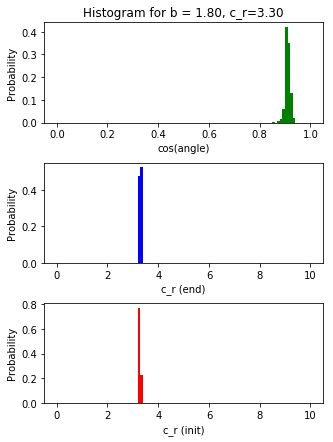

Init: 	 b = 1.80	 C_r = 3.3000000001749994
Angle:    MEAN = 0.9104602488014679 	 MEDIAN = 0.9099615276769358
Velocity: MEAN = 3.301023186440529 	 MEDIAN = 3.3000694788748044
Pearson:
init - end : (0.019166121228818524, 0.54492419023407745)
init - ang : (0.018779156205954776, 0.55307499742196953)
ang  - end : (-0.04309443075685053, 0.1732945623084724)
__________________________________________________________________


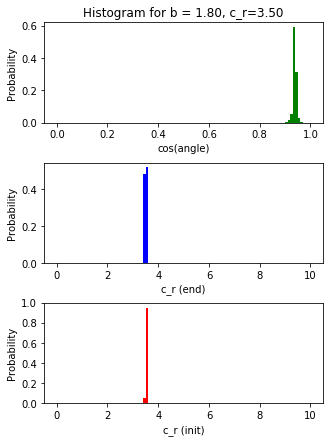

Init: 	 b = 1.80	 C_r = 3.5000000004
Angle:    MEAN = 0.9378824329778147 	 MEDIAN = 0.9376419701263612
Velocity: MEAN = 3.499593959087075 	 MEDIAN = 3.500036506985178
Pearson:
init - end : (0.056746626173710131, 0.072863147526856464)
init - ang : (0.029458792641628692, 0.35205758819328292)
ang  - end : (0.013770355232975255, 0.66361116645654117)
__________________________________________________________________


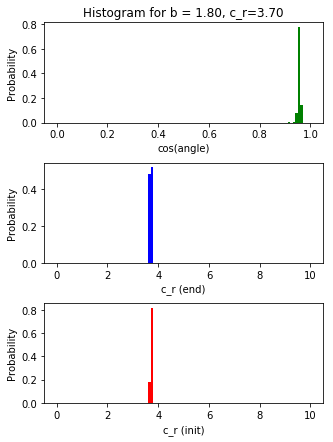

Init: 	 b = 1.80	 C_r = 3.699999998945001
Angle:    MEAN = 0.955225398026152 	 MEDIAN = 0.9551273587721139
Velocity: MEAN = 3.700308990121843 	 MEDIAN = 3.700067052898313
Pearson:
init - end : (0.040195590499792072, 0.20407762473913246)
init - ang : (-0.0074112081182011449, 0.81492825161158688)
ang  - end : (-0.027364466918619035, 0.38735721142478885)
__________________________________________________________________


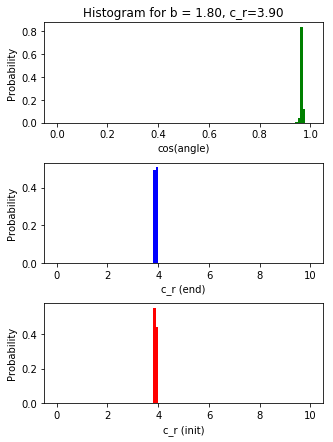

Init: 	 b = 1.80	 C_r = 3.8999999982389992
Angle:    MEAN = 0.9662917146740565 	 MEDIAN = 0.9662198996465993
Velocity: MEAN = 3.9002333696759397 	 MEDIAN = 3.9000240709109044
Pearson:
init - end : (-0.0042699806377256211, 0.8927222689524833)
init - ang : (-0.018419526061612863, 0.56070315564855866)
ang  - end : (-0.053525609941765487, 0.090698569878459007)
__________________________________________________________________


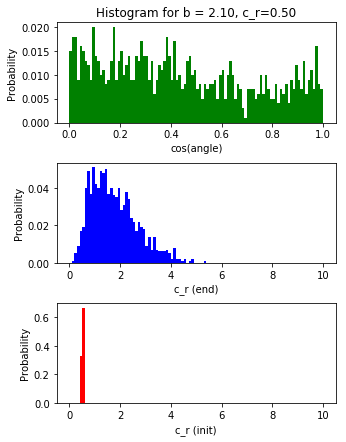

Init: 	 b = 2.10	 C_r = 0.5000000015096501
Angle:    MEAN = 0.43685210499661686 	 MEDIAN = 0.3916038411496438
Velocity: MEAN = 1.7706520221199946 	 MEDIAN = 1.6128781304548285
Pearson:
init - end : (-0.016548545435028993, 0.60118844525101811)
init - ang : (-0.030177819289401921, 0.34042289928643832)
ang  - end : (-0.39680785522067857, 4.6986454621703501e-39)
__________________________________________________________________


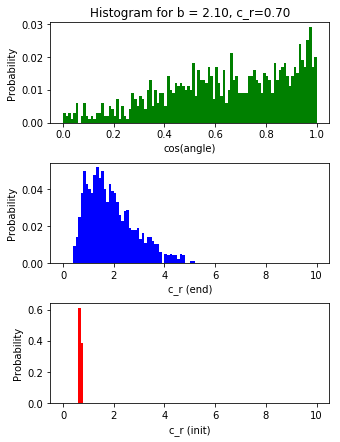

Init: 	 b = 2.10	 C_r = 0.6999999912551
Angle:    MEAN = 0.6449793896644491 	 MEDIAN = 0.6668240989359872
Velocity: MEAN = 1.9072649713795198 	 MEDIAN = 1.7228031974151476
Pearson:
init - end : (0.033163983083892325, 0.2947705102858646)
init - ang : (-0.0064703593953382606, 0.83807456280076842)
ang  - end : (-0.30259899749729546, 1.275122062553049e-22)
__________________________________________________________________


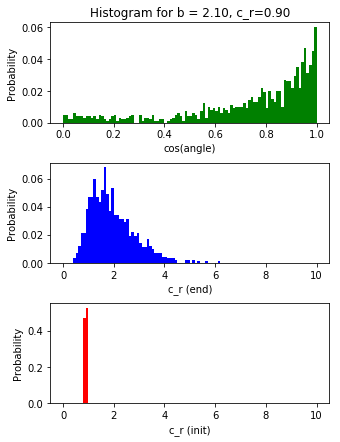

Init: 	 b = 2.10	 C_r = 0.8999999981221849
Angle:    MEAN = 0.7468063529447085 	 MEDIAN = 0.8378336771738639
Velocity: MEAN = 1.9529419104812955 	 MEDIAN = 1.769405608405593
Pearson:
init - end : (0.021762633521299354, 0.49182088906012988)
init - ang : (0.039718430939754287, 0.2095036801109019)
ang  - end : (0.032702094693548581, 0.30155057752055853)
__________________________________________________________________


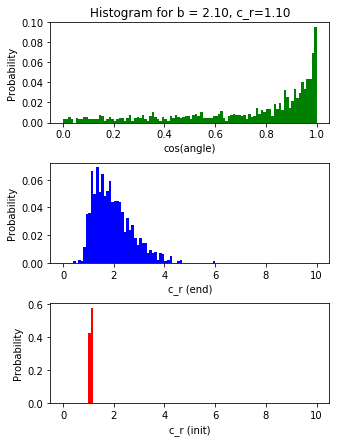

Init: 	 b = 2.10	 C_r = 1.0999999994645
Angle:    MEAN = 0.7438612942602061 	 MEDIAN = 0.8707642810399334
Velocity: MEAN = 1.9550869851154262 	 MEDIAN = 1.8252549642602272
Pearson:
init - end : (0.022022560570314407, 0.48666191620809107)
init - ang : (0.024244320824526825, 0.44377959574605774)
ang  - end : (0.36581564164452096, 5.0400315350283428e-33)
__________________________________________________________________


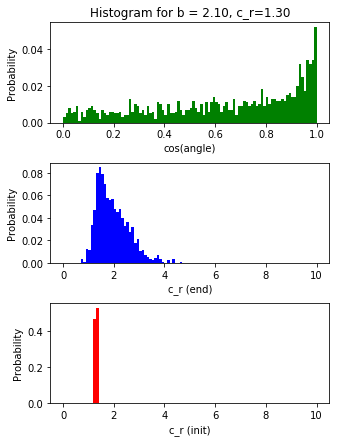

Init: 	 b = 2.10	 C_r = 1.3000000040914002
Angle:    MEAN = 0.6432186621808962 	 MEDIAN = 0.713475446985295
Velocity: MEAN = 1.9562319325738755 	 MEDIAN = 1.831354815582639
Pearson:
init - end : (0.015122489897411478, 0.63290338136064894)
init - ang : (0.0035961886049777009, 0.90957105757283341)
ang  - end : (0.31362726201711422, 2.9041254605557364e-24)
__________________________________________________________________


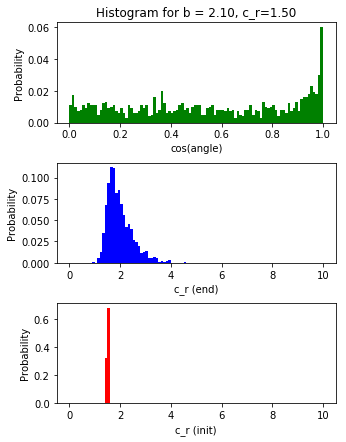

Init: 	 b = 2.10	 C_r = 1.4999999975405
Angle:    MEAN = 0.5501558430200563 	 MEDIAN = 0.5491675559003342
Velocity: MEAN = 1.9863584451244625 	 MEDIAN = 1.871262904582534
Pearson:
init - end : (0.027341288734448833, 0.3877595577493852)
init - ang : (0.029675547098799, 0.34852407120946627)
ang  - end : (-0.14532466713742143, 3.9434945238536662e-06)
__________________________________________________________________


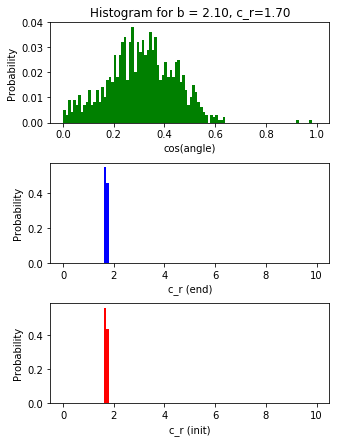

Init: 	 b = 2.10	 C_r = 1.6999999959577499
Angle:    MEAN = 0.30981430769310403 	 MEDIAN = 0.3111510963518004
Velocity: MEAN = 1.7008028578015746 	 MEDIAN = 1.6999974693092892
Pearson:
init - end : (-0.0029524976241638661, 0.92570527001578262)
init - ang : (-0.028465717918211383, 0.36853474275335119)
ang  - end : (0.062565045760597598, 0.047935032830738647)
__________________________________________________________________


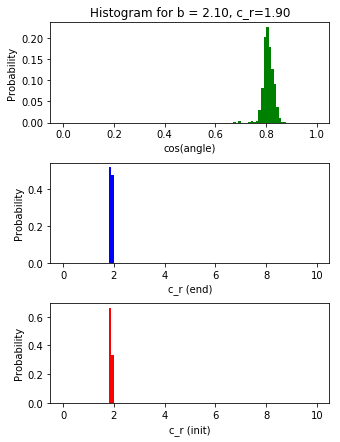

Init: 	 b = 2.10	 C_r = 1.9000000029849995
Angle:    MEAN = 0.8085907906324828 	 MEDIAN = 0.8071535281761177
Velocity: MEAN = 1.9001733725543153 	 MEDIAN = 1.8999985533595094
Pearson:
init - end : (0.0063372420239116208, 0.84136127356817747)
init - ang : (-0.0058417219285698862, 0.85361966264729028)
ang  - end : (-0.10857828507025803, 0.00058295035185726895)
__________________________________________________________________


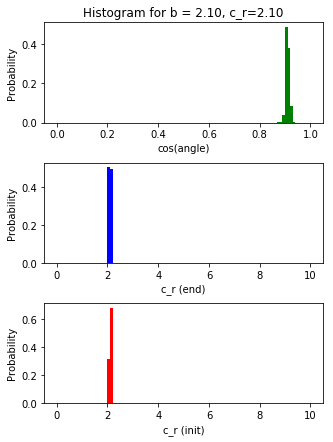

Init: 	 b = 2.10	 C_r = 2.099999994273
Angle:    MEAN = 0.9101260017191359 	 MEDIAN = 0.9093892315075592
Velocity: MEAN = 2.1001015090257327 	 MEDIAN = 2.0999988076678004
Pearson:
init - end : (-0.0090513208826968738, 0.77497327754497736)
init - ang : (-0.050347292616905001, 0.11157828704433048)
ang  - end : (-0.039310512531049335, 0.2142244357631809)
__________________________________________________________________


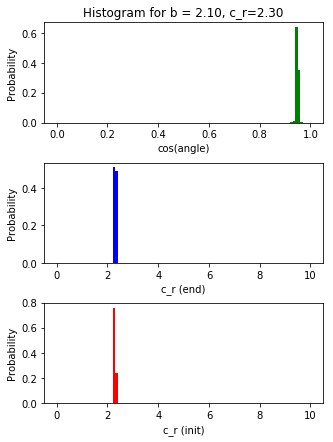

Init: 	 b = 2.10	 C_r = 2.3000000047835
Angle:    MEAN = 0.9490335712256006 	 MEDIAN = 0.9485912589944632
Velocity: MEAN = 2.300116583359915 	 MEDIAN = 2.299998715159587
Pearson:
init - end : (0.012140727161779101, 0.70138061045883826)
init - ang : (-0.011316822034208373, 0.72076753623686884)
ang  - end : (-0.031115400230934478, 0.32562579506018341)
__________________________________________________________________


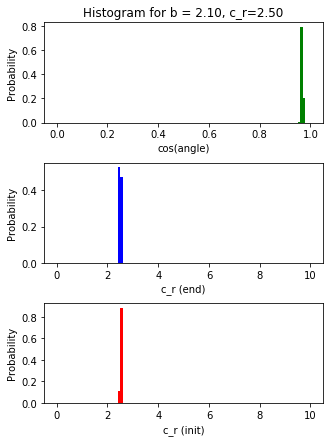

Init: 	 b = 2.10	 C_r = 2.500000000132
Angle:    MEAN = 0.9682364763524121 	 MEDIAN = 0.9680040765238065
Velocity: MEAN = 2.5000924441047174 	 MEDIAN = 2.4999969708398346
Pearson:
init - end : (-0.0073609281597587254, 0.81616133435479044)
init - ang : (0.019402930103925162, 0.539965734766929)
ang  - end : (-0.07550192824779009, 0.01694017561087861)
__________________________________________________________________


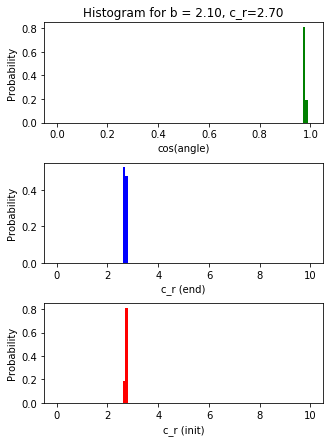

Init: 	 b = 2.10	 C_r = 2.7000000011550003
Angle:    MEAN = 0.9788278449900361 	 MEDIAN = 0.9786779870607794
Velocity: MEAN = 2.7000570751880706 	 MEDIAN = 2.6999940710553787
Pearson:
init - end : (0.0048948291023755714, 0.87714028340923)
init - ang : (0.030600027743692838, 0.33370705726635275)
ang  - end : (-0.056333806723368275, 0.074974968974330161)
__________________________________________________________________


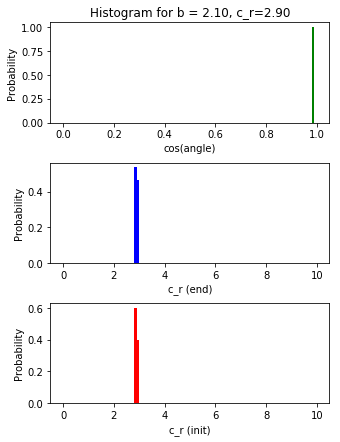

Init: 	 b = 2.10	 C_r = 2.9000000005254996
Angle:    MEAN = 0.9852635367851891 	 MEDIAN = 0.9851471778555112
Velocity: MEAN = 2.8999237676506335 	 MEDIAN = 2.899989362434146
Pearson:
init - end : (0.021247489514983516, 0.50213133828158329)
init - ang : (0.025004360099043239, 0.42962014708323559)
ang  - end : (-0.012046280447664546, 0.70359344823792436)
__________________________________________________________________


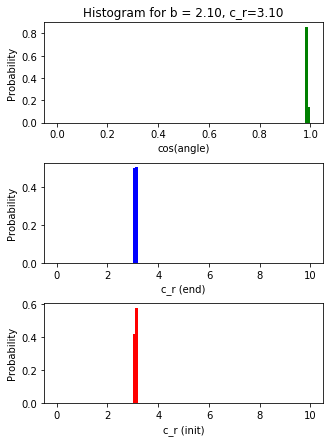

Init: 	 b = 2.10	 C_r = 3.1000000009260007
Angle:    MEAN = 0.9893130074787839 	 MEDIAN = 0.989235649100255
Velocity: MEAN = 3.100088048222008 	 MEDIAN = 3.1000005849088295
Pearson:
init - end : (-0.031586767527048511, 0.31834677129742928)
init - ang : (-0.00020394064751310016, 0.99486077849939381)
ang  - end : (-0.071482502129059294, 0.023787742524941247)
__________________________________________________________________


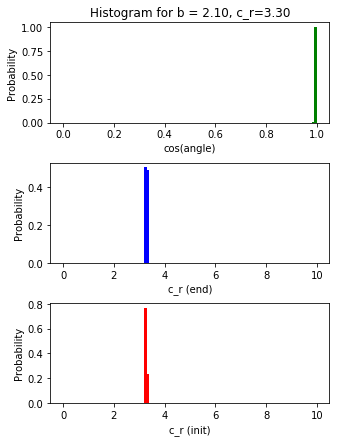

Init: 	 b = 2.10	 C_r = 3.2999999994799993
Angle:    MEAN = 0.9920369007757558 	 MEDIAN = 0.9919929770747303
Velocity: MEAN = 3.300052213462509 	 MEDIAN = 3.2999973562295484
Pearson:
init - end : (0.027753240443959208, 0.38064649967619169)
init - ang : (-0.044257197408717183, 0.16197188984730446)
ang  - end : (-0.0088985767247527388, 0.77867103889861911)
__________________________________________________________________


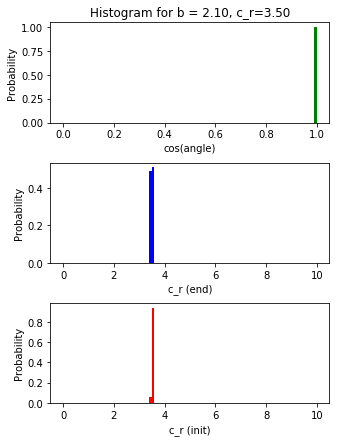

Init: 	 b = 2.10	 C_r = 3.4999999985485
Angle:    MEAN = 0.9939140515277785 	 MEDIAN = 0.9938843561790542
Velocity: MEAN = 3.499878512016593 	 MEDIAN = 3.5000051146146003
Pearson:
init - end : (0.019248949982489431, 0.5431873042591554)
init - ang : (-0.019969594360512339, 0.52819282005535961)
ang  - end : (0.0061311149696847509, 0.84645604813736308)
__________________________________________________________________


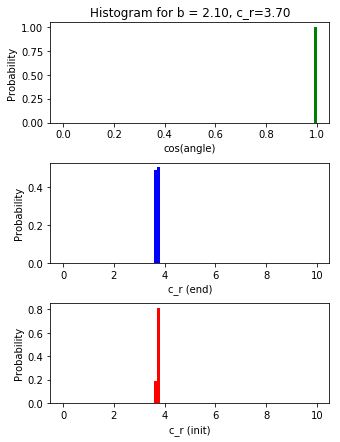

Init: 	 b = 2.10	 C_r = 3.7000000006950007
Angle:    MEAN = 0.9952894213787717 	 MEDIAN = 0.9952511646396548
Velocity: MEAN = 3.7001327107277326 	 MEDIAN = 3.7000052450775733
Pearson:
init - end : (0.01391034942164209, 0.6604043584375523)
init - ang : (0.021426628459074719, 0.49853302797465071)
ang  - end : (0.039793257459287169, 0.20864595635480634)
__________________________________________________________________


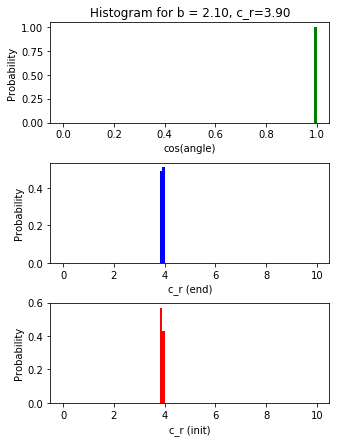

Init: 	 b = 2.10	 C_r = 3.900000000789999
Angle:    MEAN = 0.9962935584331245 	 MEDIAN = 0.9962730781768638
Velocity: MEAN = 3.899979225557734 	 MEDIAN = 3.900005495167611
Pearson:
init - end : (0.00075635943267904002, 0.98094172773098731)
init - ang : (-0.0048380008157621708, 0.87855555267580276)
ang  - end : (0.0055430529357083811, 0.86102554608440807)
__________________________________________________________________


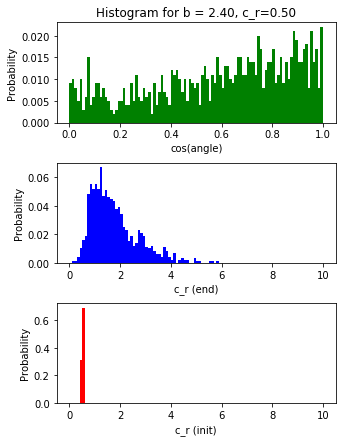

Init: 	 b = 2.40	 C_r = 0.500000000750365
Angle:    MEAN = 0.5908420170165664 	 MEDIAN = 0.644439598346397
Velocity: MEAN = 1.7654398733225347 	 MEDIAN = 1.5467634319988997
Pearson:
init - end : (0.010105712474103086, 0.7495906706631591)
init - ang : (0.0041471429840487508, 0.8957905633446519)
ang  - end : (-0.26711801740924612, 8.468133713467211e-18)
__________________________________________________________________


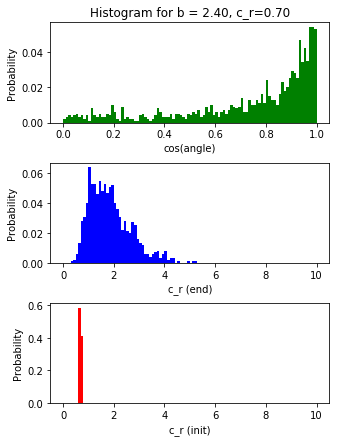

Init: 	 b = 2.40	 C_r = 0.6999999960539499
Angle:    MEAN = 0.7414343605251655 	 MEDIAN = 0.8514951902186098
Velocity: MEAN = 1.8513444464142967 	 MEDIAN = 1.7126689996949493
Pearson:
init - end : (-0.0046345682730079673, 0.88362504578861045)
init - ang : (-0.022967338032401842, 0.46815864760262915)
ang  - end : (0.14339480833775628, 5.3033286450852024e-06)
__________________________________________________________________


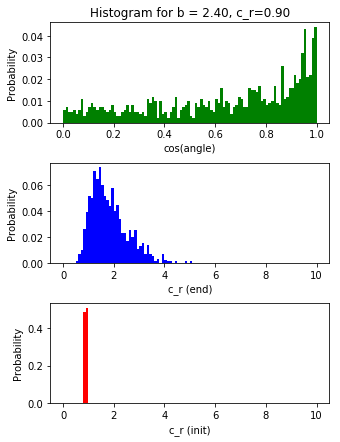

Init: 	 b = 2.40	 C_r = 0.89999999940265
Angle:    MEAN = 0.6435149953002851 	 MEDIAN = 0.7318900913875319
Velocity: MEAN = 1.831891104845698 	 MEDIAN = 1.6944527401199245
Pearson:
init - end : (-0.013069400707670448, 0.67975941062745759)
init - ang : (0.047819640302913045, 0.13074691978363193)
ang  - end : (0.2363767209706121, 3.6439173016210307e-14)
__________________________________________________________________


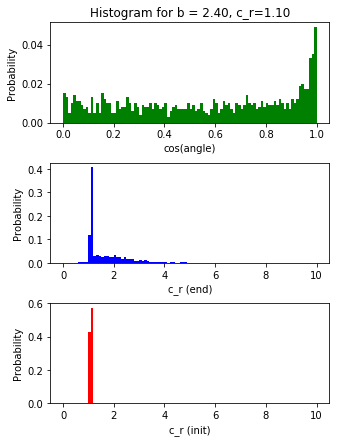

Init: 	 b = 2.40	 C_r = 1.1000000030325
Angle:    MEAN = 0.560970067507167 	 MEDIAN = 0.5948293223898564
Velocity: MEAN = 1.5979501660419833 	 MEDIAN = 1.1016821515808024
Pearson:
init - end : (-0.009744161591492979, 0.75826544924882988)
init - ang : (-0.030722825847216258, 0.33176990396573913)
ang  - end : (0.10388912213421805, 0.0010016610240903374)
__________________________________________________________________


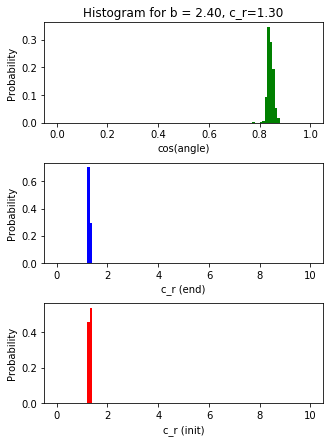

Init: 	 b = 2.40	 C_r = 1.3000000006595
Angle:    MEAN = 0.8429359044562655 	 MEDIAN = 0.8414219762767877
Velocity: MEAN = 1.3000319081468137 	 MEDIAN = 1.2999972186616724
Pearson:
init - end : (-0.015170329533443784, 0.63182800275531048)
init - ang : (0.020529149959267676, 0.51669710498204369)
ang  - end : (-0.065701953328082388, 0.037771625092324415)
__________________________________________________________________


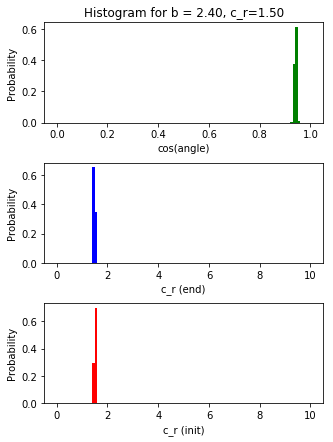

Init: 	 b = 2.40	 C_r = 1.50000000198905
Angle:    MEAN = 0.9413729267919273 	 MEDIAN = 0.9407745951401558
Velocity: MEAN = 1.5000227268812625 	 MEDIAN = 1.4999976290085457
Pearson:
init - end : (-0.030035150572132976, 0.34271166479633852)
init - ang : (0.027816766387910457, 0.37955678033077744)
ang  - end : (-0.012600867048519034, 0.69063621216401594)
__________________________________________________________________


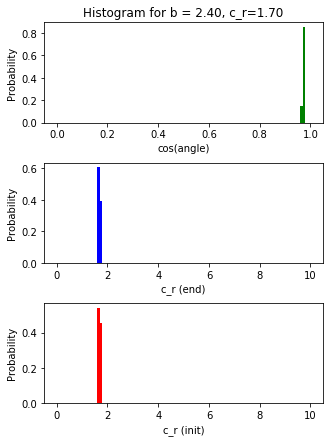

Init: 	 b = 2.40	 C_r = 1.699999999443
Angle:    MEAN = 0.9713170271850874 	 MEDIAN = 0.9711357090917998
Velocity: MEAN = 1.6999929160643203 	 MEDIAN = 1.6999979230811797
Pearson:
init - end : (0.048520892414065916, 0.12518977445562557)
init - ang : (-0.022719596565140887, 0.47297264516931325)
ang  - end : (0.051095938436438032, 0.10634763832028842)
__________________________________________________________________


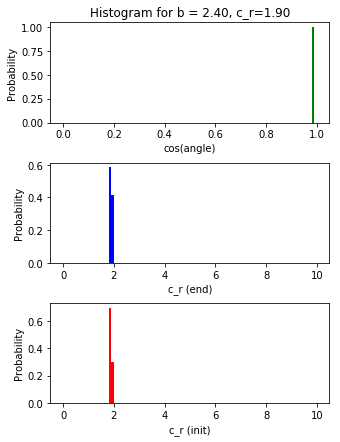

Init: 	 b = 2.40	 C_r = 1.8999999968924999
Angle:    MEAN = 0.9838177717834042 	 MEDIAN = 0.9837164620204499
Velocity: MEAN = 1.8999961474824207 	 MEDIAN = 1.8999982587611426
Pearson:
init - end : (0.0048656384459173588, 0.87786720787594186)
init - ang : (0.071434829724025692, 0.023881594172199896)
ang  - end : (0.0061097588494254847, 0.84698427075768667)
__________________________________________________________________


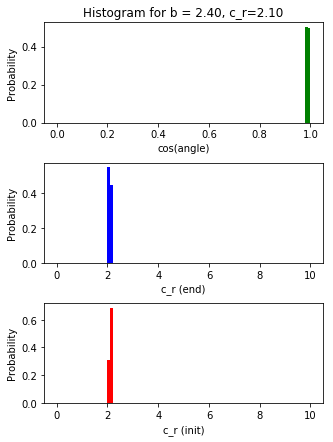

Init: 	 b = 2.40	 C_r = 2.09999999656125
Angle:    MEAN = 0.9900829519701728 	 MEDIAN = 0.9899969989813071
Velocity: MEAN = 2.1000334104673053 	 MEDIAN = 2.0999986839914815
Pearson:
init - end : (0.054891045213592053, 0.082750659050760844)
init - ang : (-0.010423861335881052, 0.74198328039414652)
ang  - end : (-0.028889741905844323, 0.36144152985364297)
__________________________________________________________________


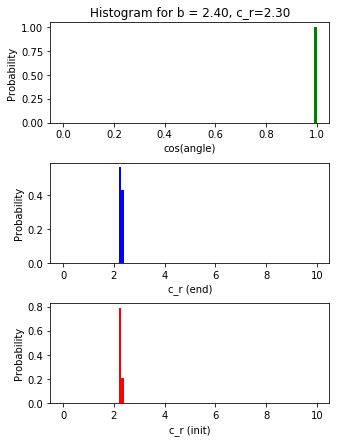

Init: 	 b = 2.40	 C_r = 2.2999999980104
Angle:    MEAN = 0.9935122951514901 	 MEDIAN = 0.9934737642797637
Velocity: MEAN = 2.3000070145794544 	 MEDIAN = 2.2999981105133753
Pearson:
init - end : (0.020244972230398769, 0.52251913787205473)
init - ang : (0.0083089720608880389, 0.79299097370622418)
ang  - end : (-0.023046226848630825, 0.46663142365732246)
__________________________________________________________________


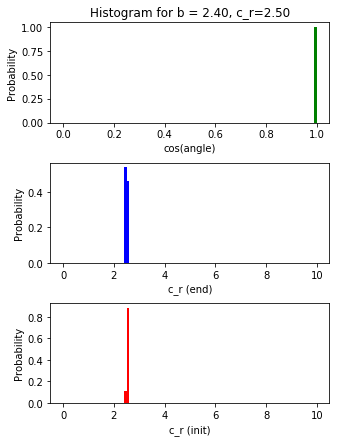

Init: 	 b = 2.40	 C_r = 2.500000000426
Angle:    MEAN = 0.9955613450196258 	 MEDIAN = 0.9955258611444437
Velocity: MEAN = 2.500015678936071 	 MEDIAN = 2.4999983823445255
Pearson:
init - end : (-0.014388058479280718, 0.64950870184409371)
init - ang : (-0.011114884036745163, 0.72554728842730731)
ang  - end : (-0.019835696130488016, 0.53096284020618079)
__________________________________________________________________


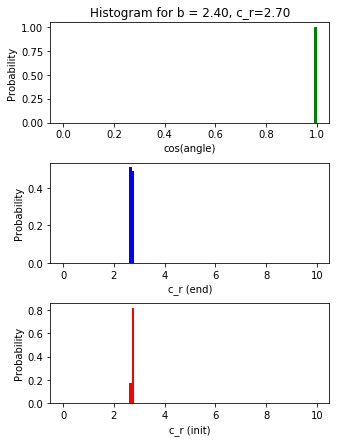

Init: 	 b = 2.40	 C_r = 2.7000000018040007
Angle:    MEAN = 0.9968441831913897 	 MEDIAN = 0.9968239913492425
Velocity: MEAN = 2.7000102618864665 	 MEDIAN = 2.699999651991304
Pearson:
init - end : (-0.013269093141137339, 0.67514362853260312)
init - ang : (0.04683776037721471, 0.13884659309086048)
ang  - end : (0.045695476635038416, 0.14874886662569242)
__________________________________________________________________


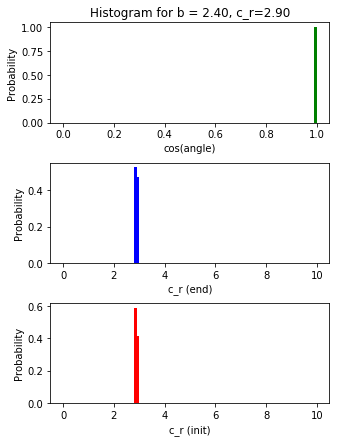

Init: 	 b = 2.40	 C_r = 2.8999999991609995
Angle:    MEAN = 0.997697647611996 	 MEDIAN = 0.9976848358814772
Velocity: MEAN = 2.899956597811669 	 MEDIAN = 2.8999982666707993
Pearson:
init - end : (0.0078764932648212656, 0.80353953312606907)
init - ang : (-0.017801512617264998, 0.57392952832456445)
ang  - end : (-0.0049173864494766236, 0.87657861669459303)
__________________________________________________________________


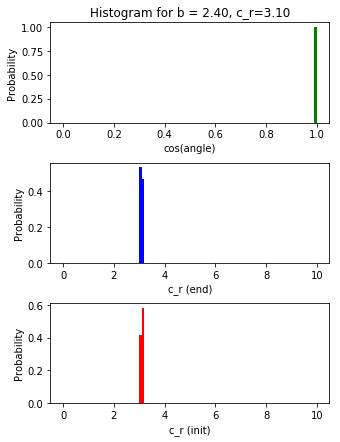

Init: 	 b = 2.40	 C_r = 3.1000000006500006
Angle:    MEAN = 0.9982744259946252 	 MEDIAN = 0.9982641728029704
Velocity: MEAN = 3.100001107829194 	 MEDIAN = 3.0999984361365343
Pearson:
init - end : (-0.003932703940772323, 0.90115062367427279)
init - ang : (0.012468782000237242, 0.69371418773201432)
ang  - end : (-0.018580392845810353, 0.55728470826677667)
__________________________________________________________________


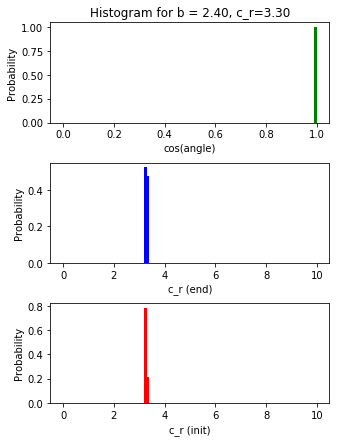

Init: 	 b = 2.40	 C_r = 3.2999999995079987
Angle:    MEAN = 0.9986803376244032 	 MEDIAN = 0.9986705198856355
Velocity: MEAN = 3.299962535594941 	 MEDIAN = 3.299998681183707
Pearson:
init - end : (-0.023082033885410219, 0.46593914015352611)
init - ang : (0.023030719166830398, 0.46693142172439062)
ang  - end : (0.05315840662144234, 0.092937485294025832)
__________________________________________________________________


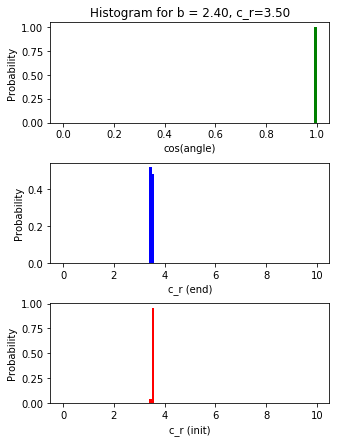

Init: 	 b = 2.40	 C_r = 3.49999999902
Angle:    MEAN = 0.9989739677812417 	 MEDIAN = 0.9989676362924607
Velocity: MEAN = 3.499987071459455 	 MEDIAN = 3.499998748793901
Pearson:
init - end : (0.028383875407460759, 0.36991372402567635)
init - ang : (-0.032704116923234827, 0.30152066901521279)
ang  - end : (0.005172590809471073, 0.87022854378704761)
__________________________________________________________________


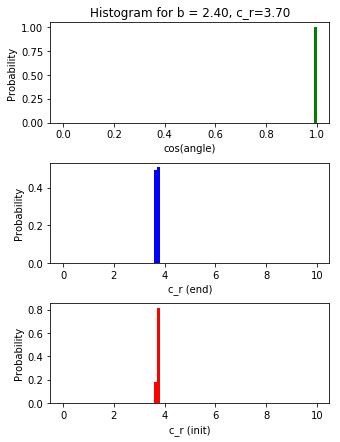

Init: 	 b = 2.40	 C_r = 3.7000000004100007
Angle:    MEAN = 0.999183539029943 	 MEDIAN = 0.9991797884955747
Velocity: MEAN = 3.6999982567924716 	 MEDIAN = 3.700001156683362
Pearson:
init - end : (-0.044485083622697895, 0.1598196692820272)
init - ang : (0.048780794148982932, 0.1231774886147657)
ang  - end : (-0.023218198825159315, 0.46331177248539368)
__________________________________________________________________


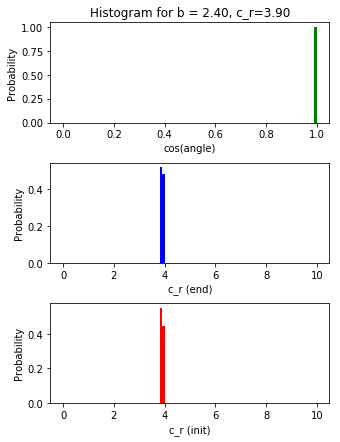

Init: 	 b = 2.40	 C_r = 3.900000000049999
Angle:    MEAN = 0.9993465454728353 	 MEDIAN = 0.9993422957262043
Velocity: MEAN = 3.9000005191788176 	 MEDIAN = 3.89999665532447
Pearson:
init - end : (-0.010163709494546863, 0.7482020406875558)
init - ang : (0.021213956469079705, 0.50280642775789919)
ang  - end : (0.051307995049391535, 0.1049018654843198)
__________________________________________________________________


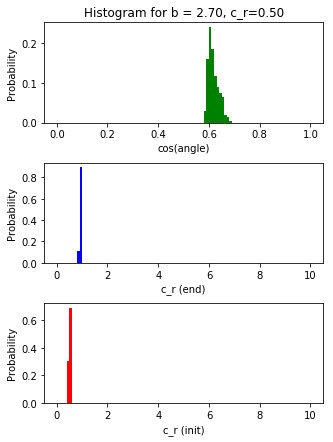

Init: 	 b = 2.70	 C_r = 0.5000000047705
Angle:    MEAN = 0.6185257808848068 	 MEDIAN = 0.6138918607023504
Velocity: MEAN = 0.9381186642444687 	 MEDIAN = 0.9434674251952802
Pearson:
init - end : (0.019692564074909737, 0.53393200136245778)
init - ang : (-0.017391666992558032, 0.58278141533969752)
ang  - end : (-0.98089403206186243, 0.0)
__________________________________________________________________


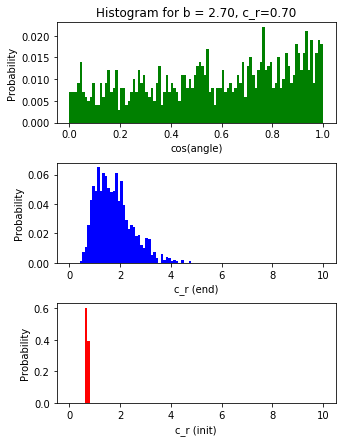

Init: 	 b = 2.70	 C_r = 0.6999999993811999
Angle:    MEAN = 0.568975276363253 	 MEDIAN = 0.6007715511481514
Velocity: MEAN = 1.7559483540196166 	 MEDIAN = 1.6578162110610453
Pearson:
init - end : (0.0014425630250780557, 0.96366030034603478)
init - ang : (-0.025917640270913277, 0.41295748390100673)
ang  - end : (0.22025466498079396, 1.8811863775637222e-12)
__________________________________________________________________


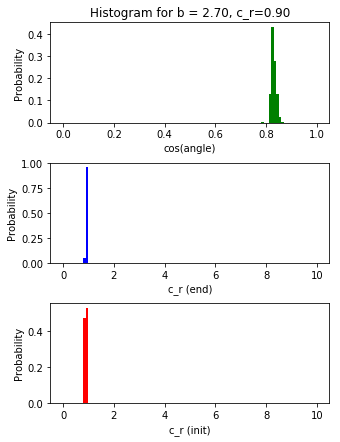

Init: 	 b = 2.70	 C_r = 0.9000000008075001
Angle:    MEAN = 0.829828968557646 	 MEDIAN = 0.8285925147076219
Velocity: MEAN = 0.9001196706211074 	 MEDIAN = 0.9001038959223676
Pearson:
init - end : (0.038165666956333916, 0.22788142789473143)
init - ang : (-0.028410037149200033, 0.36947257175846204)
ang  - end : (-0.052889670063162905, 0.094603931382668038)
__________________________________________________________________


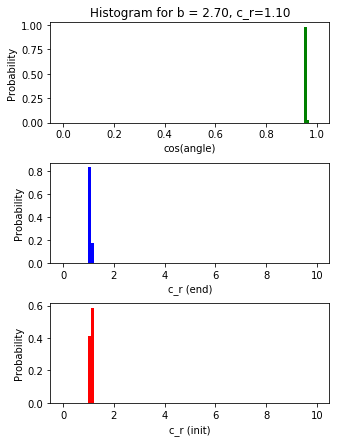

Init: 	 b = 2.70	 C_r = 1.1000000068620002
Angle:    MEAN = 0.9560098072944746 	 MEDIAN = 0.9556561051674191
Velocity: MEAN = 1.0999830861884399 	 MEDIAN = 1.0999971686905219
Pearson:
init - end : (-0.031585972950774414, 0.31835895119038249)
init - ang : (-0.010601386930128182, 0.73774925365194854)
ang  - end : (-0.046340660601779694, 0.14309171797102549)
__________________________________________________________________


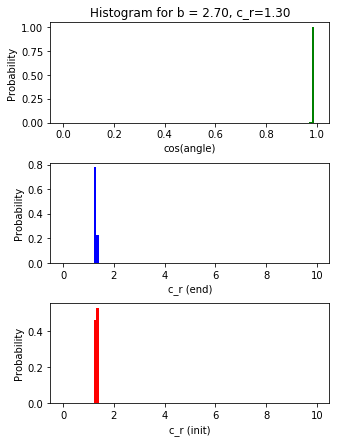

Init: 	 b = 2.70	 C_r = 1.2999999970975
Angle:    MEAN = 0.9820460840725252 	 MEDIAN = 0.9819314024860384
Velocity: MEAN = 1.2999790228876826 	 MEDIAN = 1.2999975837098745
Pearson:
init - end : (0.042936235046063025, 0.17487958857756689)
init - ang : (0.018146555828761398, 0.56652691569969282)
ang  - end : (0.07656920768626499, 0.015441354420716711)
__________________________________________________________________


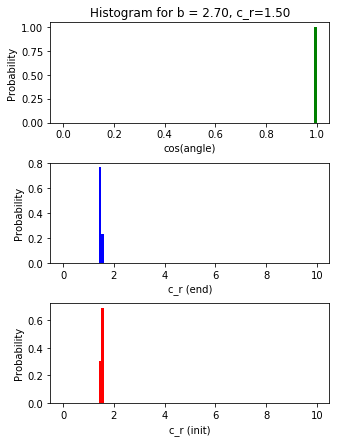

Init: 	 b = 2.70	 C_r = 1.500000003951
Angle:    MEAN = 0.9910662782024279 	 MEDIAN = 0.9910027588931754
Velocity: MEAN = 1.500001637349446 	 MEDIAN = 1.4999978926620885
Pearson:
init - end : (0.028320166599824604, 0.37098937973770651)
init - ang : (0.046976761901075879, 0.1376770500398935)
ang  - end : (-0.086081023892948583, 0.0064540752105434421)
__________________________________________________________________


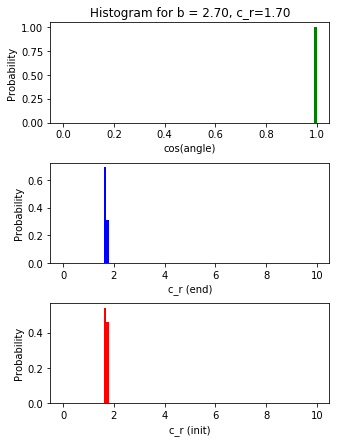

Init: 	 b = 2.70	 C_r = 1.69999999740295
Angle:    MEAN = 0.994985165517537 	 MEDIAN = 0.9949640956855159
Velocity: MEAN = 1.6999988123129757 	 MEDIAN = 1.6999981913375195
Pearson:
init - end : (0.020459665978448793, 0.51811753740045718)
init - ang : (0.014325080779477337, 0.65094089388180731)
ang  - end : (-0.04131853316903504, 0.1917124125025999)
__________________________________________________________________


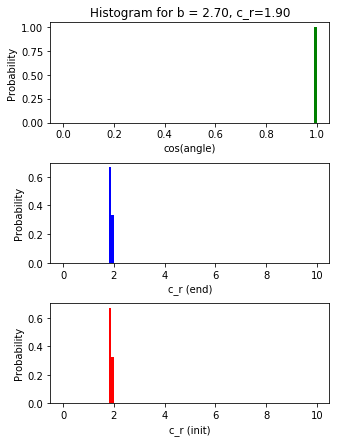

Init: 	 b = 2.70	 C_r = 1.8999999987439997
Angle:    MEAN = 0.9969470774938212 	 MEDIAN = 0.9969249067528674
Velocity: MEAN = 1.9000063586946632 	 MEDIAN = 1.8999983761845067
Pearson:
init - end : (-0.025098596198553886, 0.42788298731709584)
init - ang : (0.018912305914356144, 0.55026368544786997)
ang  - end : (0.014869621001250548, 0.63860041104952359)
__________________________________________________________________


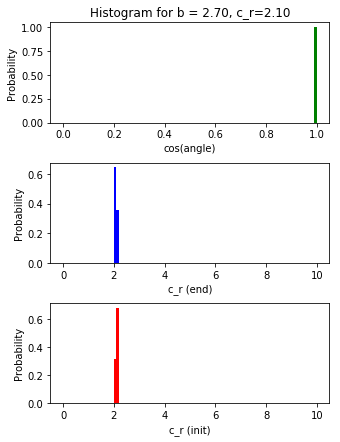

Init: 	 b = 2.70	 C_r = 2.0999999981273003
Angle:    MEAN = 0.9980309160409768 	 MEDIAN = 0.9980180707095532
Velocity: MEAN = 2.1000155111231833 	 MEDIAN = 2.099998483398803
Pearson:
init - end : (0.0095396510337996121, 0.76318589011289517)
init - ang : (0.047481624845785241, 0.13349290857267607)
ang  - end : (-0.060264286907097939, 0.056770681466403593)
__________________________________________________________________


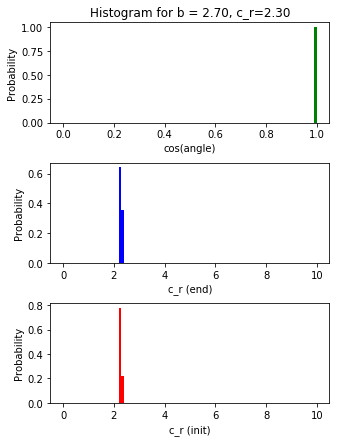

Init: 	 b = 2.70	 C_r = 2.3000000032899997
Angle:    MEAN = 0.9986662917040151 	 MEDIAN = 0.9986590241563529
Velocity: MEAN = 2.299995476131617 	 MEDIAN = 2.2999984549090566
Pearson:
init - end : (0.064616083681857853, 0.041060404274208831)
init - ang : (0.00050149949310535557, 0.98736285676182001)
ang  - end : (0.026274005789996131, 0.40656076482177084)
__________________________________________________________________


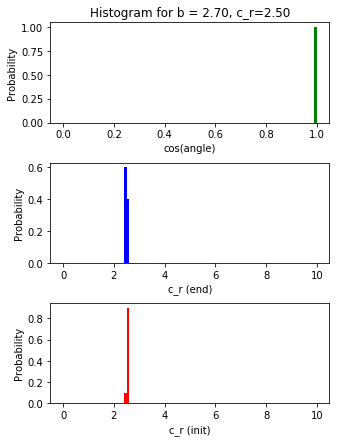

Init: 	 b = 2.70	 C_r = 2.5000000019365003
Angle:    MEAN = 0.9990618797871014 	 MEDIAN = 0.9990545419946939
Velocity: MEAN = 2.4999892343835364 	 MEDIAN = 2.499998648673042
Pearson:
init - end : (-0.025362048600116521, 0.42304819210779954)
init - ang : (0.068707683387730811, 0.029812089364557599)
ang  - end : (0.048753562257644913, 0.12338714095681633)
__________________________________________________________________


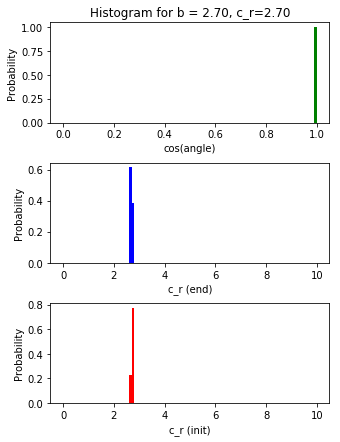

Init: 	 b = 2.70	 C_r = 2.700000000535
Angle:    MEAN = 0.9993197756194241 	 MEDIAN = 0.9993160683641777
Velocity: MEAN = 2.699990419140208 	 MEDIAN = 2.699998736368678
Pearson:
init - end : (-0.04333863266732025, 0.17086889076282341)
init - ang : (0.033860351657717114, 0.28474272156407915)
ang  - end : (0.0099231739345122805, 0.75396648713400305)
__________________________________________________________________


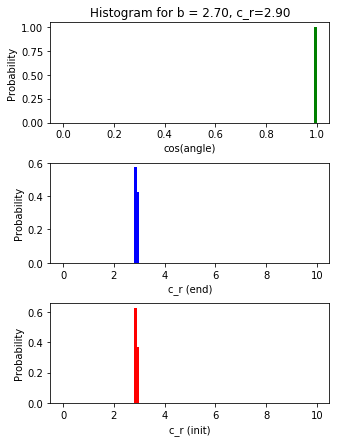

Init: 	 b = 2.70	 C_r = 2.899999999944999
Angle:    MEAN = 0.9994966170980786 	 MEDIAN = 0.9994936870045099
Velocity: MEAN = 2.8999830547992995 	 MEDIAN = 2.899998932036843
Pearson:
init - end : (0.01117298980408153, 0.7241708556941745)
init - ang : (-0.053714326476468531, 0.089564893468232473)
ang  - end : (0.077570740078736378, 0.014142163059831351)
__________________________________________________________________


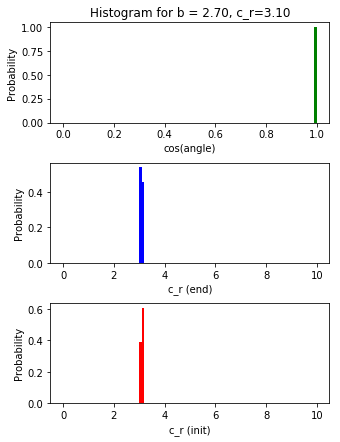

Init: 	 b = 2.70	 C_r = 3.1000000009215007
Angle:    MEAN = 0.9996181210398228 	 MEDIAN = 0.9996161846320402
Velocity: MEAN = 3.100000555369297 	 MEDIAN = 3.099999171842799
Pearson:
init - end : (3.2881199710223991e-05, 0.99917140151726969)
init - ang : (-0.018665945611984355, 0.55547083386498586)
ang  - end : (0.019767911396811146, 0.53236793757829659)
__________________________________________________________________


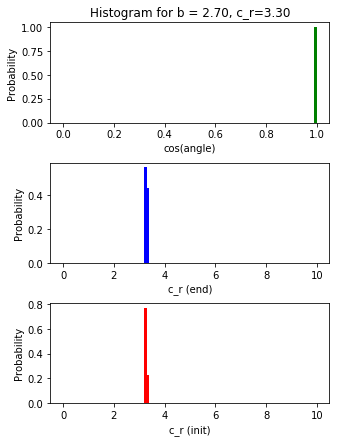

Init: 	 b = 2.70	 C_r = 3.300000001549999
Angle:    MEAN = 0.999705448184741 	 MEDIAN = 0.9997040046246386
Velocity: MEAN = 3.299995412444043 	 MEDIAN = 3.29999890262145
Pearson:
init - end : (-0.0086541035195027271, 0.78459984835054386)
init - ang : (-0.021602085778184132, 0.49502198469738834)
ang  - end : (0.055193011922111651, 0.081071386590583855)
__________________________________________________________________


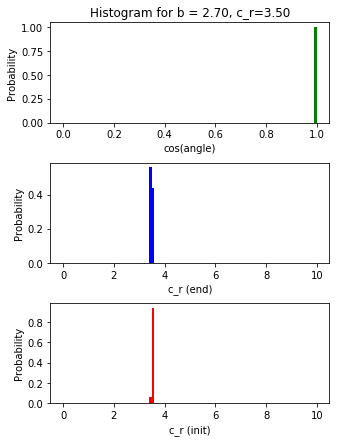

Init: 	 b = 2.70	 C_r = 3.4999999989050004
Angle:    MEAN = 0.999768768524044 	 MEDIAN = 0.9997675129553507
Velocity: MEAN = 3.499976917881075 	 MEDIAN = 3.4999986851306786
Pearson:
init - end : (0.020562090939313903, 0.51602441078459993)
init - ang : (-0.047049715078001479, 0.13706627246335865)
ang  - end : (0.024660159739326518, 0.43599983721648972)
__________________________________________________________________


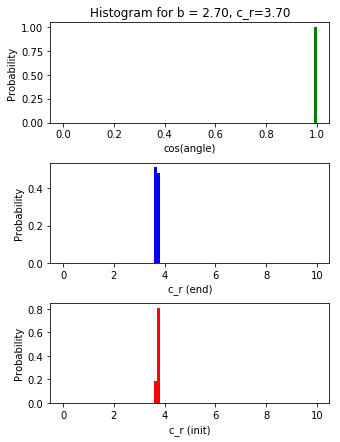

Init: 	 b = 2.70	 C_r = 3.699999998995001
Angle:    MEAN = 0.9998157793959342 	 MEDIAN = 0.9998148574565209
Velocity: MEAN = 3.6999936310161683 	 MEDIAN = 3.6999994537993492
Pearson:
init - end : (-0.017672979246776594, 0.5766987525543974)
init - ang : (-0.029798459283158735, 0.34653039822817144)
ang  - end : (0.0092727541017443762, 0.76962168945587661)
__________________________________________________________________


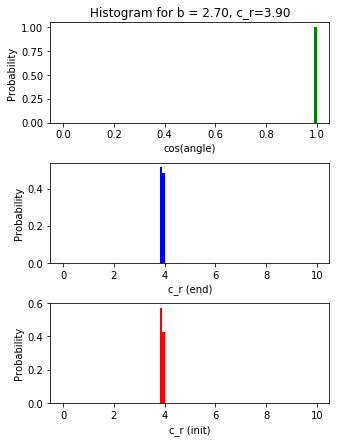

Init: 	 b = 2.70	 C_r = 3.900000000949999
Angle:    MEAN = 0.9998515701352206 	 MEDIAN = 0.9998508087497671
Velocity: MEAN = 3.9000073995978286 	 MEDIAN = 3.8999993677777636
Pearson:
init - end : (0.019975754148802833, 0.52806556651012126)
init - ang : (-0.023689752071032341, 0.45427693741445074)
ang  - end : (-0.069983144338654837, 0.026897152283595516)
__________________________________________________________________


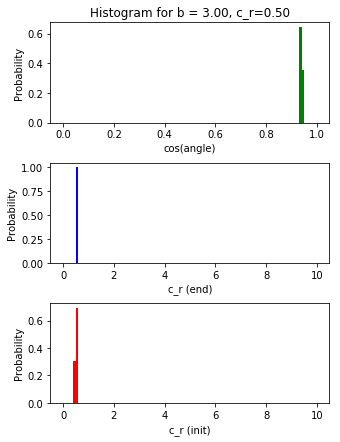

Init: 	 b = 3.00	 C_r = 0.5000000071868
Angle:    MEAN = 0.9395942829836255 	 MEDIAN = 0.9391263676888777
Velocity: MEAN = 0.5856807136123471 	 MEDIAN = 0.5861014768404669
Pearson:
init - end : (-0.038336361482835923, 0.2258068073148207)
init - ang : (0.02111095788746685, 0.50488299345979359)
ang  - end : (-0.94928913652418068, 0.0)
__________________________________________________________________


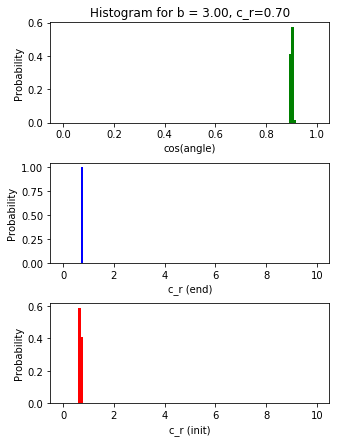

Init: 	 b = 3.00	 C_r = 0.6999999972102998
Angle:    MEAN = 0.901332575457644 	 MEDIAN = 0.900729103583028
Velocity: MEAN = 0.704169165299232 	 MEDIAN = 0.7041758168339596
Pearson:
init - end : (0.056245319788224453, 0.0754340675013737)
init - ang : (-0.044047852916322426, 0.16396818101219032)
ang  - end : (-0.65164694964092384, 6.2538727792987952e-122)
__________________________________________________________________


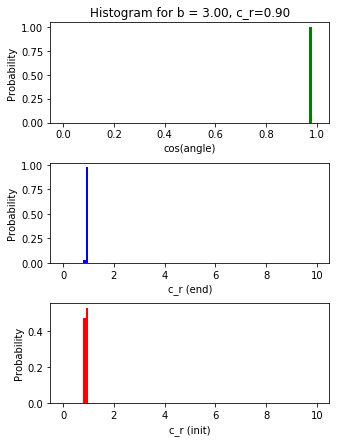

Init: 	 b = 3.00	 C_r = 0.9000000034265
Angle:    MEAN = 0.9771721166230197 	 MEDIAN = 0.97703170284743
Velocity: MEAN = 0.9000558854781461 	 MEDIAN = 0.9000506629187911
Pearson:
init - end : (0.033232488245421708, 0.29377367650150976)
init - ang : (0.012404401135872038, 0.69521628872064534)
ang  - end : (-0.058057867385137824, 0.066475639037563455)
__________________________________________________________________


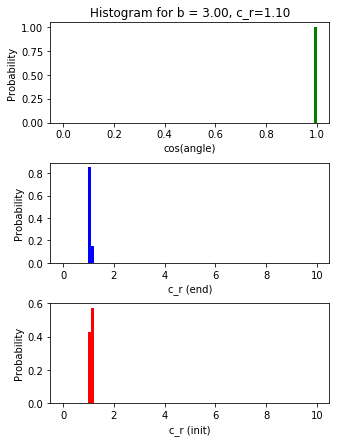

Init: 	 b = 3.00	 C_r = 1.0999999970209997
Angle:    MEAN = 0.9914993987363078 	 MEDIAN = 0.9914456939518066
Velocity: MEAN = 1.0999975843056908 	 MEDIAN = 1.0999977566310728
Pearson:
init - end : (-0.049157732545682974, 0.12030397091621552)
init - ang : (-0.019305361203470327, 0.5420059612029382)
ang  - end : (-0.024869618409042369, 0.43211108526110031)
__________________________________________________________________


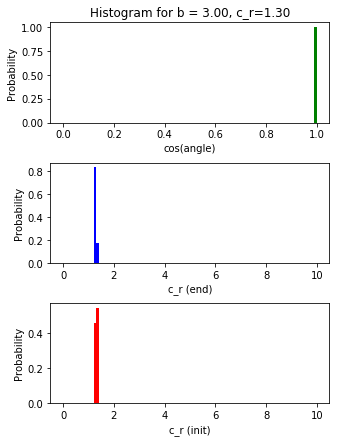

Init: 	 b = 3.00	 C_r = 1.2999999975987
Angle:    MEAN = 0.9960395687096034 	 MEDIAN = 0.9960253012386113
Velocity: MEAN = 1.2999963771870948 	 MEDIAN = 1.299998113957233
Pearson:
init - end : (-0.013617640878398164, 0.66711637996260365)
init - ang : (-0.0093285031426328692, 0.76827606270814985)
ang  - end : (-0.079122871725543026, 0.012318720946932402)
__________________________________________________________________


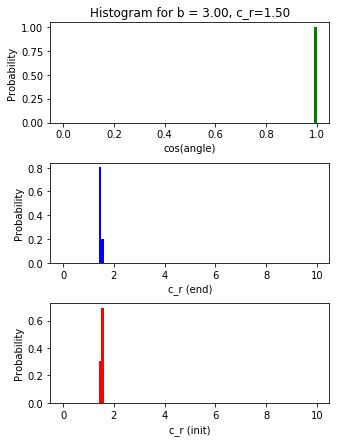

Init: 	 b = 3.00	 C_r = 1.499999999866
Angle:    MEAN = 0.9978861884094654 	 MEDIAN = 0.997874929157914
Velocity: MEAN = 1.4999994282529328 	 MEDIAN = 1.4999983267595773
Pearson:
init - end : (-0.029125027307291593, 0.3575427226272615)
init - ang : (-0.036901809873122381, 0.24366487698543143)
ang  - end : (-0.00080080962371401195, 0.97982193142407581)
__________________________________________________________________


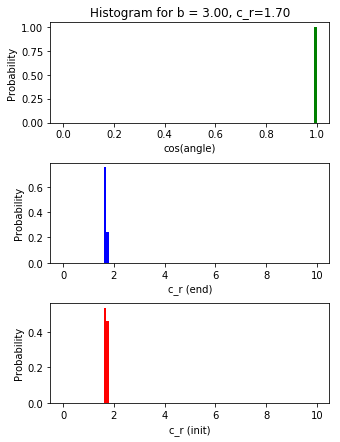

Init: 	 b = 3.00	 C_r = 1.7000000012869998
Angle:    MEAN = 0.9987667651475424 	 MEDIAN = 0.9987599234728826
Velocity: MEAN = 1.699995131672318 	 MEDIAN = 1.6999985488341371
Pearson:
init - end : (0.00273415761571804, 0.93118526923984746)
init - ang : (-0.054765755882388654, 0.083455620156999297)
ang  - end : (0.017679971537673474, 0.57654794346405858)
__________________________________________________________________


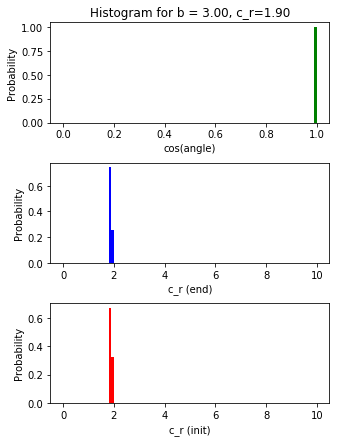

Init: 	 b = 3.00	 C_r = 1.9000000033639999
Angle:    MEAN = 0.9992281252096441 	 MEDIAN = 0.9992235480994675
Velocity: MEAN = 1.8999988490280324 	 MEDIAN = 1.8999986654403163
Pearson:
init - end : (0.019823037911851398, 0.53122508738274421)
init - ang : (0.053078950345379683, 0.0934277287942505)
ang  - end : (0.039778318285849698, 0.20881699823645405)
__________________________________________________________________


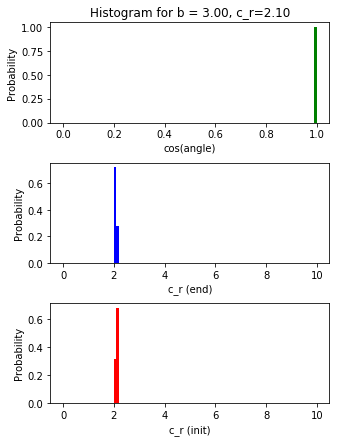

Init: 	 b = 3.00	 C_r = 2.0999999992800005
Angle:    MEAN = 0.9994921778952651 	 MEDIAN = 0.9994898842803285
Velocity: MEAN = 2.100004003902564 	 MEDIAN = 2.0999988143117405
Pearson:
init - end : (-7.3086579727849238e-06, 0.99981582349614739)
init - ang : (0.050356033687603836, 0.11151606621256299)
ang  - end : (-0.071486223853553452, 0.023780429107332669)
__________________________________________________________________


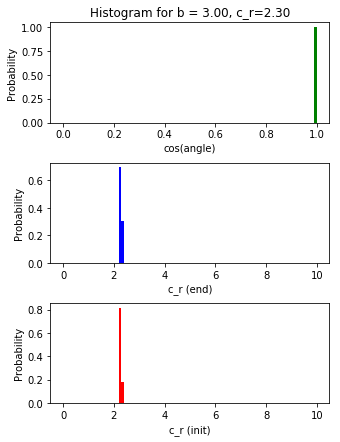

Init: 	 b = 3.00	 C_r = 2.2999999967664997
Angle:    MEAN = 0.9996518269994169 	 MEDIAN = 0.9996499589918622
Velocity: MEAN = 2.3000006642201143 	 MEDIAN = 2.299998936465843
Pearson:
init - end : (0.024453434971488219, 0.43985751124424588)
init - ang : (-0.037547127728611969, 0.23551264860726251)
ang  - end : (-0.022476065567012919, 0.47773121855621004)
__________________________________________________________________


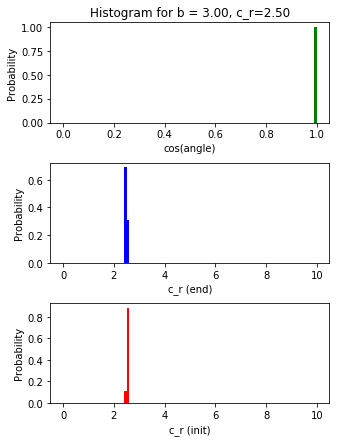

Init: 	 b = 3.00	 C_r = 2.5000000007159997
Angle:    MEAN = 0.9997532119232201 	 MEDIAN = 0.9997520350575575
Velocity: MEAN = 2.4999927990084654 	 MEDIAN = 2.499998993838499
Pearson:
init - end : (-0.031292041096521873, 0.32288547926766942)
init - ang : (-0.040044531050679844, 0.20578424902676806)
ang  - end : (0.0090984875626711793, 0.77383245080849783)
__________________________________________________________________


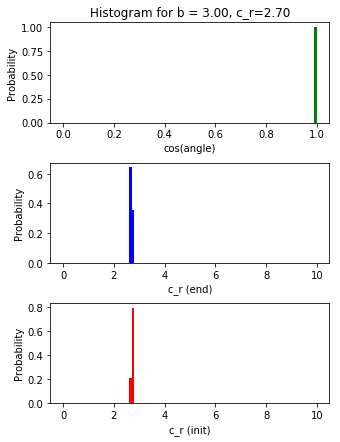

Init: 	 b = 3.00	 C_r = 2.7000000007205
Angle:    MEAN = 0.9998196106904254 	 MEDIAN = 0.9998187256659306
Velocity: MEAN = 2.699997026536842 	 MEDIAN = 2.699999152533291
Pearson:
init - end : (0.013681514571400984, 0.66564941524859655)
init - ang : (0.032744600293670767, 0.30092234031953652)
ang  - end : (0.085357203937976689, 0.0069175812221862441)
__________________________________________________________________


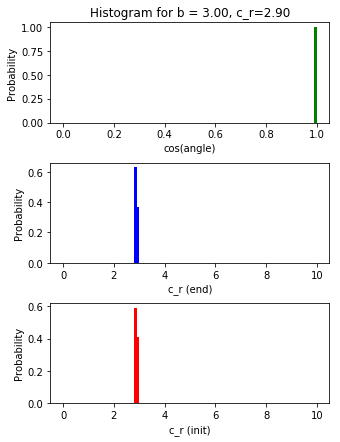

Init: 	 b = 3.00	 C_r = 2.9000000019235994
Angle:    MEAN = 0.9998655654993395 	 MEDIAN = 0.9998648877707801
Velocity: MEAN = 2.9000029247663055 	 MEDIAN = 2.8999991942251757
Pearson:
init - end : (-0.015720315137014142, 0.61952127626180564)
init - ang : (-0.087727139947829963, 0.0055022105394521943)
ang  - end : (0.0033100508781577572, 0.91673894664372213)
__________________________________________________________________


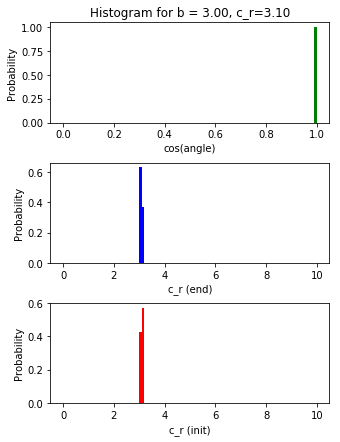

Init: 	 b = 3.00	 C_r = 3.1000000011990005
Angle:    MEAN = 0.9998976188805464 	 MEDIAN = 0.9998970472029769
Velocity: MEAN = 3.0999986141529785 	 MEDIAN = 3.0999991746502635
Pearson:
init - end : (0.033533555723913762, 0.28941956471860431)
init - ang : (0.048399931152626433, 0.12613499814799836)
ang  - end : (-0.054618269366959703, 0.084291692622928849)
__________________________________________________________________


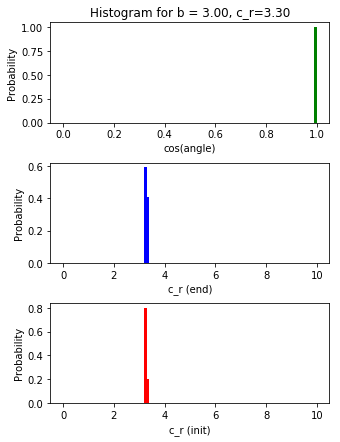

Init: 	 b = 3.00	 C_r = 3.2999999975749987
Angle:    MEAN = 0.9999203756549319 	 MEDIAN = 0.9999199548287387
Velocity: MEAN = 3.299996916368462 	 MEDIAN = 3.2999992623038494
Pearson:
init - end : (0.0057641316180255453, 0.85554240390316194)
init - ang : (-0.019096863147199574, 0.54637861559956047)
ang  - end : (0.020588589492799944, 0.51548360801175974)
__________________________________________________________________


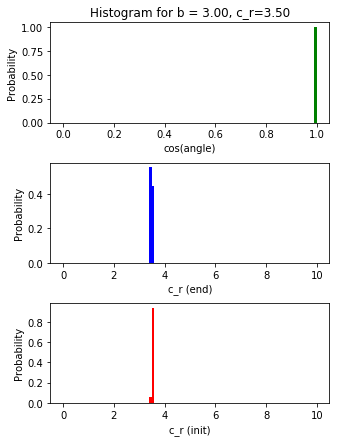

Init: 	 b = 3.00	 C_r = 3.5000000006299996
Angle:    MEAN = 0.9999374213744445 	 MEDIAN = 0.9999371411584588
Velocity: MEAN = 3.5000035214697136 	 MEDIAN = 3.499999434997599
Pearson:
init - end : (0.017754500725479461, 0.57494165982646828)
init - ang : (0.019934269503643843, 0.5289228886728865)
ang  - end : (0.016739044536332442, 0.59700659891646091)
__________________________________________________________________


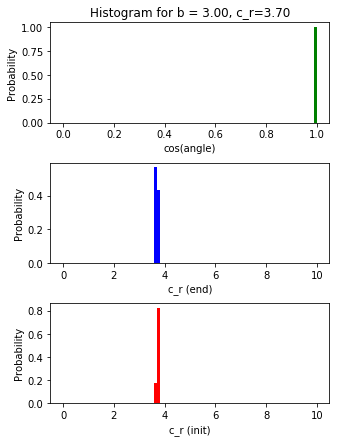

Init: 	 b = 3.00	 C_r = 3.700000000025001
Angle:    MEAN = 0.9999500729741639 	 MEDIAN = 0.999949842336862
Velocity: MEAN = 3.6999952369743334 	 MEDIAN = 3.6999991781201764
Pearson:
init - end : (0.011131989794530962, 0.72514198819045828)
init - ang : (0.017484866099665878, 0.58076291267557623)
ang  - end : (0.0062197682435416544, 0.84426403574119491)
__________________________________________________________________


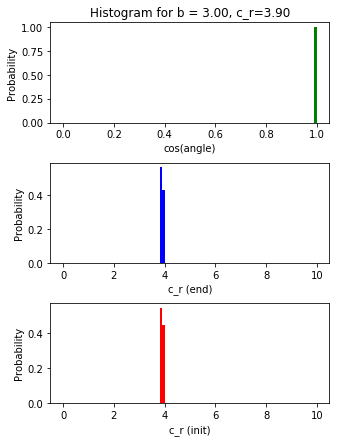

Init: 	 b = 3.00	 C_r = 3.9000000001499995
Angle:    MEAN = 0.9999595979842725 	 MEDIAN = 0.9999593761382936
Velocity: MEAN = 3.8999995912198013 	 MEDIAN = 3.8999993212642576
Pearson:
init - end : (-0.018971196028401468, 0.54902252945217001)
init - ang : (-0.013352189990406514, 0.67322646647901352)
ang  - end : (-0.037460210232209731, 0.23659929513872671)
__________________________________________________________________


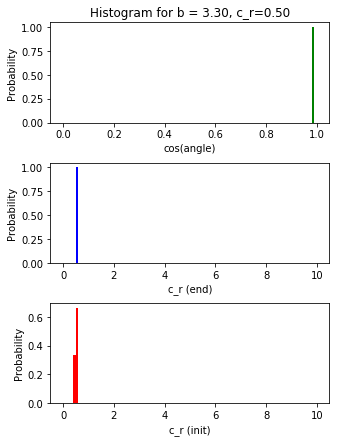

Init: 	 b = 3.30	 C_r = 0.49999999692299996
Angle:    MEAN = 0.9850113108130514 	 MEDIAN = 0.9848941272758439
Velocity: MEAN = 0.5351904671821072 	 MEDIAN = 0.5353184230603244
Pearson:
init - end : (0.0014983018827945515, 0.96225720586120733)
init - ang : (0.0073594507070066225, 0.81619757479752497)
ang  - end : (-0.91767017467912326, 0.0)
__________________________________________________________________


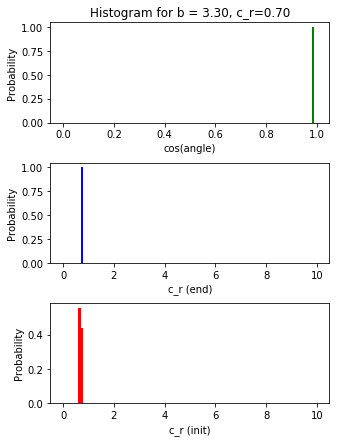

Init: 	 b = 3.30	 C_r = 0.7000000056274999
Angle:    MEAN = 0.9816117349006167 	 MEDIAN = 0.981512553895461
Velocity: MEAN = 0.7018614831552489 	 MEDIAN = 0.7018621993917583
Pearson:
init - end : (-0.0051484931116435742, 0.87082779959193291)
init - ang : (0.043499861738850808, 0.16928136691057546)
ang  - end : (-0.334719511933116, 1.3280409384081128e-27)
__________________________________________________________________


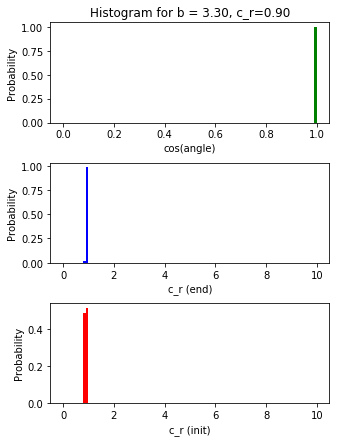

Init: 	 b = 3.30	 C_r = 0.900000000397
Angle:    MEAN = 0.9943650301783473 	 MEDIAN = 0.9943334950083531
Velocity: MEAN = 0.9000376560615143 	 MEDIAN = 0.9000377973232125
Pearson:
init - end : (0.020465405501739538, 0.51800013034315495)
init - ang : (-0.020208137006906195, 0.5232762482725769)
ang  - end : (-0.065869677694900333, 0.037284143638457022)
__________________________________________________________________


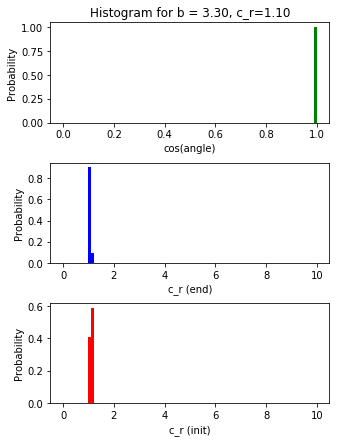

Init: 	 b = 3.30	 C_r = 1.1000000068459002
Angle:    MEAN = 0.9976928188320581 	 MEDIAN = 0.9976824038723933
Velocity: MEAN = 1.1000002677144525 	 MEDIAN = 1.0999983224411398
Pearson:
init - end : (-0.0067307861136503815, 0.8316527451241803)
init - ang : (-0.0057261851892211821, 0.8564830551427387)
ang  - end : (-0.066498783995069685, 0.035503048878595164)
__________________________________________________________________


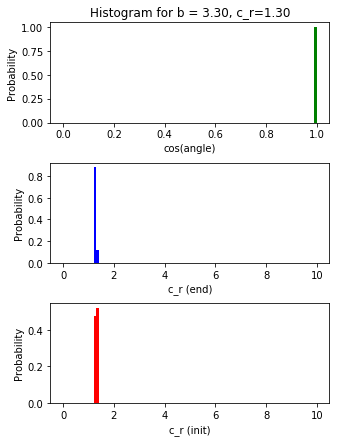

Init: 	 b = 3.30	 C_r = 1.2999999930622501
Angle:    MEAN = 0.9988717240992605 	 MEDIAN = 0.9988665987346389
Velocity: MEAN = 1.2999979665110768 	 MEDIAN = 1.299998512486719
Pearson:
init - end : (0.018266135106001301, 0.56397215454730243)
init - ang : (0.010914333436652796, 0.73030479069624987)
ang  - end : (0.038707547087776781, 0.22134196901580802)
__________________________________________________________________


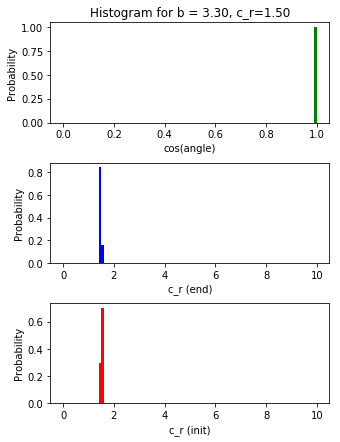

Init: 	 b = 3.30	 C_r = 1.4999999987525
Angle:    MEAN = 0.9993819616695665 	 MEDIAN = 0.9993791624861375
Velocity: MEAN = 1.4999988817619312 	 MEDIAN = 1.499998737308475
Pearson:
init - end : (0.0051306735339673509, 0.87127098024988658)
init - ang : (-0.036864862926211467, 0.24413754208531793)
ang  - end : (0.034378625676997468, 0.27743079943026328)
__________________________________________________________________


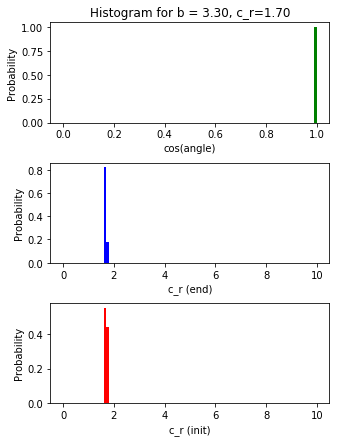

Init: 	 b = 3.30	 C_r = 1.7000000005594997
Angle:    MEAN = 0.9996326422744712 	 MEDIAN = 0.9996309141902667
Velocity: MEAN = 1.6999994337551716 	 MEDIAN = 1.699998937024189
Pearson:
init - end : (0.044792948273626489, 0.15694649328046908)
init - ang : (-0.056918816971661193, 0.071996772265209841)
ang  - end : (0.036097897740918317, 0.25409481907217241)
__________________________________________________________________


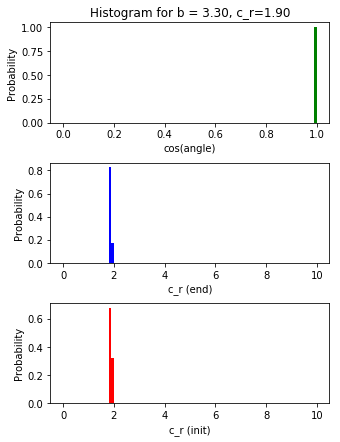

Init: 	 b = 3.30	 C_r = 1.9000000030512496
Angle:    MEAN = 0.9997679259759095 	 MEDIAN = 0.9997669304687657
Velocity: MEAN = 1.8999988904022558 	 MEDIAN = 1.8999990340477633
Pearson:
init - end : (0.0022061082702409052, 0.94445146537966851)
init - ang : (-0.080953788971842466, 0.01043755538906267)
ang  - end : (0.01299168234182606, 0.68155908509924101)
__________________________________________________________________


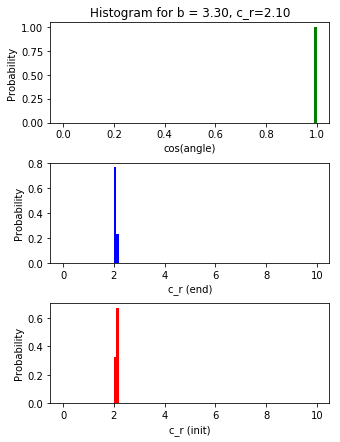

Init: 	 b = 3.30	 C_r = 2.0999999978160004
Angle:    MEAN = 0.9998458745884972 	 MEDIAN = 0.999845269896825
Velocity: MEAN = 2.0999991325099057 	 MEDIAN = 2.099999111628513
Pearson:
init - end : (-0.018107416865861373, 0.56736430550061212)
init - ang : (0.0043100739430050527, 0.89172114495419941)
ang  - end : (-0.072615443525574669, 0.0216494707066366)
__________________________________________________________________


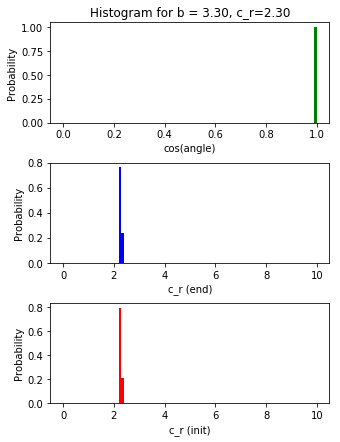

Init: 	 b = 3.30	 C_r = 2.299999997584
Angle:    MEAN = 0.9998936673350198 	 MEDIAN = 0.9998932034995158
Velocity: MEAN = 2.299998283210298 	 MEDIAN = 2.299999166578414
Pearson:
init - end : (-0.012717844150743696, 0.68791455290233827)
init - ang : (0.016016969686124951, 0.61292684183602897)
ang  - end : (0.048777853455061707, 0.12320011498394837)
__________________________________________________________________


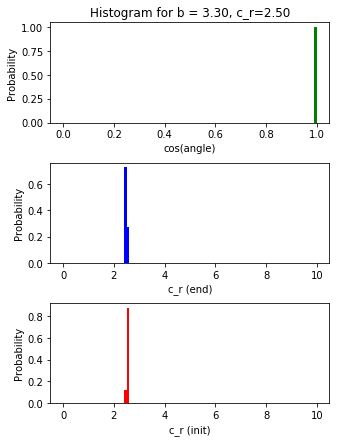

Init: 	 b = 3.30	 C_r = 2.4999999995355
Angle:    MEAN = 0.9999243488872246 	 MEDIAN = 0.9999240123777118
Velocity: MEAN = 2.4999980260868107 	 MEDIAN = 2.499999304053339
Pearson:
init - end : (0.00073718883165532691, 0.98142468827420704)
init - ang : (0.018815483027500475, 0.55230729892464914)
ang  - end : (0.028363817902004654, 0.37025216486032575)
__________________________________________________________________


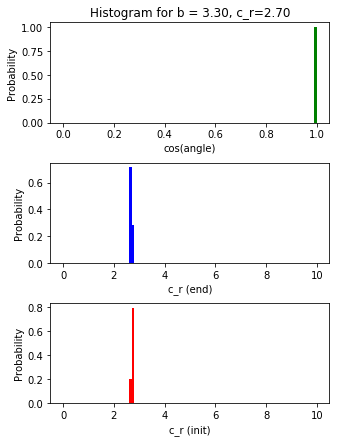

Init: 	 b = 3.30	 C_r = 2.699999997845
Angle:    MEAN = 0.9999445672593521 	 MEDIAN = 0.99994436939478
Velocity: MEAN = 2.6999997949848575 	 MEDIAN = 2.699999280789238
Pearson:
init - end : (-0.026815280683172887, 0.39695868573063753)
init - ang : (0.01663374958475889, 0.59931640664820174)
ang  - end : (-0.033662213794026161, 0.28757218357205733)
__________________________________________________________________


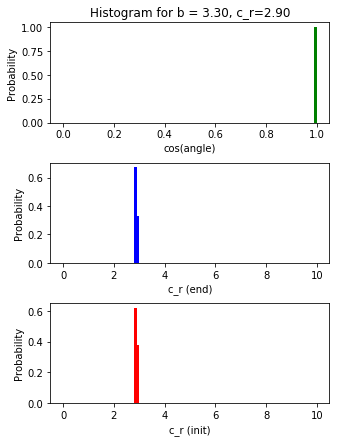

Init: 	 b = 3.30	 C_r = 2.9000000000949995
Angle:    MEAN = 0.9999584685292644 	 MEDIAN = 0.9999583339537432
Velocity: MEAN = 2.9000000399197416 	 MEDIAN = 2.89999941921796
Pearson:
init - end : (-0.0082401201085313593, 0.79466786157446745)
init - ang : (-0.013364670199436714, 0.67293871303127895)
ang  - end : (0.11810049815730198, 0.00018176299511216739)
__________________________________________________________________


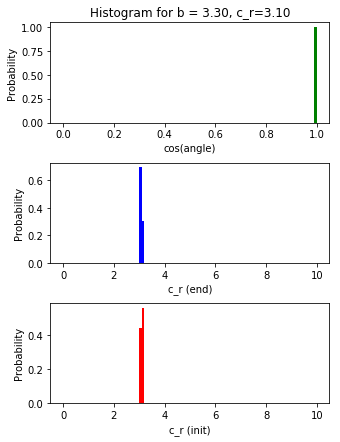

Init: 	 b = 3.30	 C_r = 3.1000000007300006
Angle:    MEAN = 0.9999682855397962 	 MEDIAN = 0.9999681669765632
Velocity: MEAN = 3.100000443452004 	 MEDIAN = 3.0999993777974453
Pearson:
init - end : (0.026488580780796224, 0.40273781181123203)
init - ang : (-0.032548988053895403, 0.30382073179595886)
ang  - end : (-0.089002304857313488, 0.0048539303033800401)
__________________________________________________________________


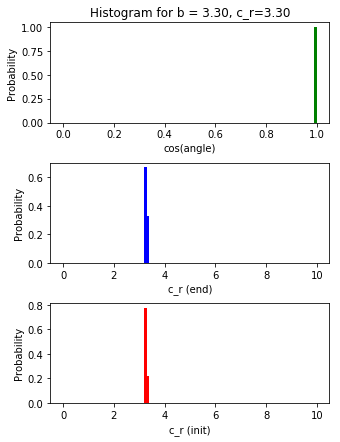

Init: 	 b = 3.30	 C_r = 3.300000001684999
Angle:    MEAN = 0.999975376052777 	 MEDIAN = 0.999975292344476
Velocity: MEAN = 3.2999980724064644 	 MEDIAN = 3.2999994085209936
Pearson:
init - end : (0.049825132535213632, 0.11534500481673712)
init - ang : (0.088255057120390362, 0.0052249057509215525)
ang  - end : (-0.073130068276013371, 0.020734698555773513)
__________________________________________________________________


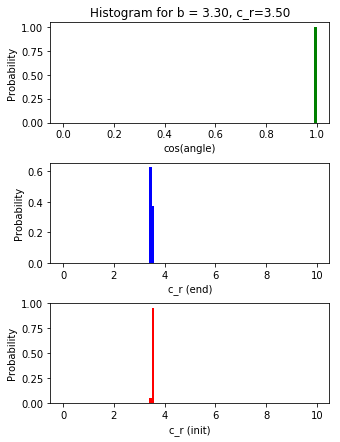

Init: 	 b = 3.30	 C_r = 3.499999997889
Angle:    MEAN = 0.9999805920573471 	 MEDIAN = 0.9999805131709718
Velocity: MEAN = 3.5000027002996537 	 MEDIAN = 3.49999949483
Pearson:
init - end : (-0.0026352199900431172, 0.93366954043547723)
init - ang : (0.013174004765771536, 0.67734003643016227)
ang  - end : (0.032781279337982284, 0.30038092050083942)
__________________________________________________________________


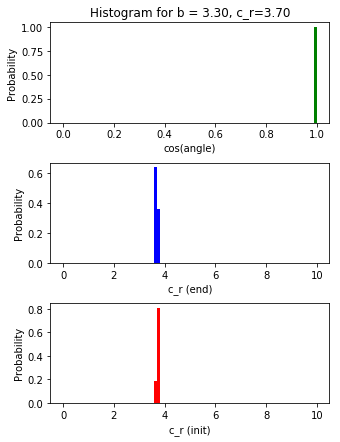

Init: 	 b = 3.30	 C_r = 3.700000001145001
Angle:    MEAN = 0.999984451396027 	 MEDIAN = 0.9999843917698292
Velocity: MEAN = 3.6999992399237445 	 MEDIAN = 3.699999532320792
Pearson:
init - end : (0.0019391531416277084, 0.95116427668252523)
init - ang : (0.02339067321705212, 0.45999566362891564)
ang  - end : (0.010537548536797139, 0.73927090724901623)
__________________________________________________________________


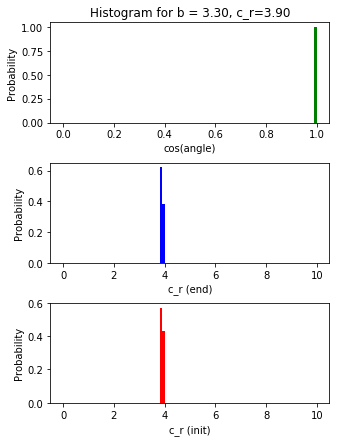

Init: 	 b = 3.30	 C_r = 3.900000000249999
Angle:    MEAN = 0.999987429181074 	 MEDIAN = 0.9999873860273099
Velocity: MEAN = 3.9000002420320885 	 MEDIAN = 3.8999994781120666
Pearson:
init - end : (0.046198465160311911, 0.14432414516837344)
init - ang : (0.017482382303272259, 0.58081666422559775)
ang  - end : (-0.016856079306085545, 0.59444401623460774)
__________________________________________________________________


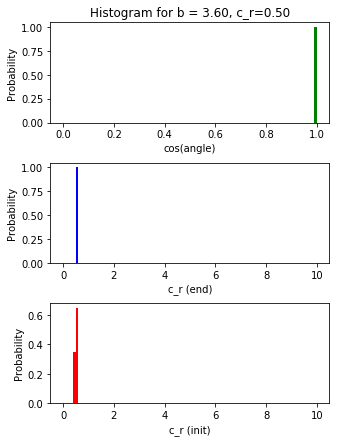

Init: 	 b = 3.60	 C_r = 0.5000000008465
Angle:    MEAN = 0.995350401604356 	 MEDIAN = 0.995326890541425
Velocity: MEAN = 0.5180577527611593 	 MEDIAN = 0.5181043550567813
Pearson:
init - end : (0.0012753473599151376, 0.96787021783132021)
init - ang : (-0.0057198133437006641, 0.8566410263539187)
ang  - end : (-0.88662173476383388, 0.0)
__________________________________________________________________


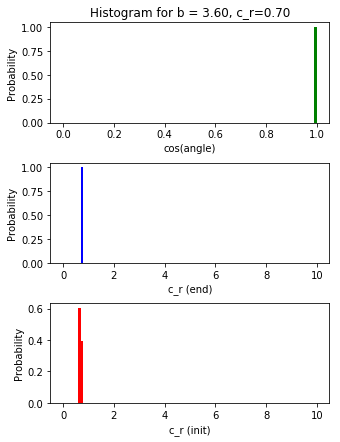

Init: 	 b = 3.60	 C_r = 0.70000000165905
Angle:    MEAN = 0.994817699187061 	 MEDIAN = 0.9947944196109353
Velocity: MEAN = 0.7012007196712379 	 MEDIAN = 0.7012021757127983
Pearson:
init - end : (0.0095414635295589818, 0.76314223988878938)
init - ang : (0.02244467691414908, 0.47834644636963708)
ang  - end : (-0.19311070143263001, 7.4087638871486736e-10)
__________________________________________________________________


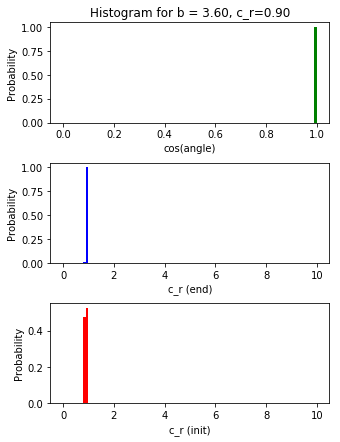

Init: 	 b = 3.60	 C_r = 0.8999999990415549
Angle:    MEAN = 0.9982441719329312 	 MEDIAN = 0.998236607149285
Velocity: MEAN = 0.9000313362558076 	 MEDIAN = 0.9000311924163256
Pearson:
init - end : (-0.0075652438286298593, 0.8111534884686229)
init - ang : (-0.05751572000916455, 0.069058467150725583)
ang  - end : (-0.03162761660260386, 0.31772101497505467)
__________________________________________________________________


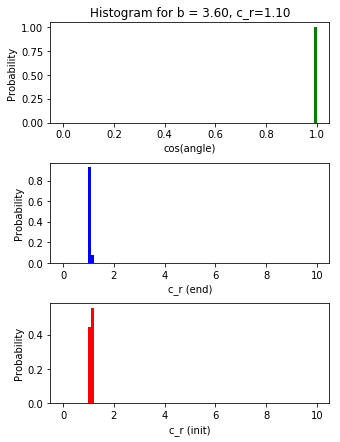

Init: 	 b = 3.60	 C_r = 1.0999999937273501
Angle:    MEAN = 0.9992507365387556 	 MEDIAN = 0.9992483428586676
Velocity: MEAN = 1.0999987375831695 	 MEDIAN = 1.0999988805796224
Pearson:
init - end : (0.032800289284899496, 0.30010056967468446)
init - ang : (0.052688725550993902, 0.095865552812302218)
ang  - end : (0.096108994685535423, 0.0023463940062499319)
__________________________________________________________________


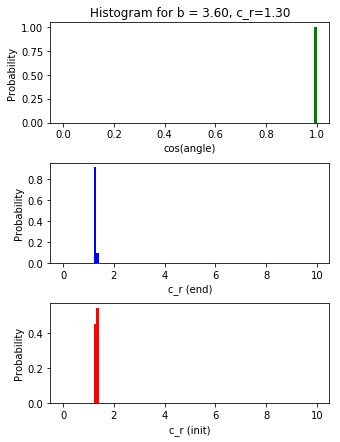

Init: 	 b = 3.60	 C_r = 1.2999999997259502
Angle:    MEAN = 0.9996263237760874 	 MEDIAN = 0.9996248746945969
Velocity: MEAN = 1.299999554778255 	 MEDIAN = 1.299999077611276
Pearson:
init - end : (0.010876203688452659, 0.73121049236472435)
init - ang : (0.015517154644262609, 0.62405514276875063)
ang  - end : (-0.05296868118855539, 0.094111517201897782)
__________________________________________________________________


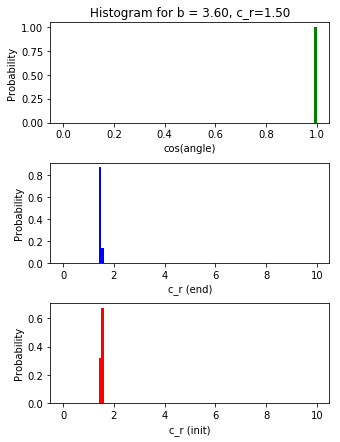

Init: 	 b = 3.60	 C_r = 1.4999999968835
Angle:    MEAN = 0.9997928286387355 	 MEDIAN = 0.999792063782896
Velocity: MEAN = 1.5000005878583147 	 MEDIAN = 1.499999179271558
Pearson:
init - end : (0.0064857670392473457, 0.83769432404504296)
init - ang : (-0.058420048881735465, 0.064794851621441329)
ang  - end : (0.020937137988757147, 0.50839760345204532)
__________________________________________________________________


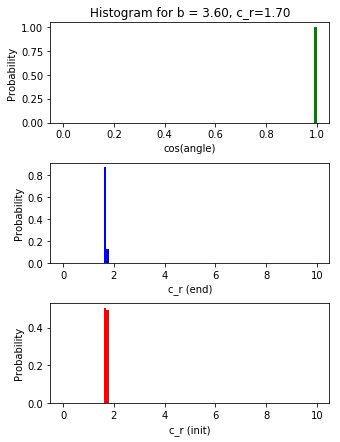

Init: 	 b = 3.60	 C_r = 1.7000000043574999
Angle:    MEAN = 0.9998756305559998 	 MEDIAN = 0.999875123818434
Velocity: MEAN = 1.6999986819635338 	 MEDIAN = 1.6999992909634365
Pearson:
init - end : (-0.031675957546870186, 0.31698153332397572)
init - ang : (0.027679957176692561, 0.38190597626828848)
ang  - end : (0.011767895890105382, 0.71013038962459052)
__________________________________________________________________


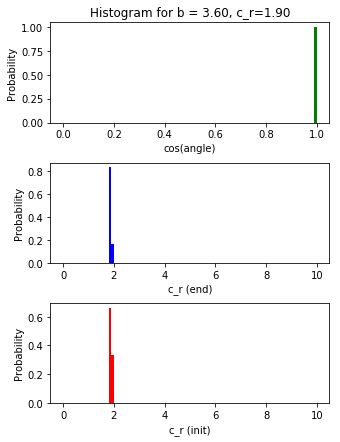

Init: 	 b = 3.60	 C_r = 1.9000000033764997
Angle:    MEAN = 0.9999209838011015 	 MEDIAN = 0.999920695582649
Velocity: MEAN = 1.8999997007670064 	 MEDIAN = 1.899999359151252
Pearson:
init - end : (0.041300109479005004, 0.19191074187054061)
init - ang : (-0.0070321865355578439, 0.824234575664192)
ang  - end : (-0.080036027518415195, 0.011345978042890619)
__________________________________________________________________


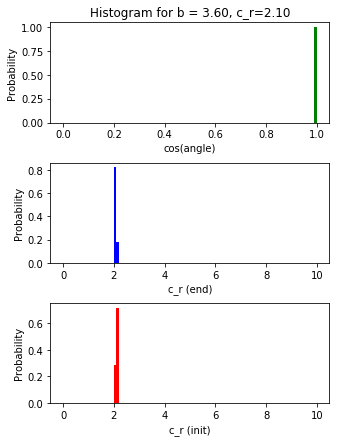

Init: 	 b = 3.60	 C_r = 2.1000000047276
Angle:    MEAN = 0.9999473342475398 	 MEDIAN = 0.9999471140201045
Velocity: MEAN = 2.099999362563326 	 MEDIAN = 2.0999993718417187
Pearson:
init - end : (-0.0091033925969537938, 0.77371384004256594)
init - ang : (0.022171392916073215, 0.48372112552084445)
ang  - end : (-0.013361207840376671, 0.67301853909597309)
__________________________________________________________________


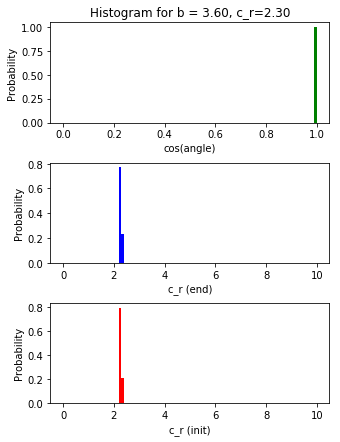

Init: 	 b = 3.60	 C_r = 2.3000000018869997
Angle:    MEAN = 0.9999635441111057 	 MEDIAN = 0.9999634167889639
Velocity: MEAN = 2.300000799254836 	 MEDIAN = 2.2999994559891377
Pearson:
init - end : (0.0048337768300593413, 0.8786607636561673)
init - ang : (-0.00580104573034487, 0.85462753929248048)
ang  - end : (-0.083824034806630435, 0.0079992352527580041)
__________________________________________________________________


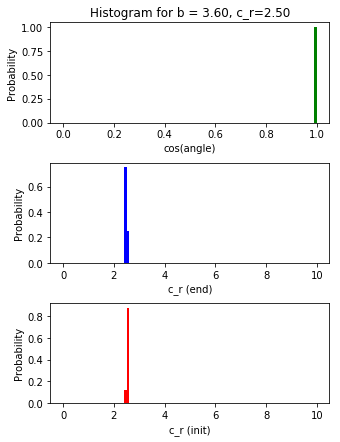

Init: 	 b = 3.60	 C_r = 2.4999999984850003
Angle:    MEAN = 0.9999739842137383 	 MEDIAN = 0.9999739019205123
Velocity: MEAN = 2.499999412903175 	 MEDIAN = 2.4999994900611417
Pearson:
init - end : (-0.014658963551459349, 0.6433627712616159)
init - ang : (-0.023934956585696818, 0.44961835643424575)
ang  - end : (0.024588594945735339, 0.4373330928785566)
__________________________________________________________________


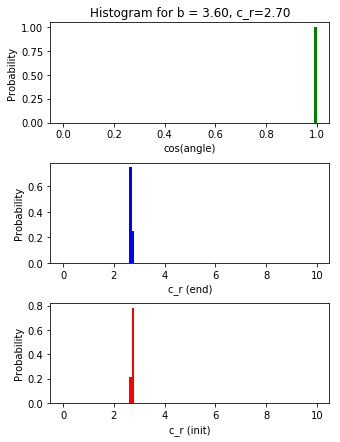

Init: 	 b = 3.60	 C_r = 2.6999999980210005
Angle:    MEAN = 0.9999809128465338 	 MEDIAN = 0.9999808406625248
Velocity: MEAN = 2.6999996960131853 	 MEDIAN = 2.699999546369711
Pearson:
init - end : (0.0023220980314050564, 0.94153600414412142)
init - ang : (-0.038696404852964009, 0.22147506793813435)
ang  - end : (0.020116914145527662, 0.52515365798171409)
__________________________________________________________________


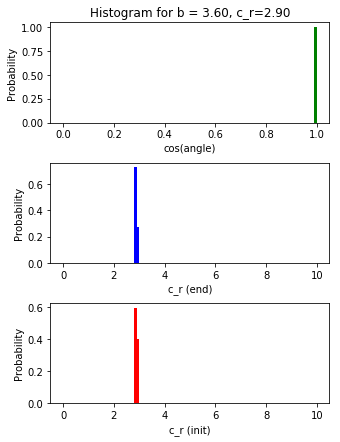

Init: 	 b = 3.60	 C_r = 2.9000000011799996
Angle:    MEAN = 0.9999856942238277 	 MEDIAN = 0.9999856387186405
Velocity: MEAN = 2.8999997694845576 	 MEDIAN = 2.8999995746452987
Pearson:
init - end : (0.01570103266526449, 0.61995098047591557)
init - ang : (0.030806630217692428, 0.33045205591169369)
ang  - end : (-0.038418321408583977, 0.22481546475752465)
__________________________________________________________________


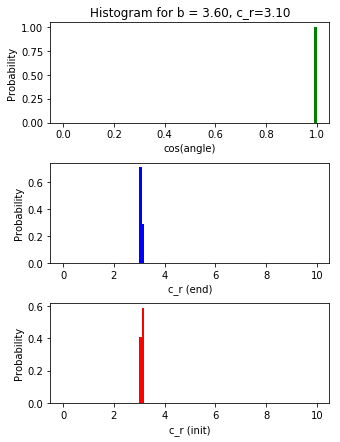

Init: 	 b = 3.60	 C_r = 3.0999999998600005
Angle:    MEAN = 0.9999890616000998 	 MEDIAN = 0.9999890290598711
Velocity: MEAN = 3.0999986559411012 	 MEDIAN = 3.09999953759121
Pearson:
init - end : (0.0095235412642732421, 0.76357389372552431)
init - ang : (-0.010400794735238772, 0.74253400016384907)
ang  - end : (-0.027544833208653023, 0.38423495496337667)
__________________________________________________________________


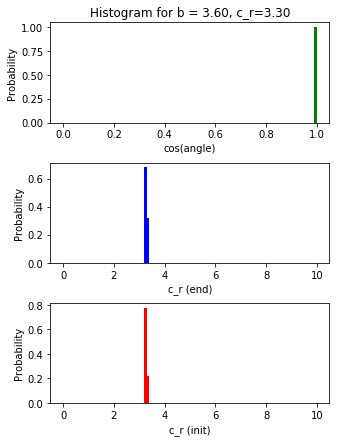

Init: 	 b = 3.60	 C_r = 3.300000000349999
Angle:    MEAN = 0.9999914955821555 	 MEDIAN = 0.9999914672076611
Velocity: MEAN = 3.29999966221341 	 MEDIAN = 3.2999995909792093
Pearson:
init - end : (0.073887687017775192, 0.019449262466793814)
init - ang : (-0.0026440444598050091, 0.93344793612805033)
ang  - end : (0.038524231719837883, 0.22353903505877348)
__________________________________________________________________


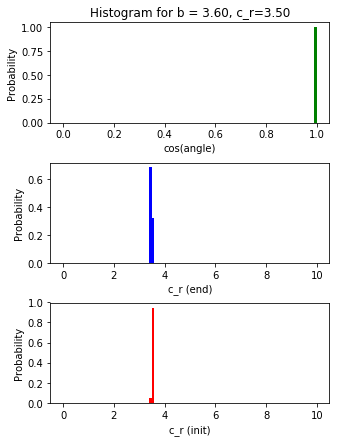

Init: 	 b = 3.60	 C_r = 3.4999999993600004
Angle:    MEAN = 0.9999932837157476 	 MEDIAN = 0.9999932593241734
Velocity: MEAN = 3.49999859913262 	 MEDIAN = 3.499999651193548
Pearson:
init - end : (-0.0098630216407385486, 0.7554101963055575)
init - ang : (0.016356174701758167, 0.60542472655270774)
ang  - end : (-0.0084993040254841348, 0.78836043558580615)
__________________________________________________________________


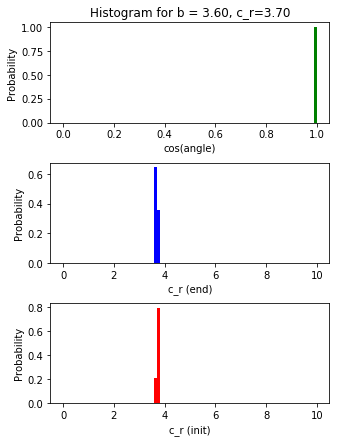

Init: 	 b = 3.60	 C_r = 3.699999999425001
Angle:    MEAN = 0.9999946288331779 	 MEDIAN = 0.9999946106696415
Velocity: MEAN = 3.6999997728215166 	 MEDIAN = 3.699999717605265
Pearson:
init - end : (-0.0070066516359847111, 0.8248624516699461)
init - ang : (-0.0024344907483673872, 0.93871170205382803)
ang  - end : (-0.048074073929532529, 0.12870895376728211)
__________________________________________________________________


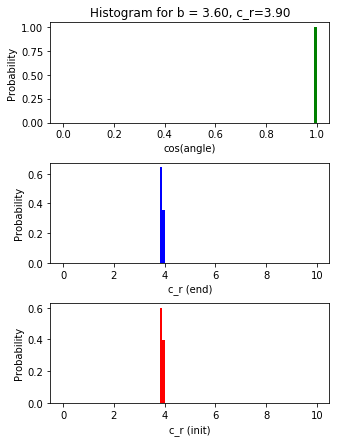

Init: 	 b = 3.60	 C_r = 3.9000000005349995
Angle:    MEAN = 0.9999956531267462 	 MEDIAN = 0.9999956395070558
Velocity: MEAN = 3.8999990825842077 	 MEDIAN = 3.8999997052778204
Pearson:
init - end : (-0.020090212068000639, 0.52570384988820285)
init - ang : (-0.025338115467654528, 0.42348608205681793)
ang  - end : (-0.0043022798463851286, 0.89191574897025627)
__________________________________________________________________


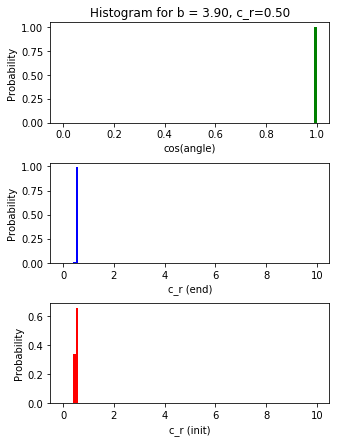

Init: 	 b = 3.90	 C_r = 0.49999999889205005
Angle:    MEAN = 0.9984037987576387 	 MEDIAN = 0.998335780515601
Velocity: MEAN = 0.5099565314821904 	 MEDIAN = 0.5103684657332044
Pearson:
init - end : (0.019403950900432364, 0.53994440957853373)
init - ang : (-0.019276798936252344, 0.54260394173308257)
ang  - end : (-0.99858436293308672, 0.0)
__________________________________________________________________


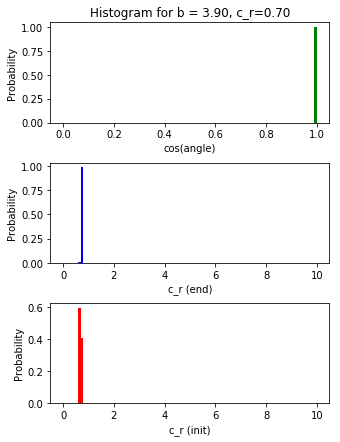

Init: 	 b = 3.90	 C_r = 0.699999993188
Angle:    MEAN = 0.998283157444327 	 MEDIAN = 0.9982295843017601
Velocity: MEAN = 0.700840038521128 	 MEDIAN = 0.7008643274314738
Pearson:
init - end : (-0.0029677282504785695, 0.92532313291855561)
init - ang : (0.0010972363799759011, 0.97235542281838971)
ang  - end : (-0.99524151572588915, 0.0)
__________________________________________________________________


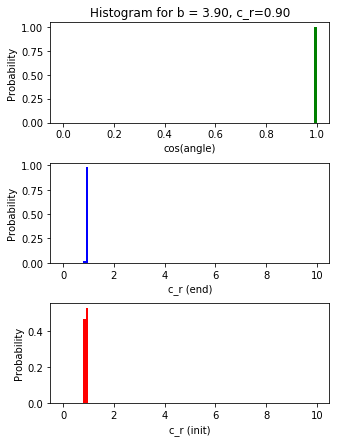

Init: 	 b = 3.90	 C_r = 0.9000000030035
Angle:    MEAN = 0.9993867227374115 	 MEDIAN = 0.9993694121009611
Velocity: MEAN = 0.9000260445939368 	 MEDIAN = 0.9000267428263937
Pearson:
init - end : (-0.010126243953681538, 0.74909898991657087)
init - ang : (-0.00074271865033061918, 0.98128537611729272)
ang  - end : (-0.26039247893731432, 5.819861261266682e-17)
__________________________________________________________________


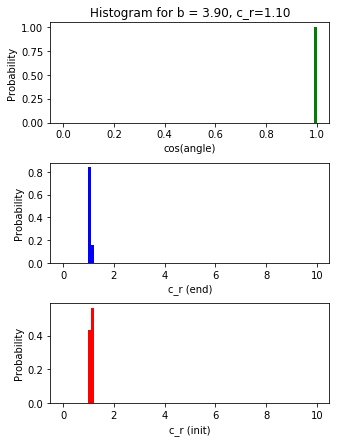

Init: 	 b = 3.90	 C_r = 1.100000005349
Angle:    MEAN = 0.9997300454927286 	 MEDIAN = 0.9997250692179351
Velocity: MEAN = 1.0999996040421212 	 MEDIAN = 1.099999530083012
Pearson:
init - end : (0.010301367060013311, 0.74490935927273627)
init - ang : (0.096091904165721623, 0.0023506350616322108)
ang  - end : (0.0034411444573842938, 0.91345411420980915)
__________________________________________________________________


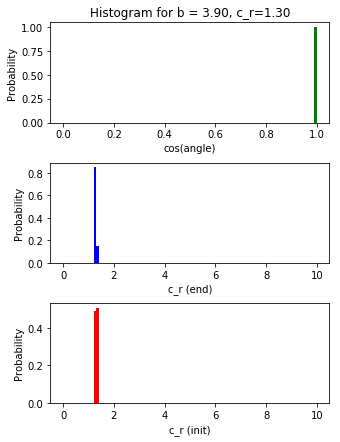

Init: 	 b = 3.90	 C_r = 1.2999999942099998
Angle:    MEAN = 0.9998650628899213 	 MEDIAN = 0.9998616260038962
Velocity: MEAN = 1.2999996210983764 	 MEDIAN = 1.2999995595465788
Pearson:
init - end : (0.0028289342854335019, 0.92880610474147995)
init - ang : (0.047505412091006984, 0.13329821835576122)
ang  - end : (0.016713727259822952, 0.59756160321123564)
__________________________________________________________________


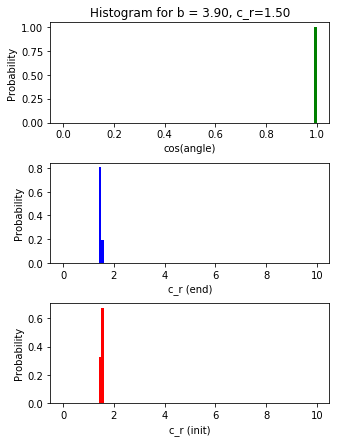

Init: 	 b = 3.90	 C_r = 1.49999999512
Angle:    MEAN = 0.9999244358059166 	 MEDIAN = 0.999922680880417
Velocity: MEAN = 1.4999995046312038 	 MEDIAN = 1.4999996572836762
Pearson:
init - end : (-0.016782560187249777, 0.59605319815717261)
init - ang : (-0.025875499826587902, 0.41371781634931848)
ang  - end : (0.0046989793990847772, 0.88201941005966056)
__________________________________________________________________


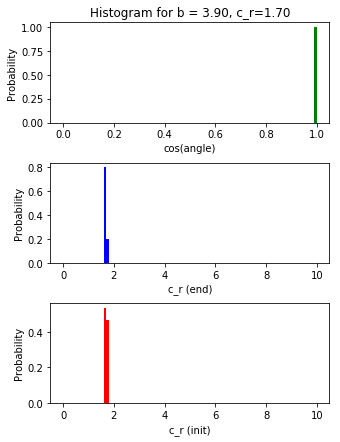

Init: 	 b = 3.90	 C_r = 1.6999999951834999
Angle:    MEAN = 0.9999543943056787 	 MEDIAN = 0.9999534599456192
Velocity: MEAN = 1.6999998634237716 	 MEDIAN = 1.6999996682063223
Pearson:
init - end : (-0.013222006662103705, 0.67623091623387266)
init - ang : (0.0049720656170862826, 0.87521739069057936)
ang  - end : (0.0044782875479934666, 0.88752277184027106)
__________________________________________________________________


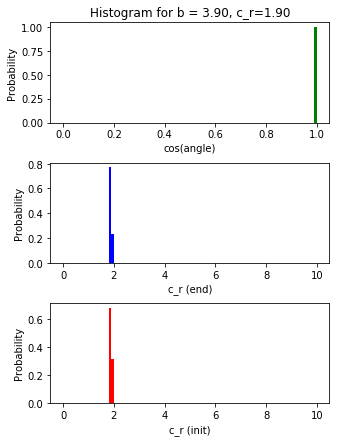

Init: 	 b = 3.90	 C_r = 1.9000000015394998
Angle:    MEAN = 0.9999710907323931 	 MEDIAN = 0.9999703058926515
Velocity: MEAN = 1.9000000963543235 	 MEDIAN = 1.8999997058025468
Pearson:
init - end : (0.0085530303195569812, 0.78705468474084839)
init - ang : (-0.00046815824817390811, 0.98820295000987513)
ang  - end : (-0.002166301865094747, 0.94545219272409975)
__________________________________________________________________


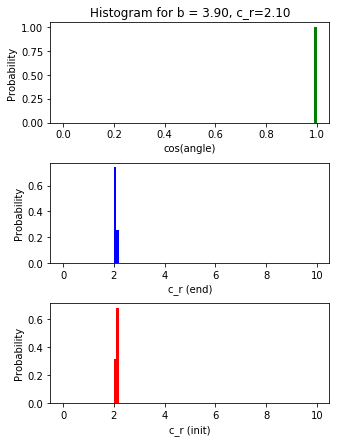

Init: 	 b = 3.90	 C_r = 2.099999998536
Angle:    MEAN = 0.9999806113978059 	 MEDIAN = 0.9999801607768938
Velocity: MEAN = 2.0999995405936653 	 MEDIAN = 2.0999997289954466
Pearson:
init - end : (-0.058720589249048993, 0.063426846562808559)
init - ang : (-0.020765127566623201, 0.51188819586153866)
ang  - end : (0.0097116319317311298, 0.75904745185433597)
__________________________________________________________________


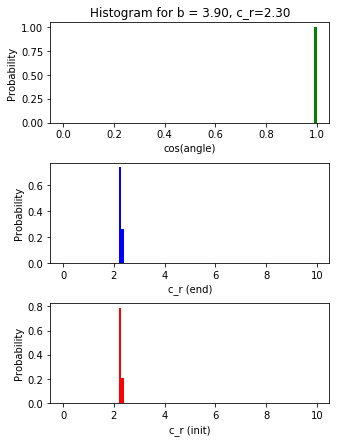

Init: 	 b = 3.90	 C_r = 2.300000001632
Angle:    MEAN = 0.9999866093577977 	 MEDIAN = 0.9999862530532364
Velocity: MEAN = 2.299999674902524 	 MEDIAN = 2.2999997785804087
Pearson:
init - end : (0.02406336930566793, 0.4471895060784794)
init - ang : (-0.013209408805794673, 0.67652193149000495)
ang  - end : (0.0023809895767877682, 0.940056032284462)
__________________________________________________________________


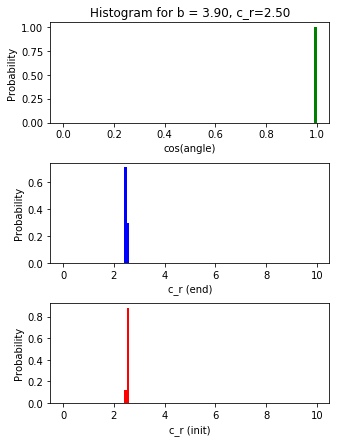

Init: 	 b = 3.90	 C_r = 2.5000000006073853
Angle:    MEAN = 0.9999903230872265 	 MEDIAN = 0.9999901688808102
Velocity: MEAN = 2.4999993790923707 	 MEDIAN = 2.4999997485752705
Pearson:
init - end : (-0.018292735683475461, 0.56340459862846681)
init - ang : (0.017788877378767609, 0.57420147289956591)
ang  - end : (0.0048751120672368576, 0.87763127837456179)
__________________________________________________________________


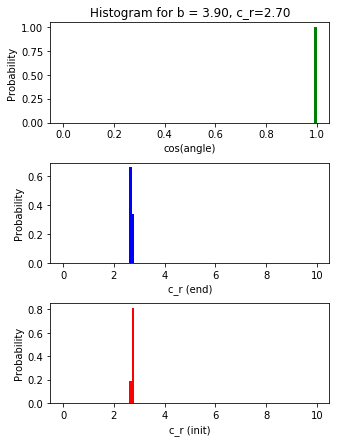

Init: 	 b = 3.90	 C_r = 2.7000000002530005
Angle:    MEAN = 0.9999929124130493 	 MEDIAN = 0.9999927862339113
Velocity: MEAN = 2.700000043316868 	 MEDIAN = 2.699999763915463
Pearson:
init - end : (0.0036910795241690297, 0.90719558683493329)
init - ang : (-0.012842199106164139, 0.68502565660157289)
ang  - end : (0.0014768953642512446, 0.9627960509884016)
__________________________________________________________________


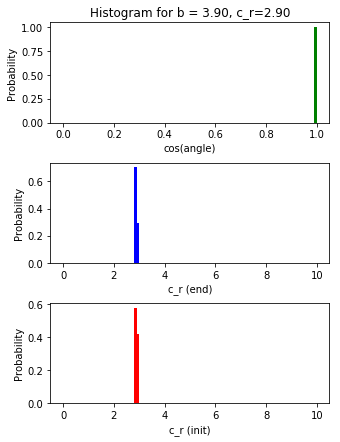

Init: 	 b = 3.90	 C_r = 2.8999999997590495
Angle:    MEAN = 0.9999947109893842 	 MEDIAN = 0.999994592266724
Velocity: MEAN = 2.9000001830198943 	 MEDIAN = 2.899999786467122
Pearson:
init - end : (-0.0040717266618418256, 0.89767512071529043)
init - ang : (-0.011951408627439526, 0.70581877230436008)
ang  - end : (0.0012109668676421272, 0.96949134286892114)
__________________________________________________________________


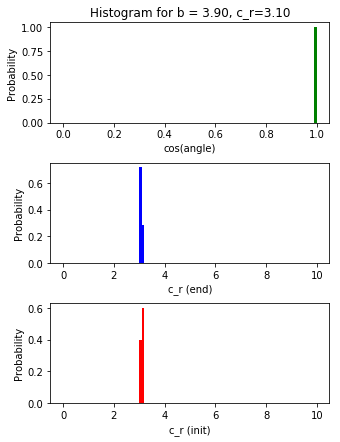

Init: 	 b = 3.90	 C_r = 3.1000000026001007
Angle:    MEAN = 0.9999959342492993 	 MEDIAN = 0.9999958596265683
Velocity: MEAN = 3.0999995784078944 	 MEDIAN = 3.099999825703512
Pearson:
init - end : (-0.044717001484932441, 0.15765161452270812)
init - ang : (0.0047527427692229517, 0.88067957109257211)
ang  - end : (0.014700196259225124, 0.64242945797271567)
__________________________________________________________________


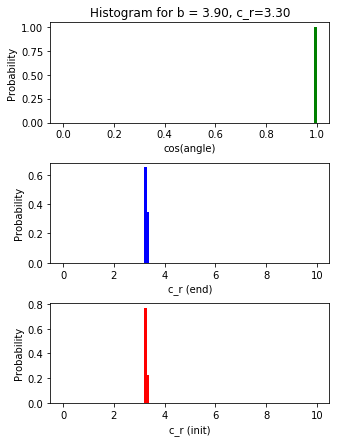

Init: 	 b = 3.90	 C_r = 3.3000000003139993
Angle:    MEAN = 0.9999968472648063 	 MEDIAN = 0.9999967788174223
Velocity: MEAN = 3.2999995891490106 	 MEDIAN = 3.2999997474911686
Pearson:
init - end : (-0.048540986256858064, 0.12503329115706369)
init - ang : (-0.0033775663364768328, 0.91504702033853769)
ang  - end : (0.0078944444609817775, 0.80310096085513916)
__________________________________________________________________


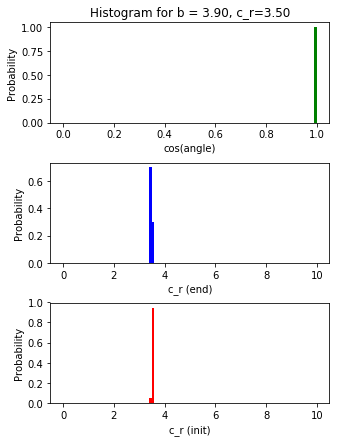

Init: 	 b = 3.90	 C_r = 3.500000000285
Angle:    MEAN = 0.9999975020605401 	 MEDIAN = 0.9999974552121642
Velocity: MEAN = 3.4999998619342647 	 MEDIAN = 3.499999853867783
Pearson:
init - end : (0.002990391028700844, 0.92475455466788925)
init - ang : (-0.00063332018842256795, 0.98404154078681394)
ang  - end : (0.00019827559067519179, 0.9950035337434513)
__________________________________________________________________


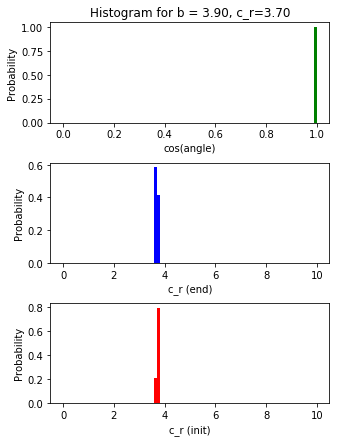

Init: 	 b = 3.90	 C_r = 3.700000001650001
Angle:    MEAN = 0.9999980206399547 	 MEDIAN = 0.9999979657961986
Velocity: MEAN = 3.699999592829645 	 MEDIAN = 3.6999997605197312
Pearson:
init - end : (-0.022316013858732546, 0.48087279622001455)
init - ang : (-0.012997600966029343, 0.68142196748276984)
ang  - end : (0.0052294174796897247, 0.86881568687476785)
__________________________________________________________________


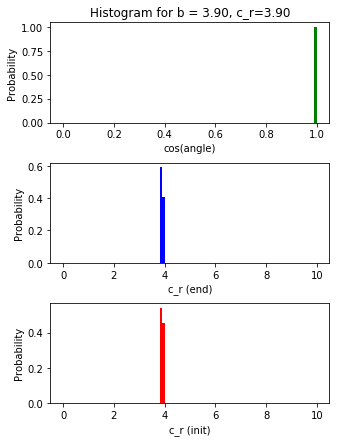

Init: 	 b = 3.90	 C_r = 3.900000001079999
Angle:    MEAN = 0.9999983815106233 	 MEDIAN = 0.9999983524394334
Velocity: MEAN = 3.8999992076217525 	 MEDIAN = 3.8999998271111656
Pearson:
init - end : (-0.0016766637885130527, 0.95776817048399898)
init - ang : (-0.0085680977579254188, 0.78668859650247924)
ang  - end : (0.019496287894363123, 0.53801716453612958)
__________________________________________________________________


In [83]:
angle_median = []
angle_mean = []
vel_median = []
vel_mean = []
vel_init = []
b_init = []
for b in np.arange(0.0, 4, 0.3):
    b_in = str(b) + "0" 
    for v in range(18):
        v_in = str(v)
        c_r_i,a_mean,a_median,c_r_mean,c_r_median = process(b_in, v_in, "test/out_1887/")
        b_init.append(b)
        vel_init.append(c_r_i)
        angle_median.append(a_mean)
        angle_mean.append(a_median)
        vel_median.append(c_r_mean)
        vel_mean.append(c_r_median)

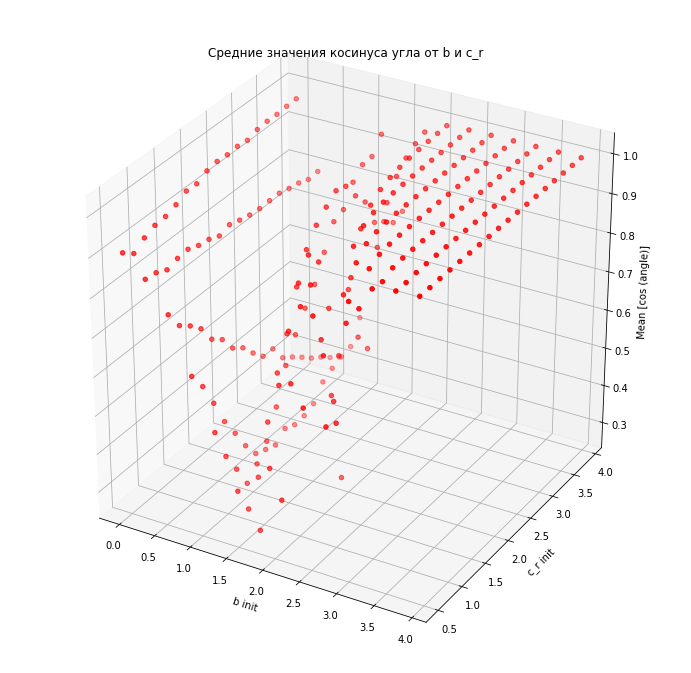

In [84]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111, projection='3d')
c, m, zlow, zhigh = ('r', 'o', -50, -25)
ax.scatter(b_init, vel_init, angle_mean, c=c, marker=m)
ax.set_xlabel('b init')
ax.set_ylabel('c_r init')
ax.set_zlabel('Mean [cos (angle)] ')
plt.title("Средние значения косинуса угла от b и c_r")
plt.show()


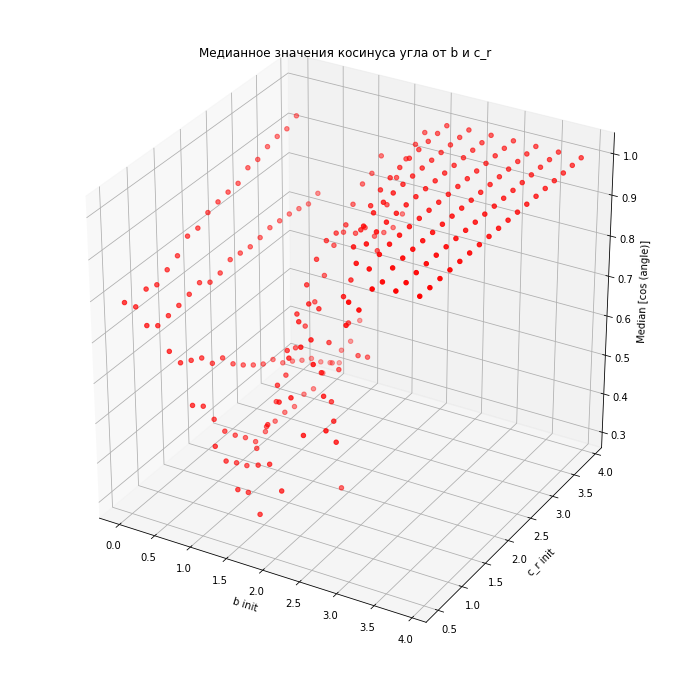

In [85]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111, projection='3d')
c, m, zlow, zhigh = ('r', 'o', -50, -25)
ax.scatter(b_init, vel_init, angle_median, c=c, marker=m)
ax.set_xlabel('b init')
ax.set_ylabel('c_r init')
ax.set_zlabel('Median [cos (angle)] ')
plt.title("Медианное значения косинуса угла от b и c_r")
plt.show()


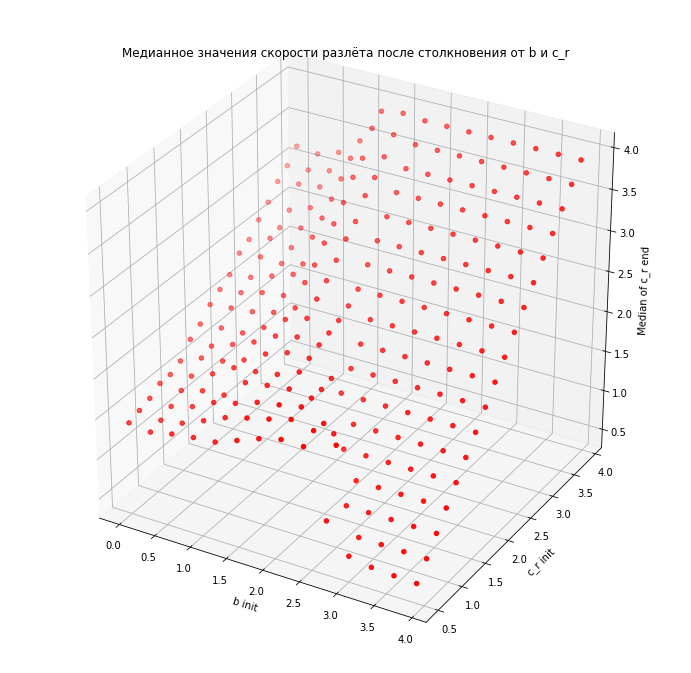

In [86]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111, projection='3d')
c, m, zlow, zhigh = ('r', 'o', -50, -25)
ax.scatter(b_init, vel_init, vel_median, c=c, marker=m)
ax.set_xlabel('b init')
ax.set_ylabel('c_r init')
ax.set_zlabel('Median of c_r end')
plt.title("Медианное значения скорости разлёта после столкновения от b и c_r")

plt.show()


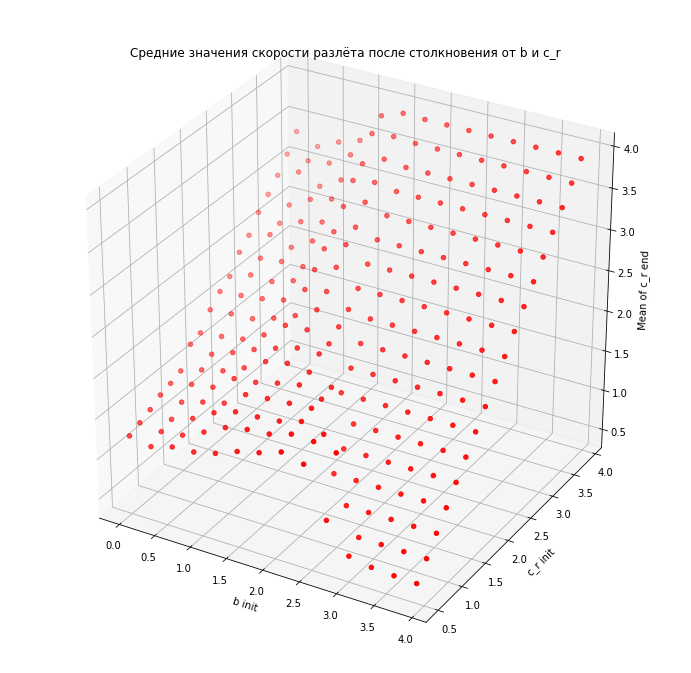

In [87]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111, projection='3d')
c, m, zlow, zhigh = ('r', 'o', -50, -25)
ax.scatter(b_init, vel_init, vel_mean, c=c, marker=m)
ax.set_xlabel('b init')
ax.set_ylabel('c_r init')
ax.set_zlabel('Mean of c_r end')
plt.title("Средние значения скорости разлёта после столкновения от b и c_r")

plt.show()
